# Pure PdH

[[0.         0.81967882 0.21640444 0.123     ]]
auto loaded stepsName:  ['* + CO$_{2}$', 'HOCO*', 'CO*', '* + CO']
auto loaded obserName:  ['PdH']
auto loaded data: 
 [[0.         0.81967882 0.21640444 0.123     ]]
reload: ['* + CO$_{2}$', 'HOCO*', 'CO*', '* + CO']
reload: ['PdH'] 



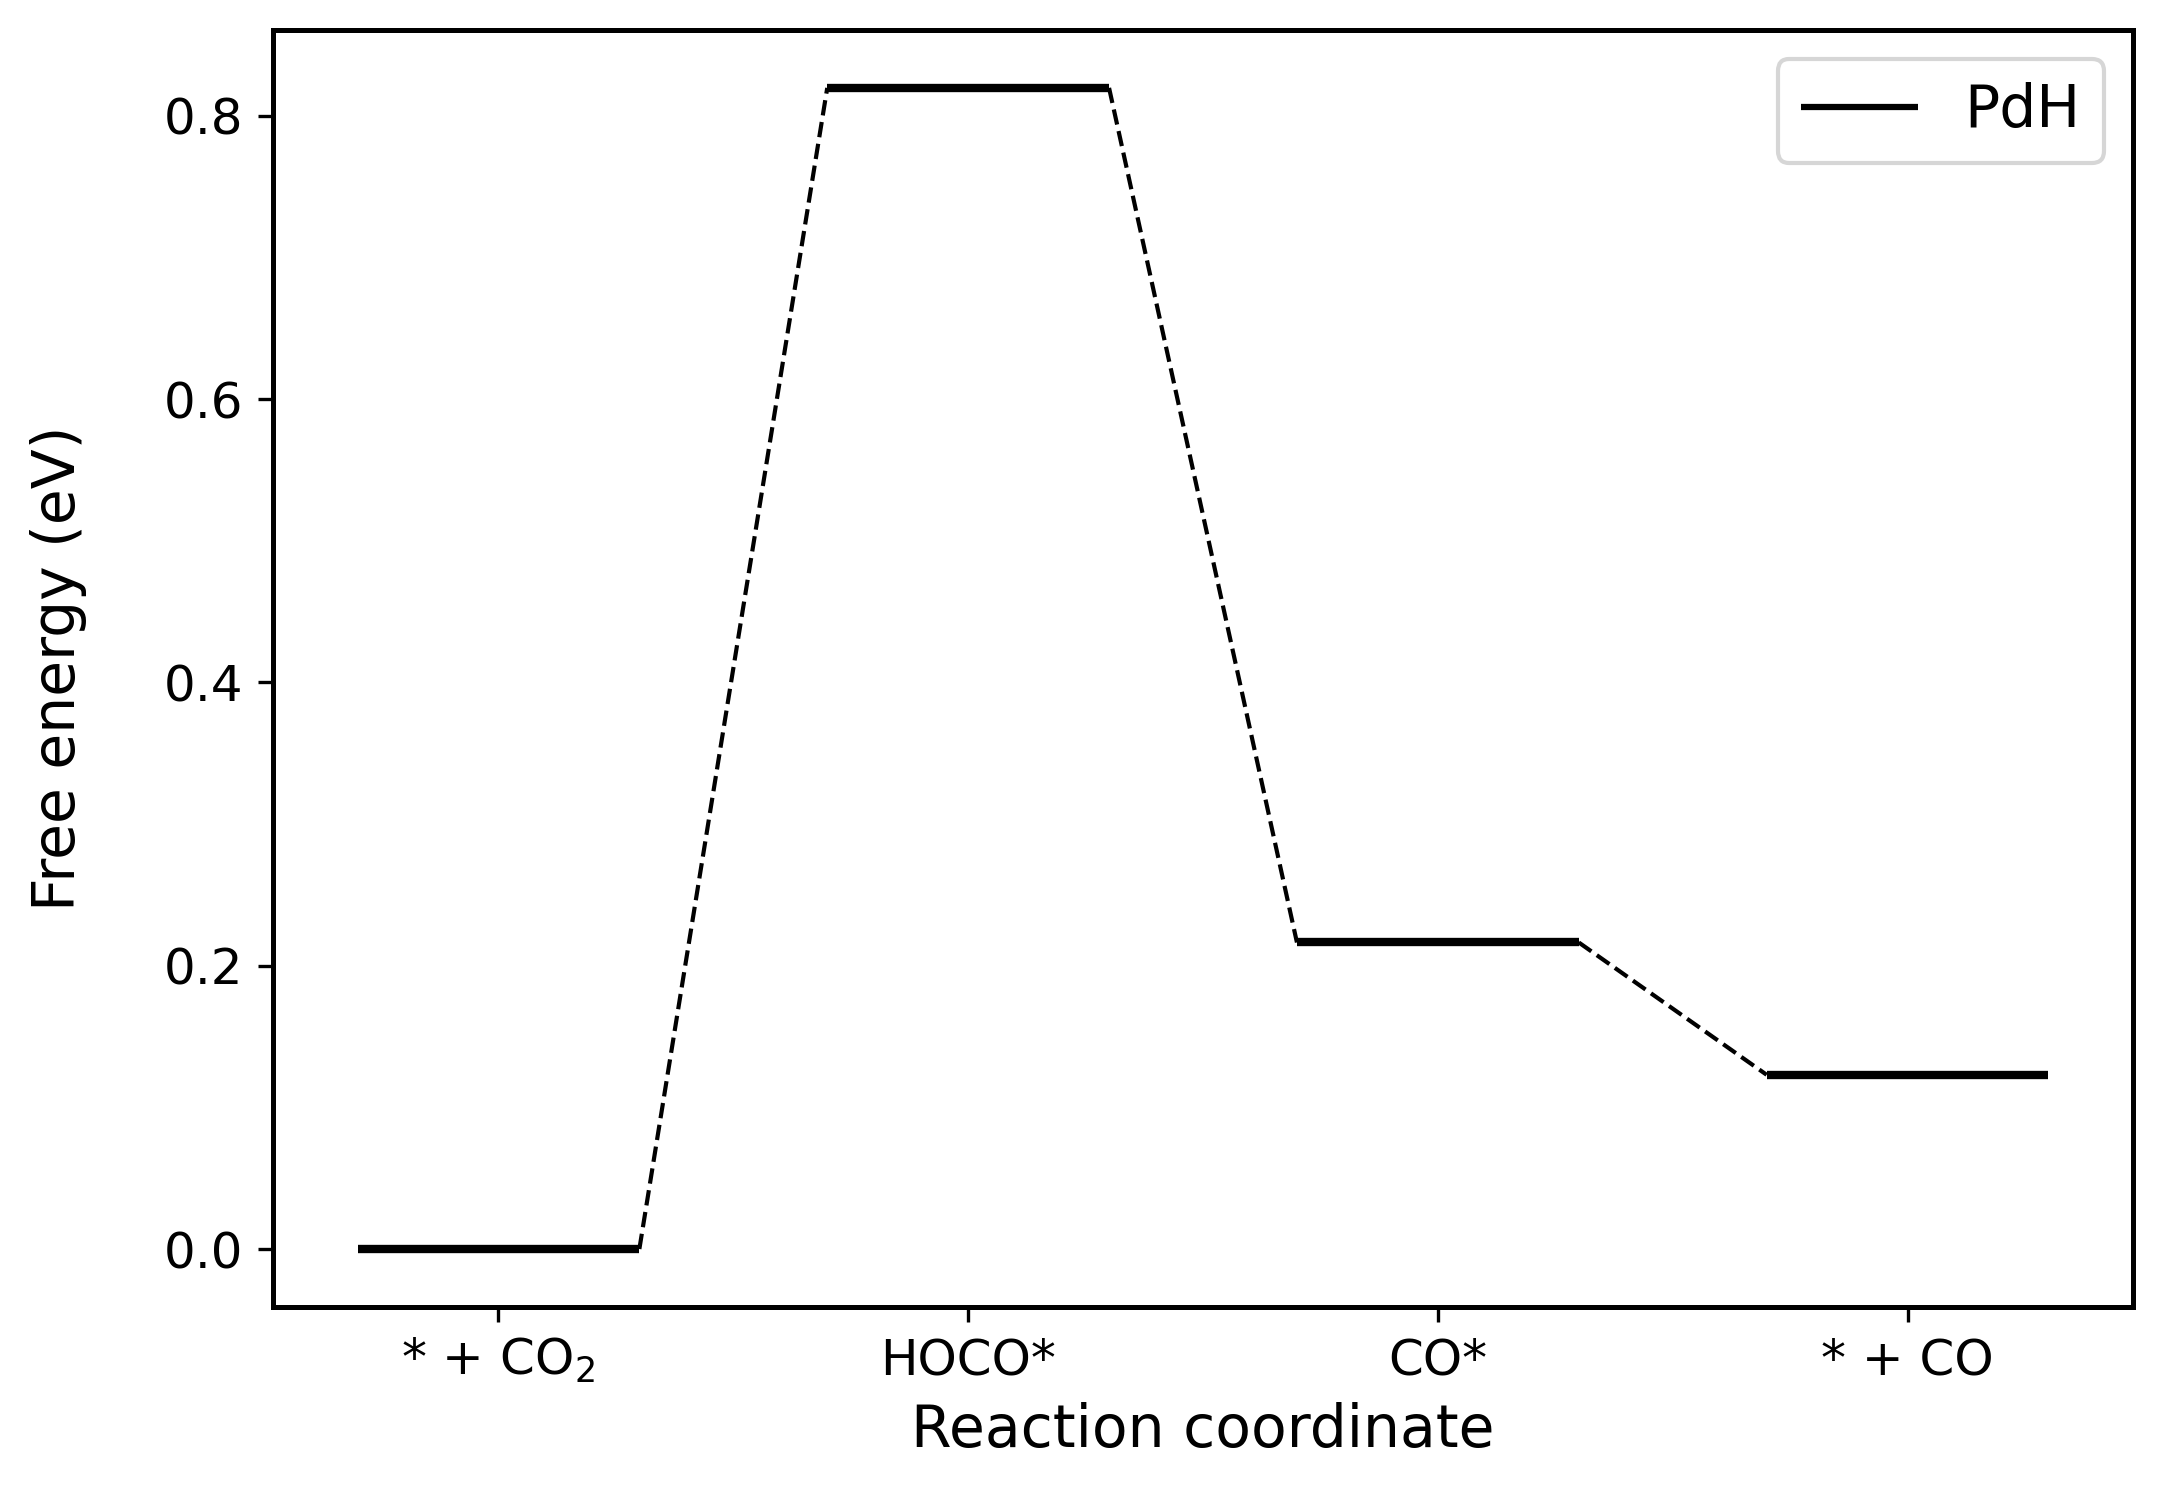

In [3]:
%matplotlib inline
import sys
sys.path.append("../../..")

from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.CO2RR import CO2RRFEDplot
from plotpackage.lib.scalingrelation import ScalingRelationPlot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1+18 #1st column in excel
max_col = 5+18 #5th column in excel

#change it only for excel
sheet = 'single_b' #Sheet1 by defaut
# min_row = 20 #1st column in excel
# max_row = 37 #9st column in excel
min_row = 1+1 #1st column in excel
max_row = 24+1 #9st column in excel

#saved figure name
figName1 = './paper1/Pure_FreeEnergyDiagram.jpg'  #free energy diagram name
# figName2 = './paper1/ScalingRelation_' + sheet + '.jpg' #scaling reation figure name

############ plot free energy diagram ###############

stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
#stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data

# # del rows; delete according to element names in excel
del_ele = [ 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y', 'Zr', 'Nb', 'Mo', 'Ru', 'Rh', 'Ag', 'Cd', 'Hf', 'Ta', 'W', 'Re']
del_rows = [observationName.index(each)+2 for each in del_ele]
### del_rows = [10, 12, 13, 18]  #delete according to rows in excel
del_list = [x -2 for x in del_rows]
observationName = np.delete(observationName, del_list, 0)
X = np.delete(X, del_list, 0)
print(X)
stepsNames = ['* + CO$_{2}$', 'HOCO*', 'CO*', '* + CO']  #reload step name for CO2RR
observationName = ["PdH",]
CO2RRdiagram = CO2RRFEDplot(stepsNames, observationName, X, figName1)
###costom connection
# CO2RRdiagram.add_link(start_id=0, end_id=3)
# CO2RRdiagram.remove_link(start_id=0, end_id=1)
CO2RRdiagram.plot(save = True, title=None)


In [2]:
# from plotpackage.lib.io import read_excel, read_csv
# from plotpackage.lib.HER import HERFEDplot
# from plotpackage.lib.figsmetadata import FigsMetaData
# import matplotlib.pyplot as plt

# ############only part needs to change##############
# filename = '../../data/HER.xlsx'

# #change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
# min_col = 1 #1st column in excel
# max_col = 4 #4th column in excel

# #change it only for excel
# sheet = 'top-new' #Sheet1 by defaut
# min_row = 1 #1st column in excel
# max_row = 11 #11th column in excel

# #saved figure name
# figName = './paper1/Pure_HER_FreeEnergyDiagram.jpg'  #free energy diagram name

# ############ plot free energy diagram ###############

# stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data

# selected_ele = ['Pure']
# ranges = [observationName.index(each)+2 for each in selected_ele]
# observationName = [observationName[i-2] for i in ranges]
# selected_rows = [i-2 for i in ranges]
# X = X[selected_rows,:]


# stepsNames = ['* + $H^{+}$', 'H*', '* + $1/2H_{2}$']  #reload step name for CO2RR
# observationName = ["PdH",]

# HERdiagram = HERFEDplot(stepsNames, observationName, X, figName)
# HERdiagram.plot(title='')

auto loaded stepsName:  ['* + $H^{+}$', 'H*', '* + $1/2H_{2}$']
auto loaded obserName:  ['PdH']
auto loaded data: 
 [[0.        0.5006168 0.       ]]
reload: ['* + $H^{+}$', 'H*', '* + $1/2H_{2}$']
reload: ['PdH'] 



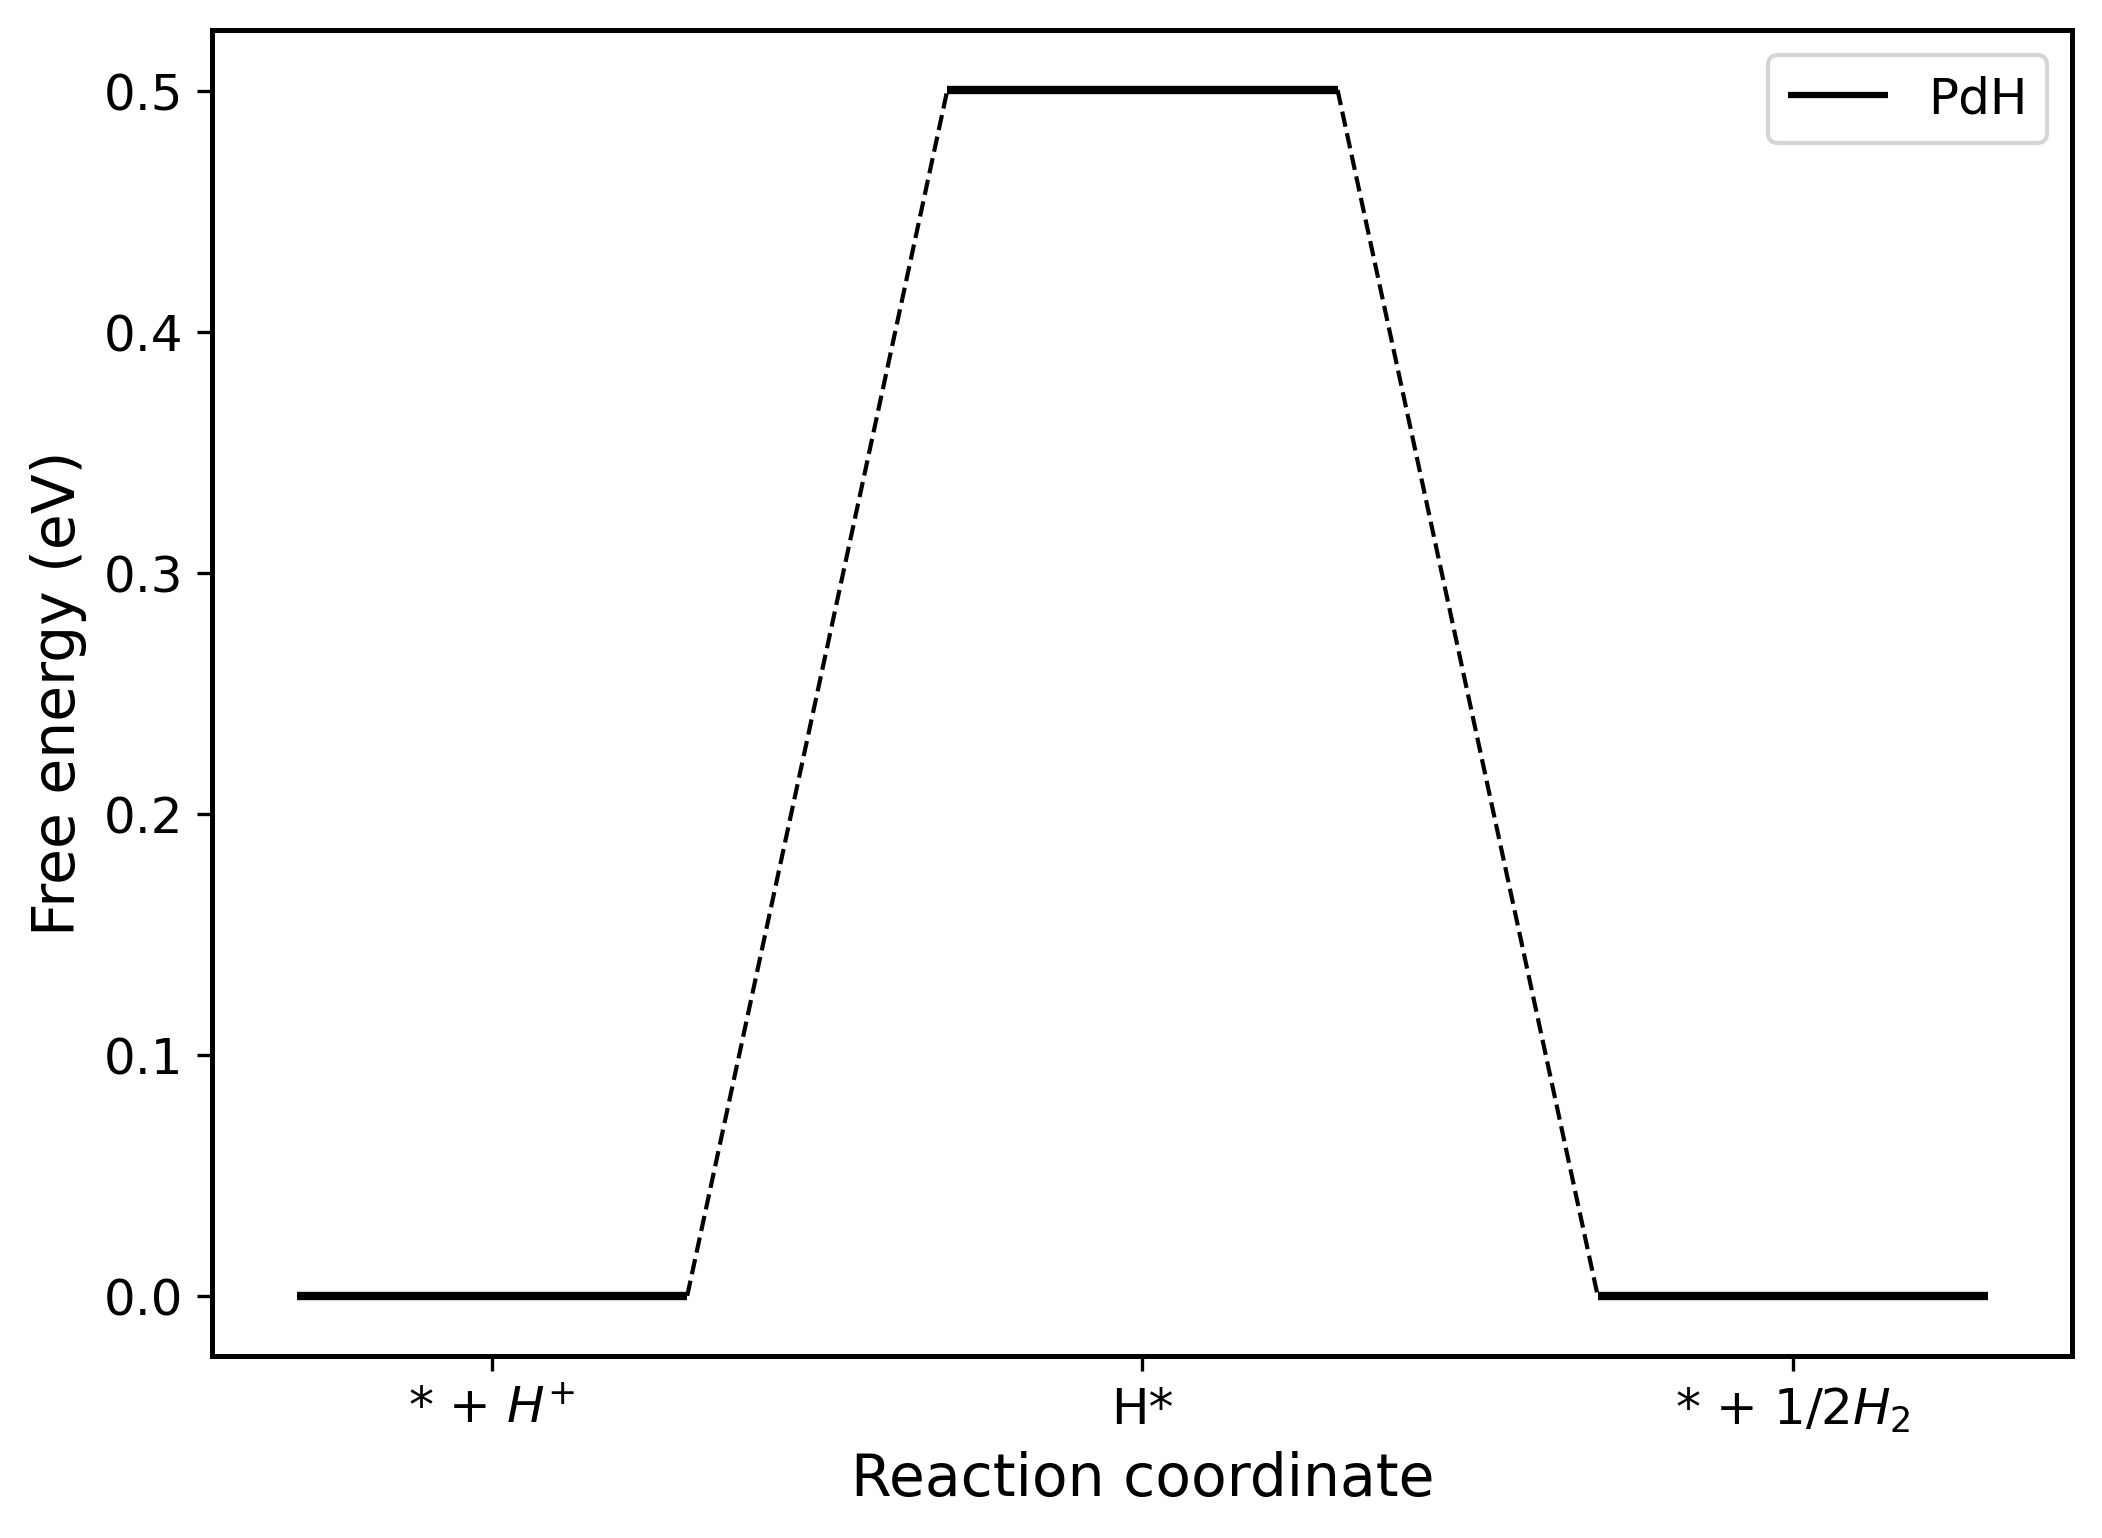

In [5]:
from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.HER import HERFEDplot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import xlrd

############only part needs to change##############
filename = './sites.xlsx'

#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 27-1 #1st column in excel
max_col = 27 #5th column in excel

#change it only for excel
sheet = 'single_b' #Sheet1 by defaut
min_row = 1+1 #1st column in excel
max_row = 2+1 #9st column in excel

#saved figure name
figName = './paper1/Pure_HER_FreeEnergyDiagram.jpg'  #free energy diagram name

############ plot free energy diagram ###############

# stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
doc = xlrd.open_workbook(filename).sheet_by_name(sheet)
stepsNames = doc.row_values(rowx=min_row-1, start_colx=min_col, end_colx=max_col) 
observationName = doc.col_values(2-1, min_row, max_row) 
col_H = doc.col_values(27-1, min_row, max_row) 

first_step = np.zeros(len(col_H))
final_step = np.zeros(len(col_H))

data_HER = np.vstack([first_step, np.array(col_H), final_step]).transpose() # get HER data
# print(data_HER)

stepsNames = ['* + $H^{+}$', 'H*', '* + $1/2H_{2}$']  #reload step name for CO2RR
observationName = ['PdH', ]

HERdiagram = HERFEDplot(stepsNames, observationName, data_HER, figName)
HERdiagram.plot(title='')


# Formation energy

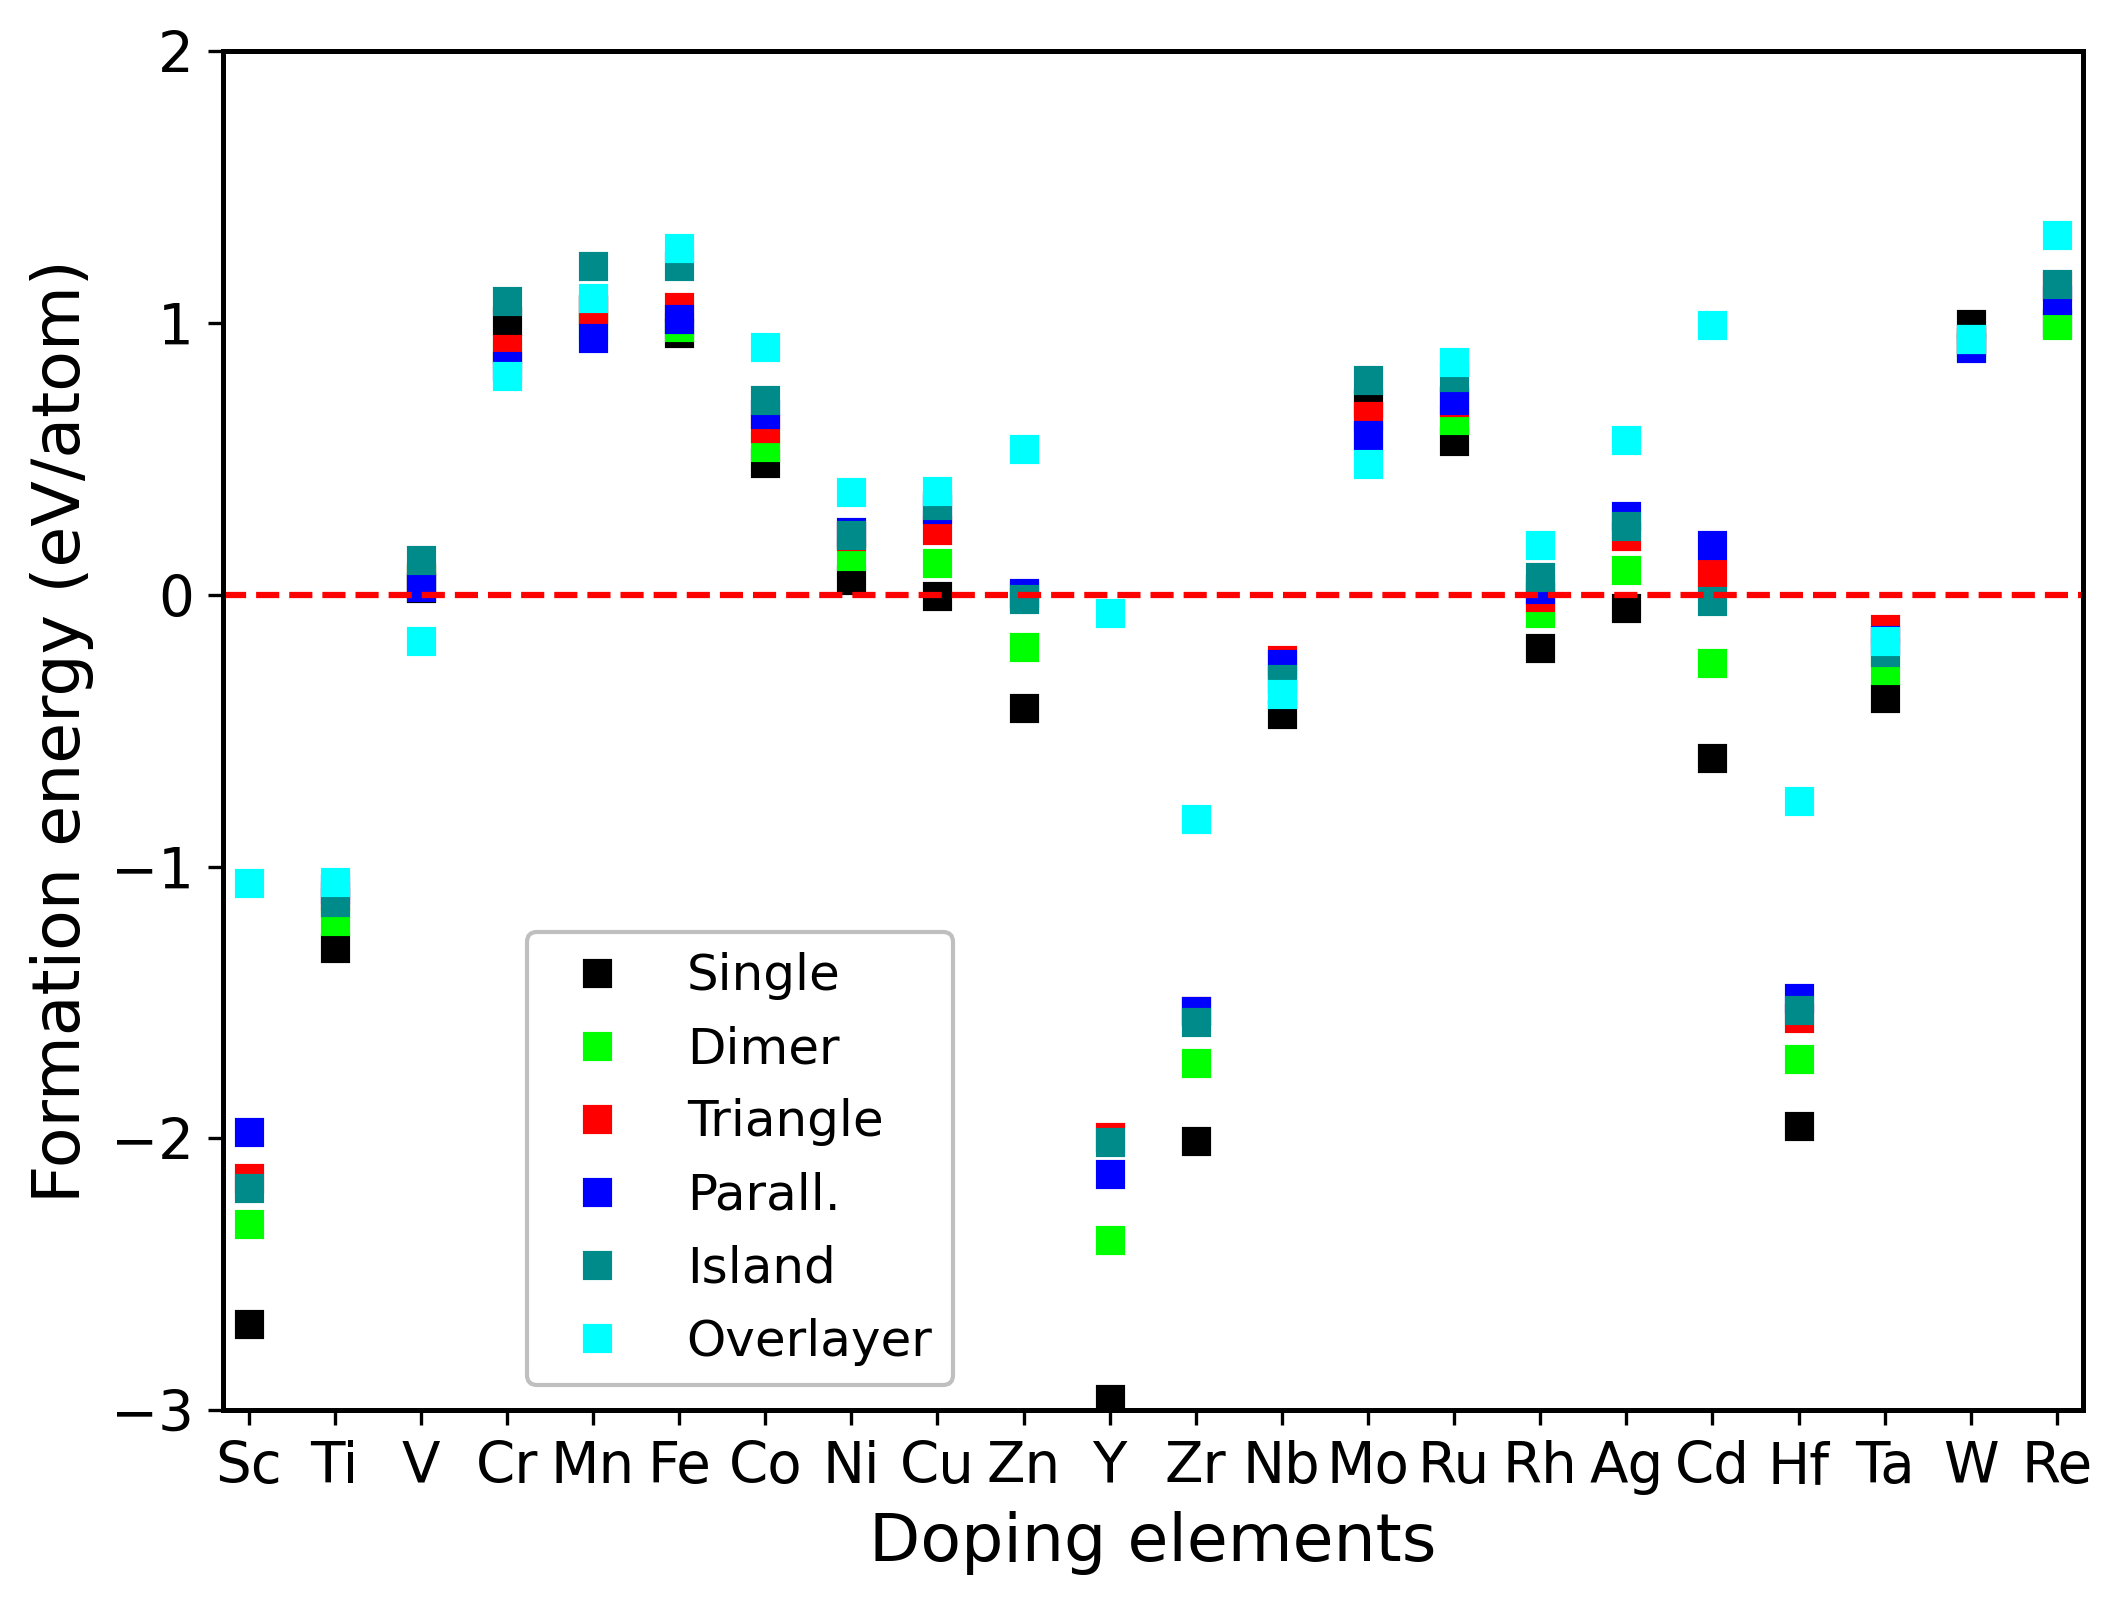

In [32]:
%matplotlib inline
from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1+14 #1st column in excel
max_col = 7+14 #5th column in excel

#change it only for excel
sheet = 'stability' #Sheet1 by defaut
min_row = 2 #1st column in excel
max_row = 24 #9st column in excel

#saved figure name
figName1 = './paper1/Formation_energy.jpg'  #free energy diagram name

############ plot free energy diagram ###############
colorList = ['k', 'lime', 'r', 'b', 'darkcyan', 'cyan', 'olive', 'magenta', 'pink', 'gray', 'orange', 'purple', 'g']
typeNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data

fig = plt.figure(figsize=(8, 6), dpi = 300)
x = np.arange(0,len(observationName),1)

# marker = ['o', '^', '<', '>', 'v', 's', 'd', '.', ',', 'x', '+']
for i in range(len(typeNames)):    
    plt.plot(x, X[:,i], 's', color=colorList[i])  #plot dots
    # plt.plot(x, X[:,i], marker[i], color=colorList[i])  #plot dots
typeNames = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']    
plt.legend(typeNames, framealpha=0.5, fontsize=12, bbox_to_anchor=(0.15, 0, 0.8, 1.02), edgecolor='grey')
plt.axhline(y=0, color='r', linestyle='--')

plt.xlim([-0.3, 21.3])
plt.ylim([-3., 2])
plt.xlabel('Doping elements', fontsize=16)
plt.ylabel('Formation energy (eV/atom)', fontsize=16)
ax = fig.gca()
ax.set_xticks(x)
ax.set_xticklabels(observationName)

ax.tick_params(labelsize=13.5) #tick label font size
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2) #linewith of frame

plt.show()
fig.savefig(figName1, dpi=300, bbox_inches='tight')


# Scaling relation

r2: 0.42
r2: 0.84
r2: 0.36
r2: 0.88
r2: 0.51
r2: 0.89
r2: 0.48
r2: 0.96
r2: 0.41
r2: 0.97
r2: 0.8
r2: 0.86


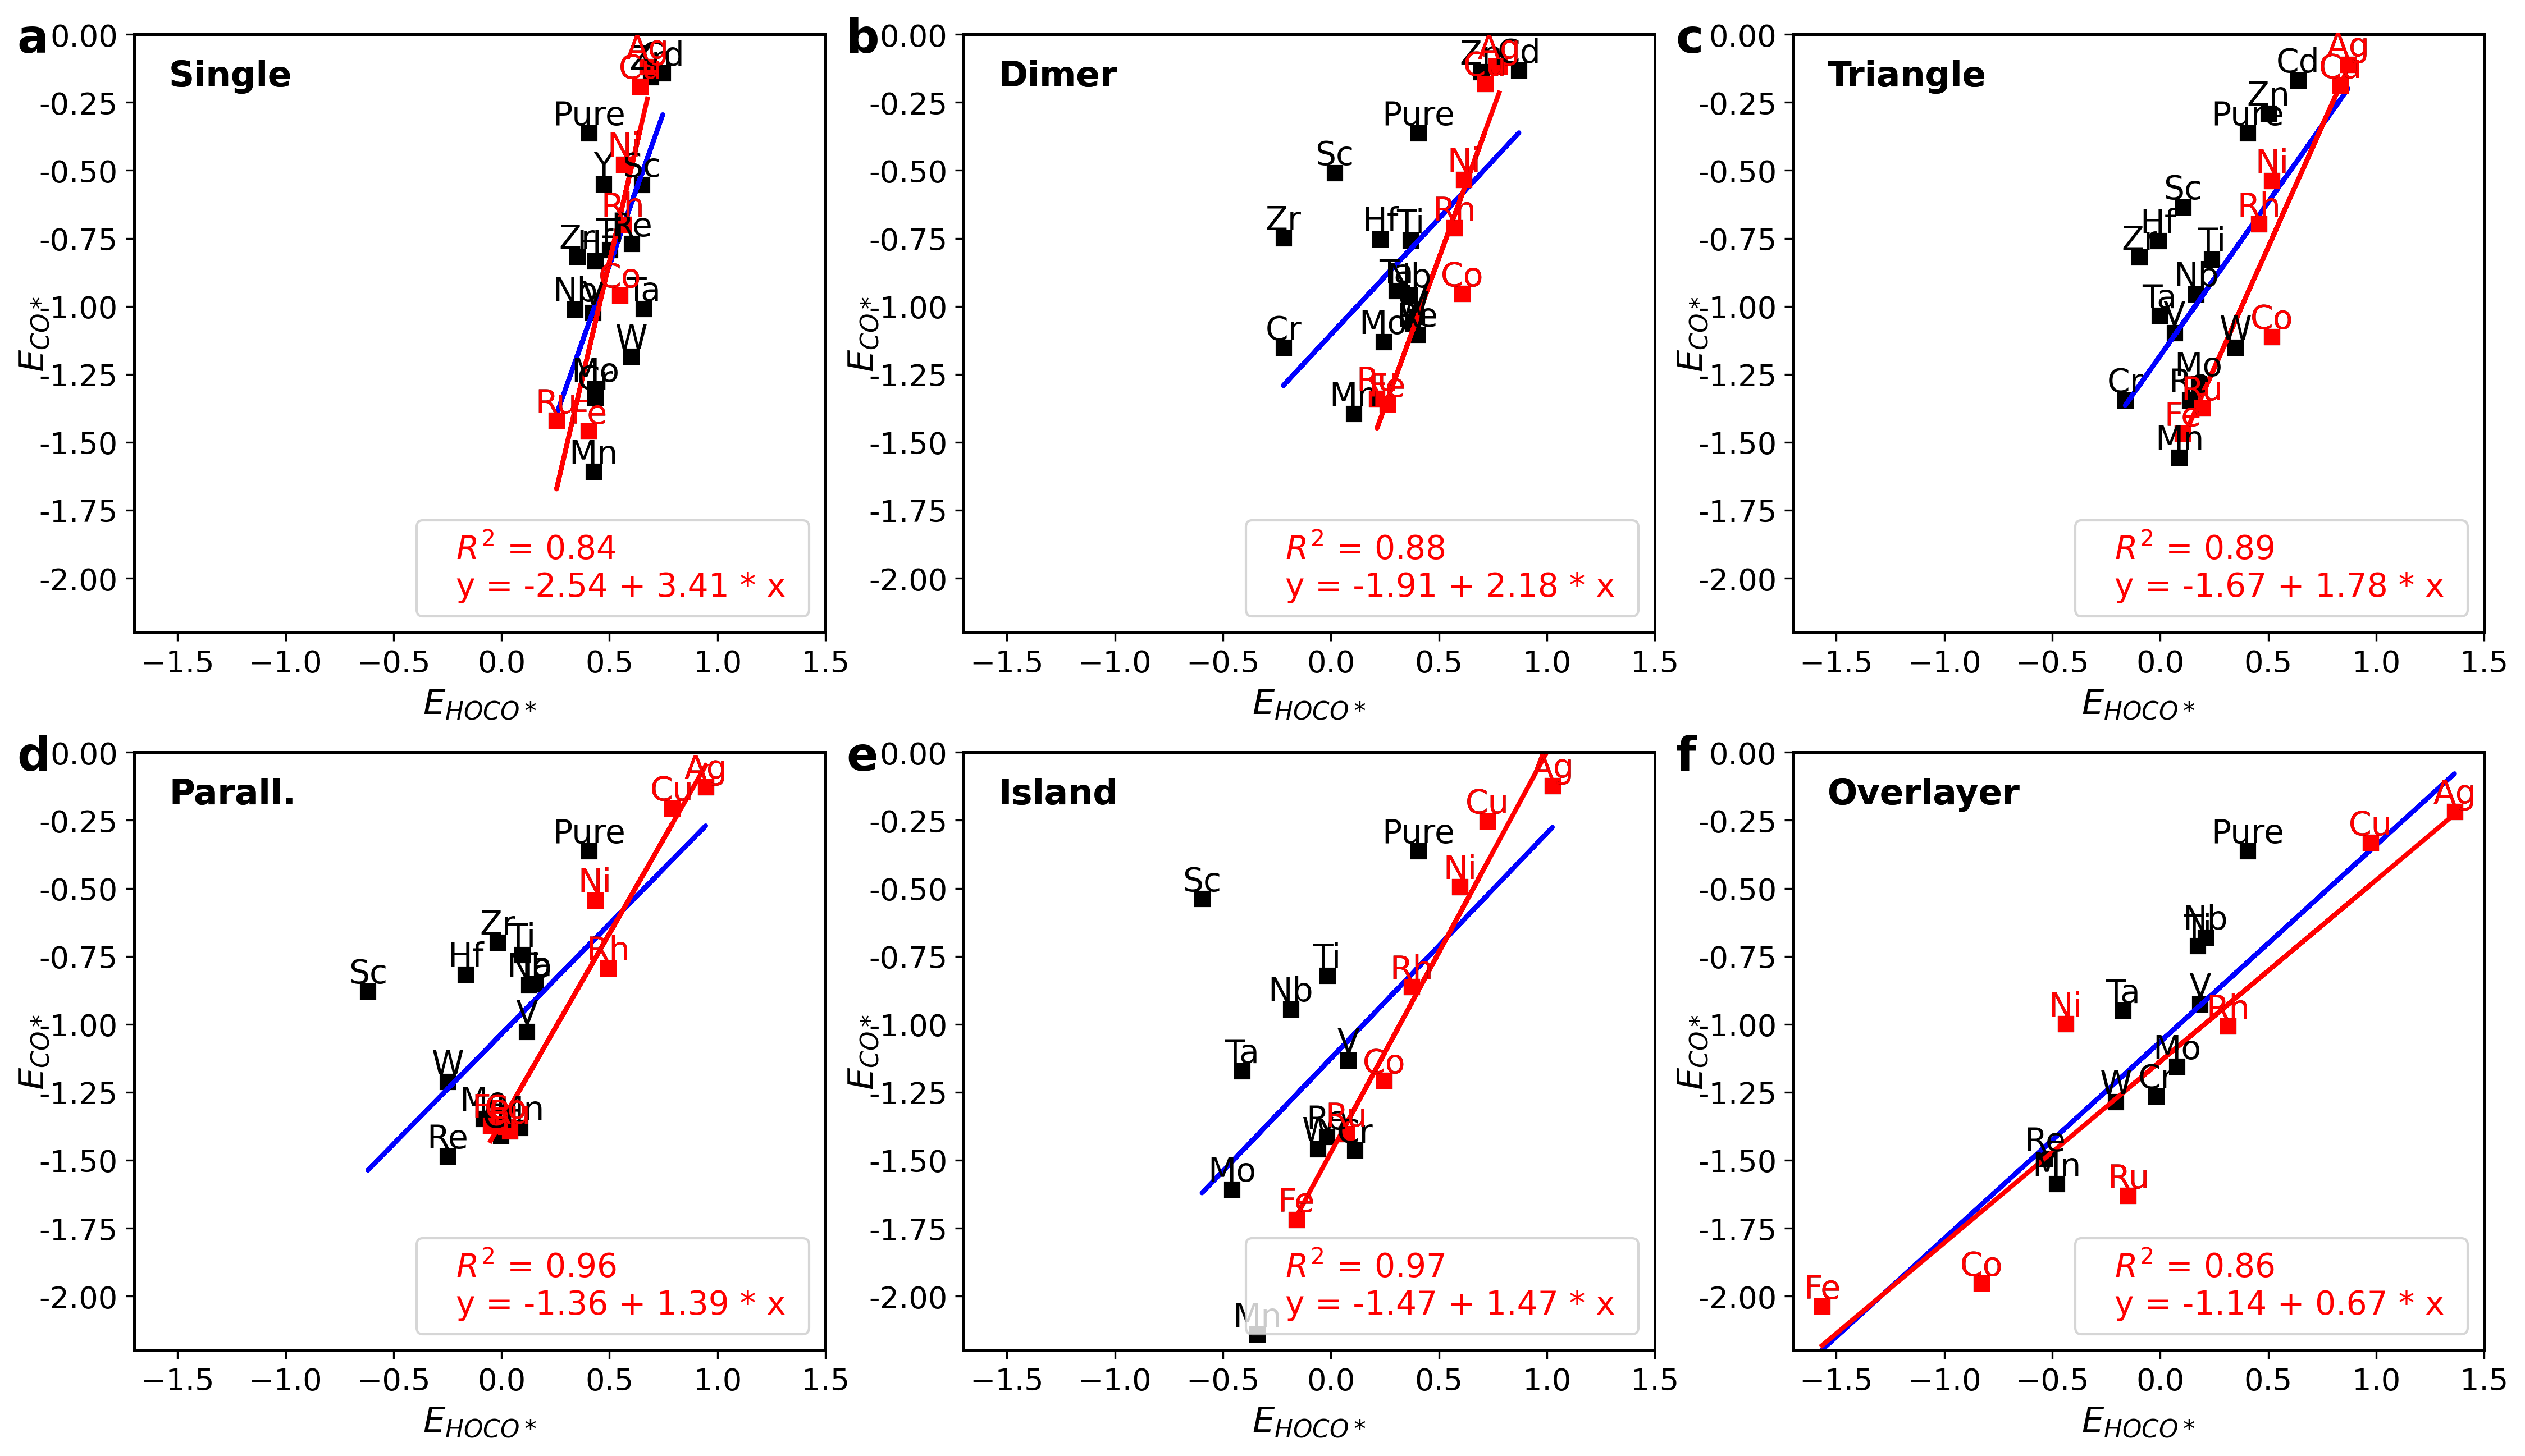

r2: 0.03
r2: 0.81
r2: 0.46
r2: 0.82
r2: 0.62
r2: 0.81
r2: 0.6
r2: 0.63
r2: 0.8
r2: 0.77
r2: 0.5
r2: 0.83


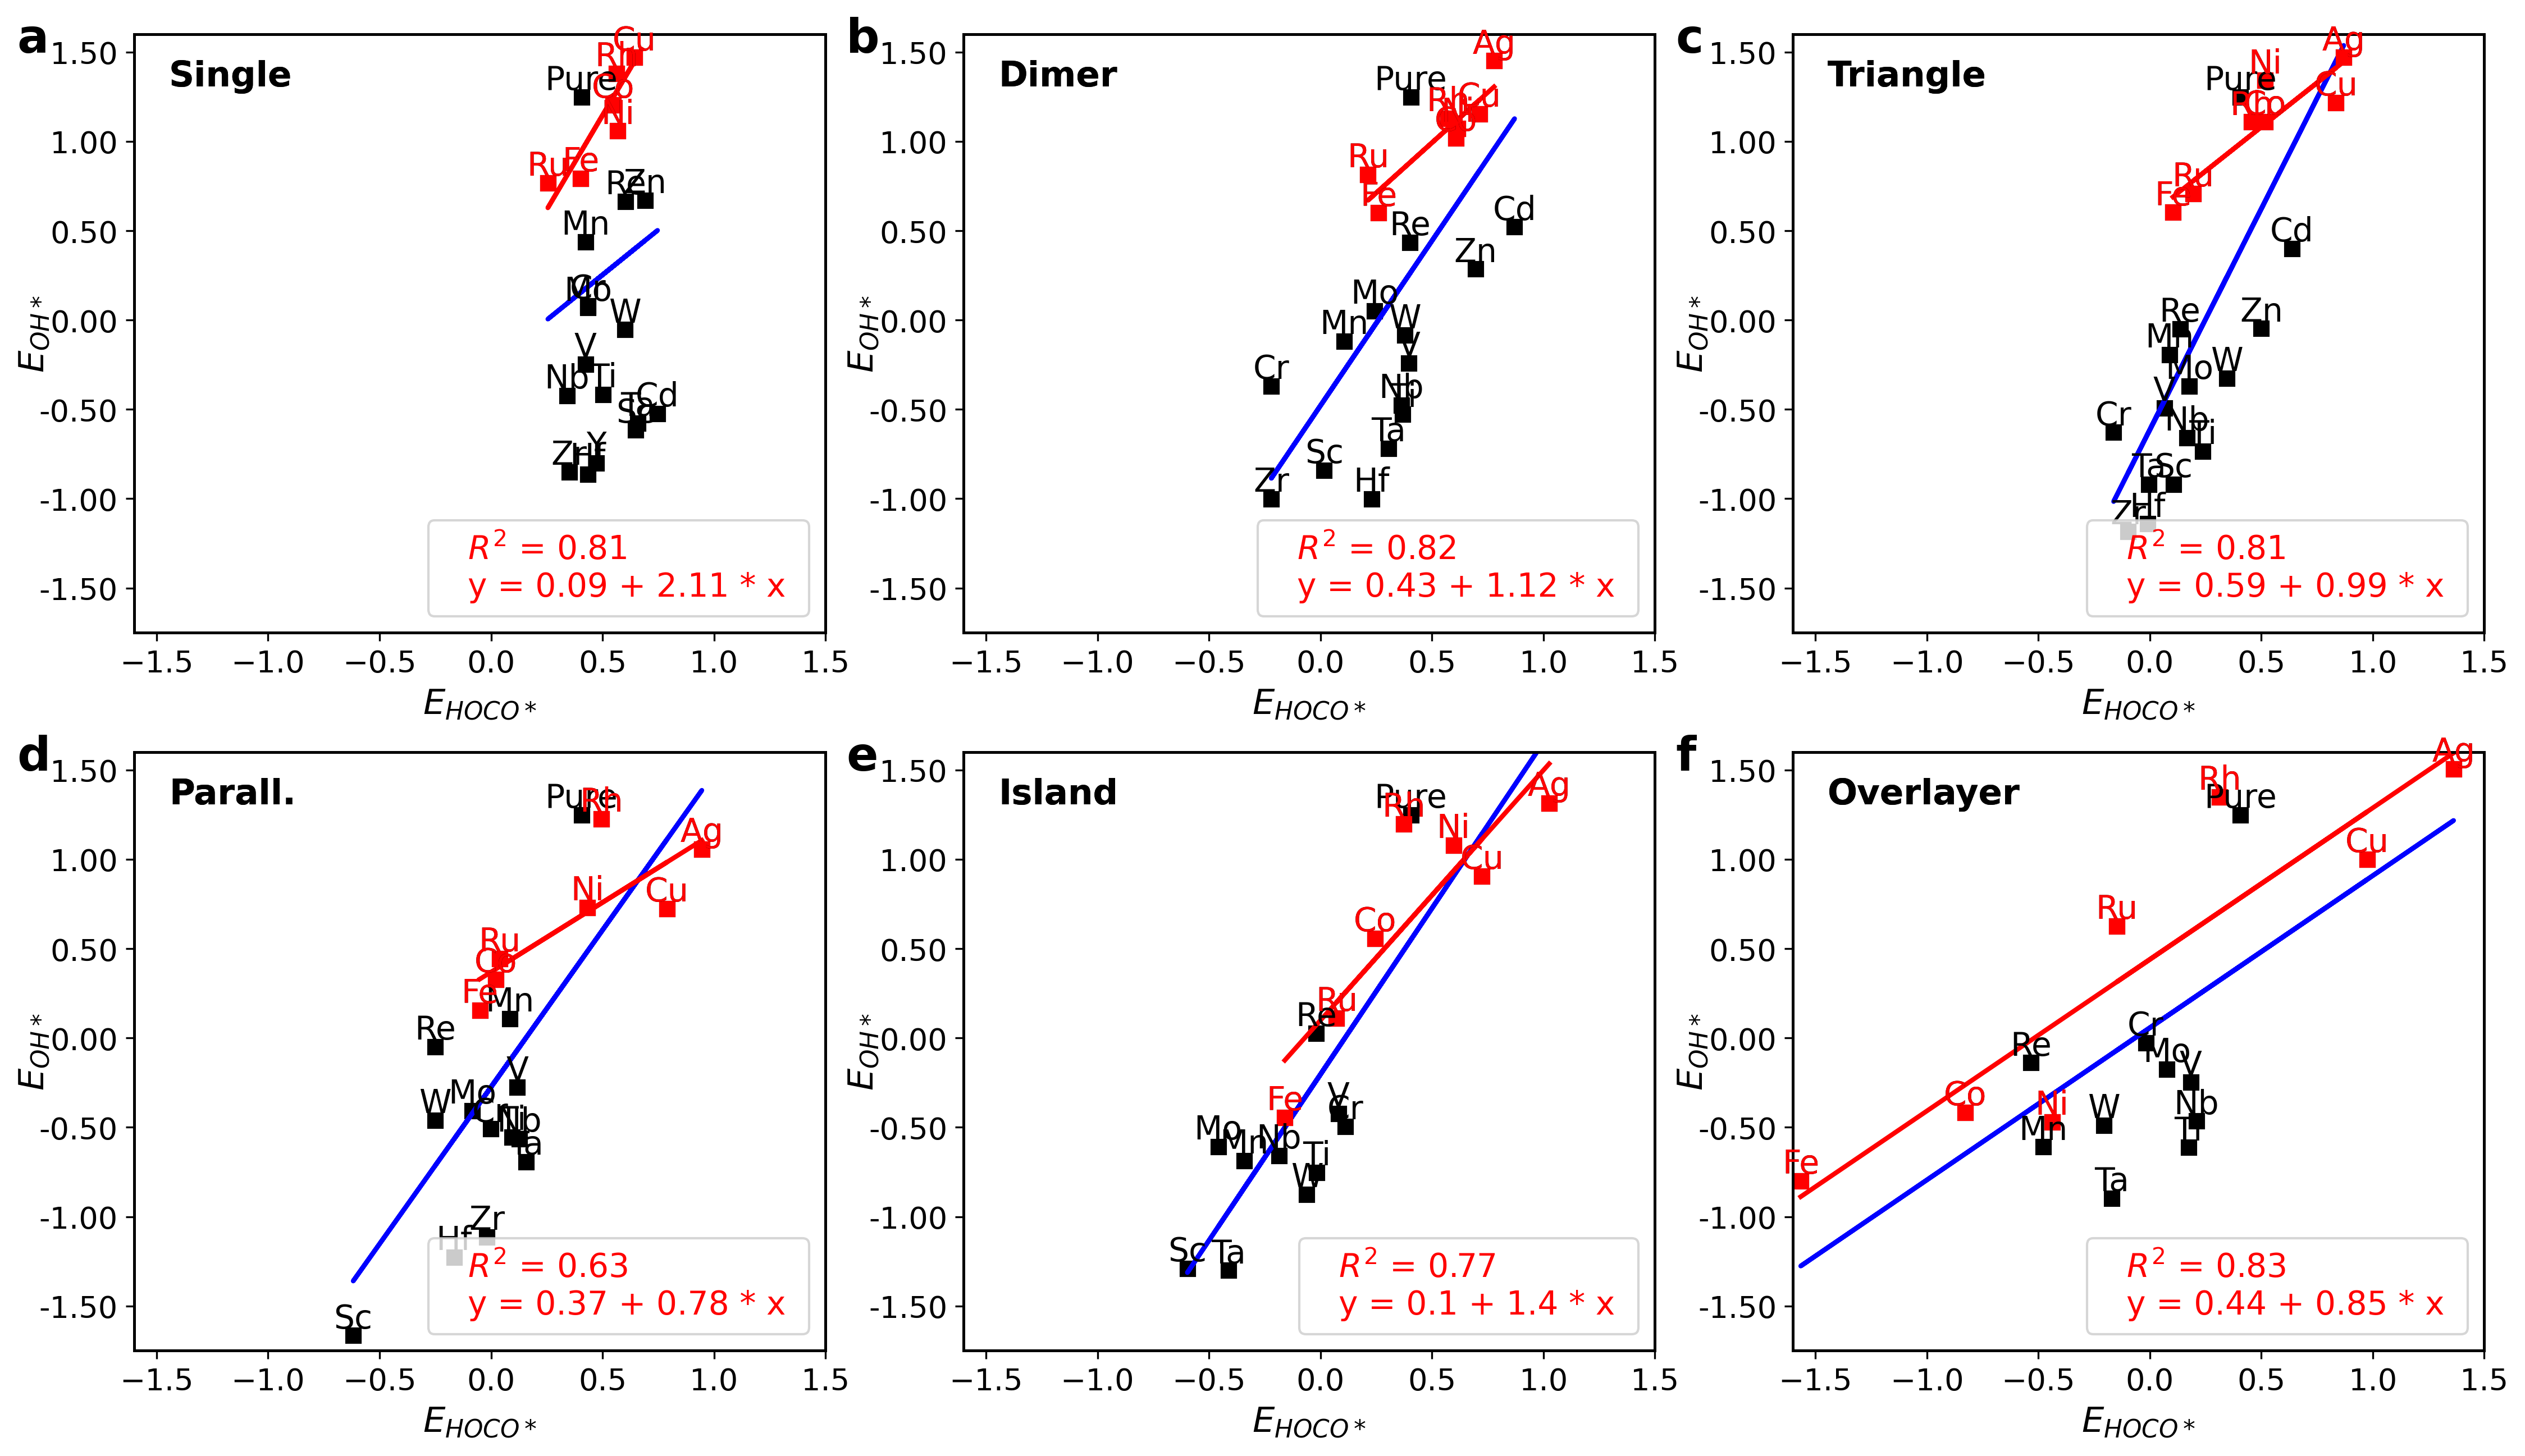

r2: 0.68
r2: 0.8
r2: 0.74
r2: 0.66
r2: 0.78
r2: 0.49


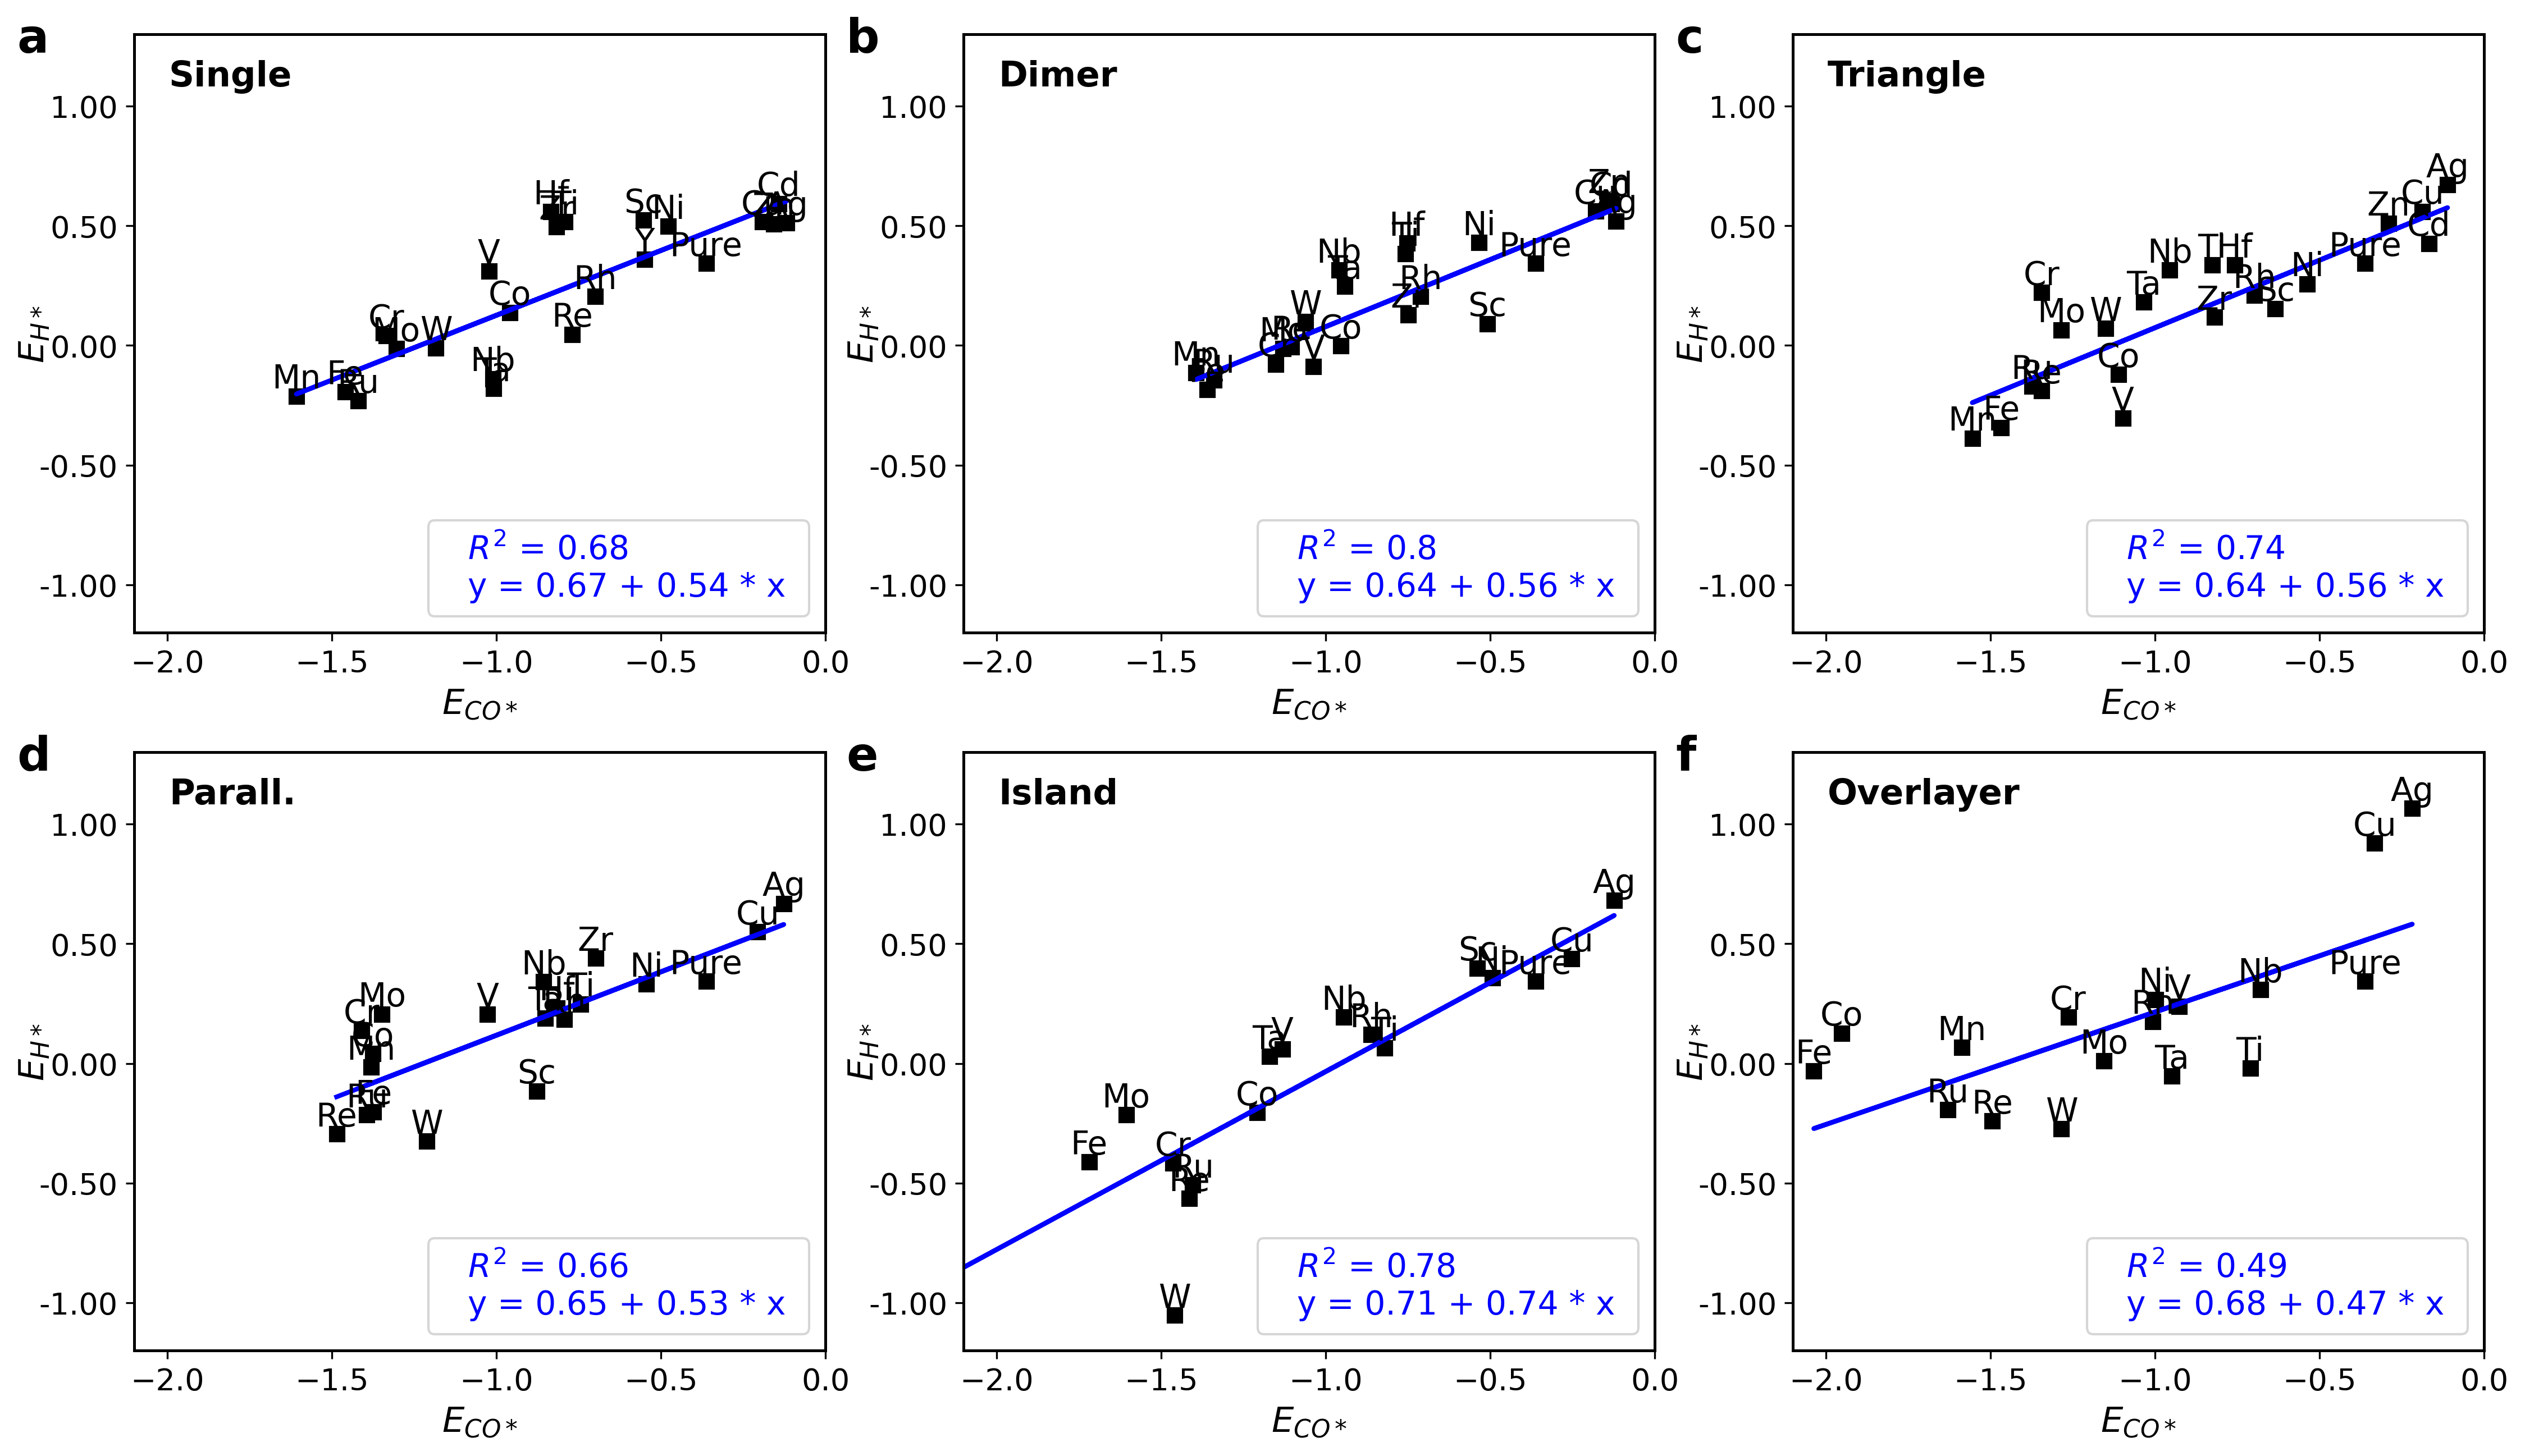

In [1]:
%matplotlib inline
import sys
sys.path.append("../../..")

from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.CO2RR import CO2RRFEDplot
from plotpackage.lib.scalingrelation import ScalingRelationPlot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

# binding energy
filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1+10 #1st column in excel
max_col = 5+10 #5th column in excel


# text = ['Near', 'Line', 'Triangle', 'Parall.', 'Island', 'Overlayer']
text = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']
colx = [2, 2, 2, 3, 3, 5] #column in excel
coly = [3, 5, 4, 5, 4, 4] #column in excel
for index in [0, 1, 4]:
# for index in [0, 1, 2, 3, 4, 5]:
#     figName1 = './paper1/All_FreeEnergy_typesetting_{}.jpg'.format(index)  #free energy diagram name
    figName2 = './paper1/All_ScalingRelation_typesetting_{}.jpg'.format(index) #scaling reation figure name
    # col2=4 # column in excel
    col1=colx[index] # column in excel
    col2=coly[index] # column in excel
    col1 = col1 - 2
    col2 = col2 - 2
    i = 0
    fig = plt.figure(figsize=(18, 16), dpi = 300)
    for types in ['single_b', 'dimer_b', 'triangle_b', 'paral_b', 'island_b', 'overly_b']:
        #change it only for excel
        sheet = types #Sheet1 by defaut
        min_row = 1+1 #1st column in excel
        max_row = 24+1 #9st column in excel
        
        ############ plot free energy diagram ###############
        stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
        #stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data
        
        # # del rows; delete according to element names in excel
        del_ele = []
        # if types == 'top-new':
        #     del_ele = [] #remove distortion for near
        # if types == 'near-new':
        #     del_ele = ['Fe', 'Ru', 'Zr', 'Y', 'Mn', 'Nb', 'Zn' ] #remove distortion for near
        # elif types == 'line':
        #     del_ele = ['Ag', 'Y'] #remove distortion for line
        # elif types == 'triangle':
        #     del_ele = ['Y',] #remove distortion for triangle
        # elif types == 'paral-new':
        #     del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for line
        # elif types == 'island-new':
        #     del_ele = ['Y', 'Zr',  'Zn'] #remove distortion for line
        # elif types == 'overly-new':
        #     del_ele = ['Sc', 'Zn', 'Y', 'Zr'] #remove distortion for line
        # if types == 'near-new':
        #     del_ele = ['Fe', 'Ru', 'Zr', 'Y', 'Mn', 'Nb', 'Zn' ] #remove distortion for near
        
        # #choose some rows
        # # selected_ele = ['Sc', 'Ti', 'V', 'Mn', 'Zn', 'Y', 'Zr', 'Nb', 'Mo'] #select according to element names in excel
        # selected_ele = ['Ti', 'Sc', 'Nb', 'Zr', 'Y', 'Zn', 'V', 'Mn', 'Mo', ] #select according to element names in excel
        # ranges = [observationName.index(each)+2 for each in selected_ele]
        # observationName = [observationName[i-2] for i in ranges]
        # selected_rows = [i-2 for i in ranges]
        # X = X[selected_rows,:]
        
        if types == 'single_b':
            del_ele = [] #remove distortion for near
        elif types == 'dimer_b':
            del_ele = ['Y', ] #remove distortion for line
        elif types == 'triangle_b':
            del_ele = ['Y',] #remove distortion for triangle
        elif types == 'paral_b':
            del_ele = ['Zn', 'Y', 'Cd'] #remove distortion for paral
        elif types == 'island_b':
            del_ele = ['Zn', 'Y', 'Zr', 'Hf', 'Cd'] #remove distortion for island
        elif types == 'overly_b':
            del_ele = ['Sc', 'Zn', 'Y', 'Zr', 'Hf', 'Cd'] #remove distortion for line
        # del_ele += ['Ti', 'Sc', 'Nb', 'Zr', 'Y', 'Zn', 'V', 'Mn', 'Mo', 'Pure'] #double bond and pure
        
         
        # dotColor = {'PdH': 'black', 'Pure': 'black', 'Pd': 'black', 'Sc': 'black', 'Ti': 'black', 'V': 'black', 
        #             'Mn': 'black', 'Fe': 'red', 'Co': 'red', 'Ni': 'red', 'Cu': 'red', 
        #             'Zn': 'black', 'Y': 'black', 'Zr': 'black', 'Nb': 'black', 'Mo': 'black', 'Ru': 'red',
        #             'Rh': 'red', 'Ag': 'red'}
        
        def delete(observationName, X, del_ele):
            del_rows = [observationName.index(each)+2 for each in del_ele]
            del_list = [x - 2 for x in del_rows]
            observationName = np.delete(observationName, del_list, 0)
            X = np.delete(X, del_list, 0)     
            descriper1 = (X[:, col1]).astype(float) 
            descriper2 = (X[:, col2]).astype(float)
            return observationName, X, descriper1, descriper2
        
        observationName1, X1, descriper11, descriper12 = delete(observationName, X, del_ele)
        
        
        # del_rows = [observationName.index(each)+2 for each in del_ele]
        # del_list = [x - 2 for x in del_rows]
        # observationName = np.delete(observationName, del_list, 0)
        # X = np.delete(X, del_list, 0)     
        # descriper1 = (X[:, col1]).astype(float) 
        # descriper2 = (X[:, col2]).astype(float)
        
        # p = 0
        # for ii, each in enumerate(observationName):
        #     if each == 'Pd':
        #         p = ii
        # observationName[p] = 'Pure'
        # np.where(observationName=='Pd', "Pure", observationName)
        
        # for ii, each in enumerate(observationName):
        #     if each == 'Pd':
        #         observationName = observationName.replace("Pd", "Pure")
        # np.char.replace(observationName, 'Pd', 'Pure')
        ax = plt.subplot(3, 3, i + 1)
        if index == 0:
            plt.xlim(-1.7, 1.5)
            plt.ylim(-2.2, 0) 
        elif index == 1:
            plt.xlim(-1.6, 1.5)
            plt.ylim(-1.75, 1.6)
        elif index == 4:
            plt.xlim(-2.1, 0.0)
            plt.ylim(-1.2, 1.3)
        stepsNames = ['$E_{HOCO*}$', '$E_{CO*}$', '$E_{H*}$', '$E_{OH*}$']

        sr1 = ScalingRelationPlot(descriper11, descriper12, observationName1, figName2)   
        sr1.plot(ax = ax, save=False,  dotcolor='black', linecolor='blue', title='', xlabel=stepsNames[col1], ylabel=stepsNames[col2], text=text[i])
        
        
        # plot single bond
        if index == 0 or index == 1:
            del_ele += ['Ti', 'Sc', 'Nb', 'Zr', 'Y', 'Zn', 'V', 'Mn', 'Mo', 'Pure', 'Cr', 'Hf', 'Cd', 'W', 'Ta', 'Re'] #double bond and pure
            observationName2, X2, descriper21, descriper22 = delete(observationName, X, del_ele)
            sr2 = ScalingRelationPlot(descriper21, descriper22, observationName2, figName2)   
            sr2.plot(ax = ax, save=False,  dotcolor='red', linecolor='red', title='', xlabel=stepsNames[col1], ylabel=stepsNames[col2], text=text[i])
        
        import string
        ax.text(-0.17, 0.97, string.ascii_lowercase[i], transform=ax.transAxes, size=20, weight='bold')
        
        i = i +1
    plt.show()
    fig.savefig(figName2, dpi=300, bbox_inches='tight')
    print('===============================')

# Free energy diagram

auto loaded stepsName:  ['* + CO$_{2}$', 'HOCO*', 'CO*', '* + CO']
auto loaded obserName:  ['Pure' 'Sc' 'Ti' 'V' 'Cr' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zn' 'Y' 'Zr' 'Nb'
 'Mo' 'Ru' 'Rh' 'Ag' 'Cd' 'Hf' 'Ta' 'W' 'Re']
auto loaded data: 
 [[ 0.          0.81967882  0.21640444  0.123     ]
 [ 0.          1.06229848  0.02627234  0.123     ]
 [ 0.          0.91652427 -0.21296131  0.123     ]
 [ 0.          0.83742687 -0.44339307  0.123     ]
 [ 0.          0.8489759  -0.75592785  0.123     ]
 [ 0.          0.8388517  -1.02878745  0.123     ]
 [ 0.          0.81654067 -0.8805081   0.123     ]
 [ 0.          0.96208848 -0.37966808  0.123     ]
 [ 0.          0.98129886  0.1010938   0.123     ]
 [ 0.          1.05662297  0.38825929  0.123     ]
 [ 0.          1.10450544  0.42185297  0.123     ]
 [ 0.          0.88707647  0.02918829  0.123     ]
 [ 0.          0.76403078 -0.23806156  0.123     ]
 [ 0.          0.75452582 -0.43206613  0.123     ]
 [ 0.          0.84856946 -0.72525127  0.123     ]
 [ 0.  

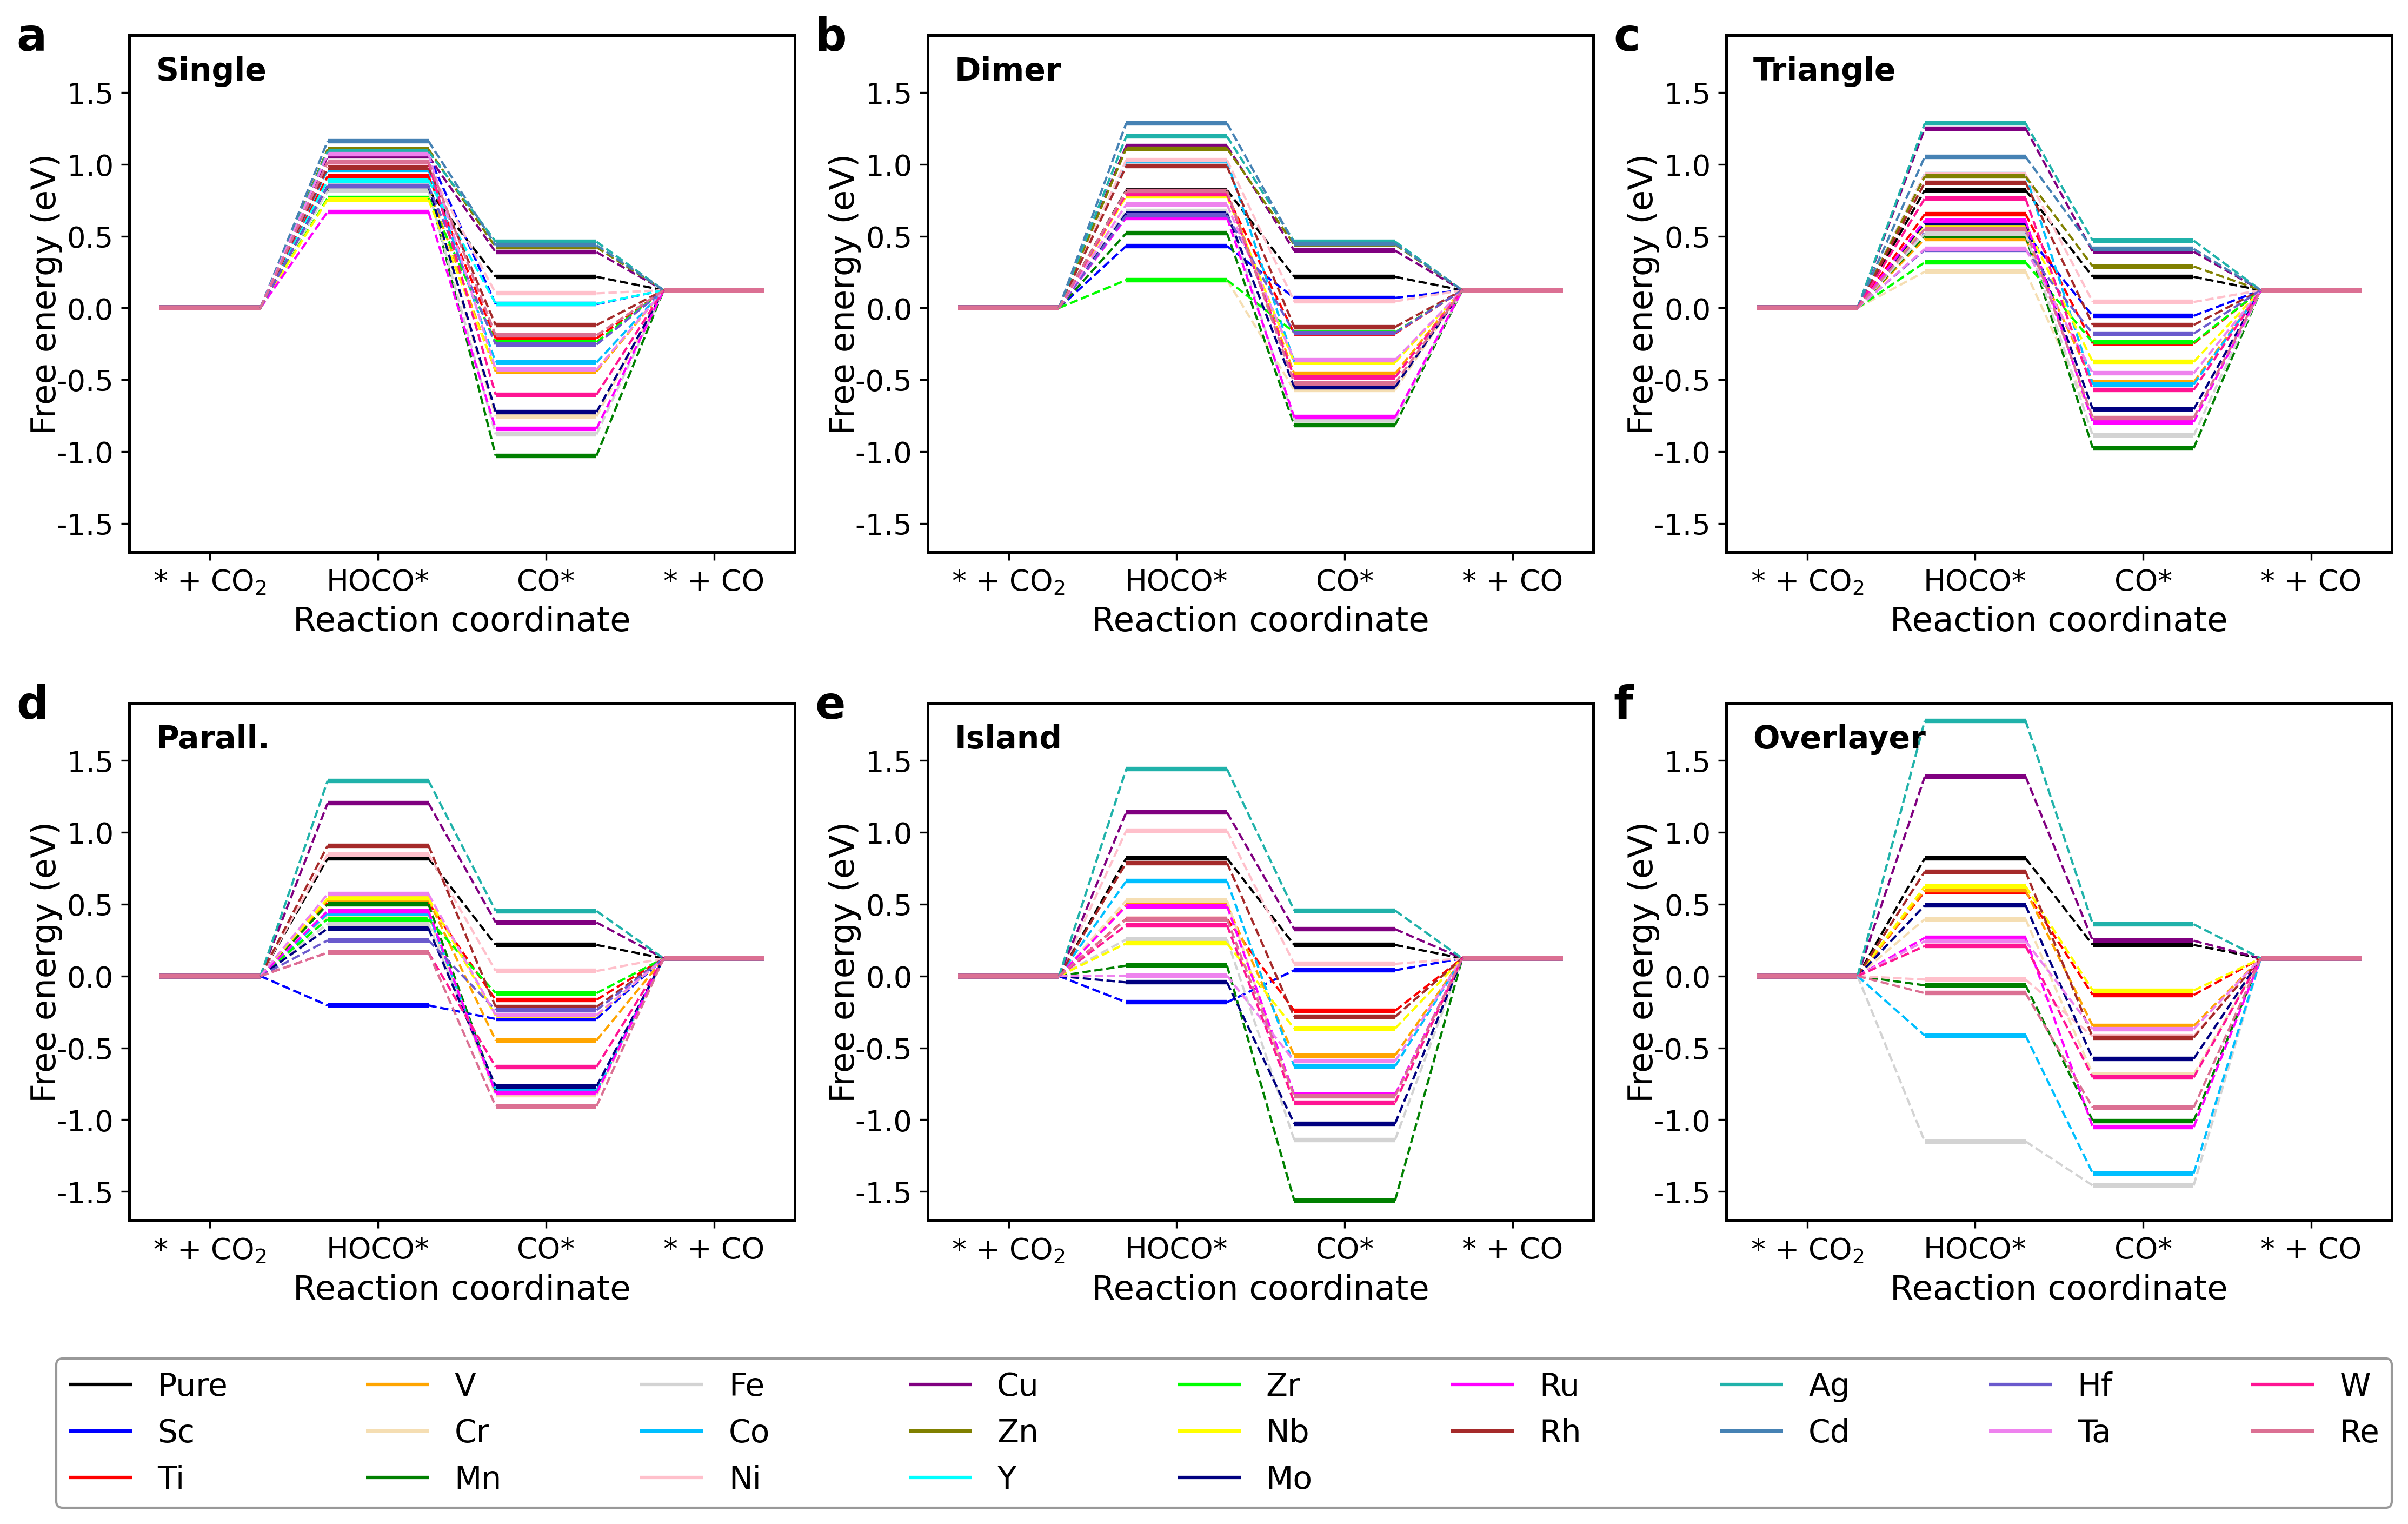

In [16]:
%matplotlib inline
import sys
sys.path.append("../../..")

from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.CO2RR import CO2RRFEDplot
from plotpackage.lib.scalingrelation import ScalingRelationPlot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1+18 #1st column in excel
max_col = 5+18 #5th column in excel

#saved figure name
figName1 = './paper1/All_FreeEnergy_typesetting.jpg'  #free energy diagram name
# figName2 = './paper1//ScalingRelation_typesetting.jpg' #scaling reation figure name

i = 0
fig = plt.figure(figsize=(18, 10), dpi = 300)
text = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']
# col1 = [2, 2, 2, 3, 3, 5] #column in excel
# col2 = [3, 5, 4, 5, 4, 4] #column in excel
# col1=2 # column in excel
# col2=5 # column in excel
# col1 = col1 - 2
# col2 = col2 - 2
for types in ['single_b', 'dimer_b', 'triangle_b', 'paral_b', 'island_b', 'overly_b']:
    #change it only for excel
    sheet = types #Sheet1 by defaut
    min_row = 1+1 #1st column in excel
    max_row = 24+1 #9st column in excel
    
    ############ plot free energy diagram ###############
    stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
    #stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data
    
    # # del rows; delete according to element names in excel
    del_ele = []
    # if types == 'top-new':
    #     del_ele = [] #remove distortion for near
    # if types == 'near-new':
    #     del_ele = ['Fe', 'Ru', 'Zr', 'Y', 'Mn', 'Nb', 'Zn' ] #remove distortion for near
    # elif types == 'line':
    #     del_ele = ['Ag', 'Y'] #remove distortion for line
    # elif types == 'triangle':
    #     del_ele = ['Y',] #remove distortion for triangle
    # elif types == 'paral-new':
    #     del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for line
    # elif types == 'island-new':
    #     del_ele = ['Y', 'Zr', 'Sc', 'Zn'] #remove distortion for line
    # elif types == 'overly-new':
    #     del_ele = ['Sc', 'Zn', 'Y', 'Zr', 'Fe'] #remove distortion for line
    
    # if types == 'near-new':
    #     del_ele = ['Fe', 'Ru', 'Zr', 'Y', 'Mn', 'Nb', 'Zn' ] #remove distortion for near
    if types == 'single_b':
            del_ele = [] #remove distortion for near
    elif types == 'dimer_b':
        del_ele = ['Y', ] #remove distortion for line
    elif types == 'triangle_b':
        del_ele = ['Y',] #remove distortion for triangle
    elif types == 'paral_b':
        del_ele = ['Zn', 'Y', 'Cd'] #remove distortion for paral
    elif types == 'island_b':
        del_ele = ['Zn', 'Y', 'Zr', 'Hf', 'Cd'] #remove distortion for island
    elif types == 'overly_b':
        del_ele = ['Sc', 'Zn', 'Y', 'Zr', 'Hf', 'Cd'] #remove distortion for line
        

    del_rows = [observationName.index(each)+2 for each in del_ele]
    ### del_rows = [10, 12, 13, 18]  #delete according to rows in excel
    del_list = [x - 2 for x in del_rows]
    observationName = np.delete(observationName, del_list, 0)
    X = np.delete(X, del_list, 0)
    
    M  = 3
    ax = plt.subplot(2, 3, i + 1)
    
#     descriper1 = (X[:, col1]).astype(float) 
#     descriper2 = (X[:, col2]).astype(float) 
    # sr = ScalingRelationPlot(descriper1, descriper2, observationName, figName2)   
    # sr.plot(ax = ax, save=False, title='', xlabel=stepsNames[col1], ylabel=stepsNames[col2], text=text[i])
    stepsNames = ['* + CO$_{2}$', 'HOCO*', 'CO*', '* + CO']  #reload step name for CO2RR
    
    CO2RRdiagram = CO2RRFEDplot(stepsNames, observationName, X, figName1)
    CO2RRdiagram.plot(ax = ax, title='', save=False, legendSize = 9., text = text[i], ratio=1.3, legend=False, ymin=-1.7, ymax=1.9)
    
    import string
    ax.text(-0.17, 0.97, string.ascii_lowercase[i], transform=ax.transAxes, size=20, weight='bold')
    
    i = i +1

lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'lower left', ncol=9, mode="expand", borderaxespad=0.,bbox_to_anchor=(0.1, -0.04, 0.8, 1.02), fontsize=14,edgecolor='grey' )
plt.show()

fig.savefig(figName1, dpi=300, bbox_inches='tight')

# Volcano plot

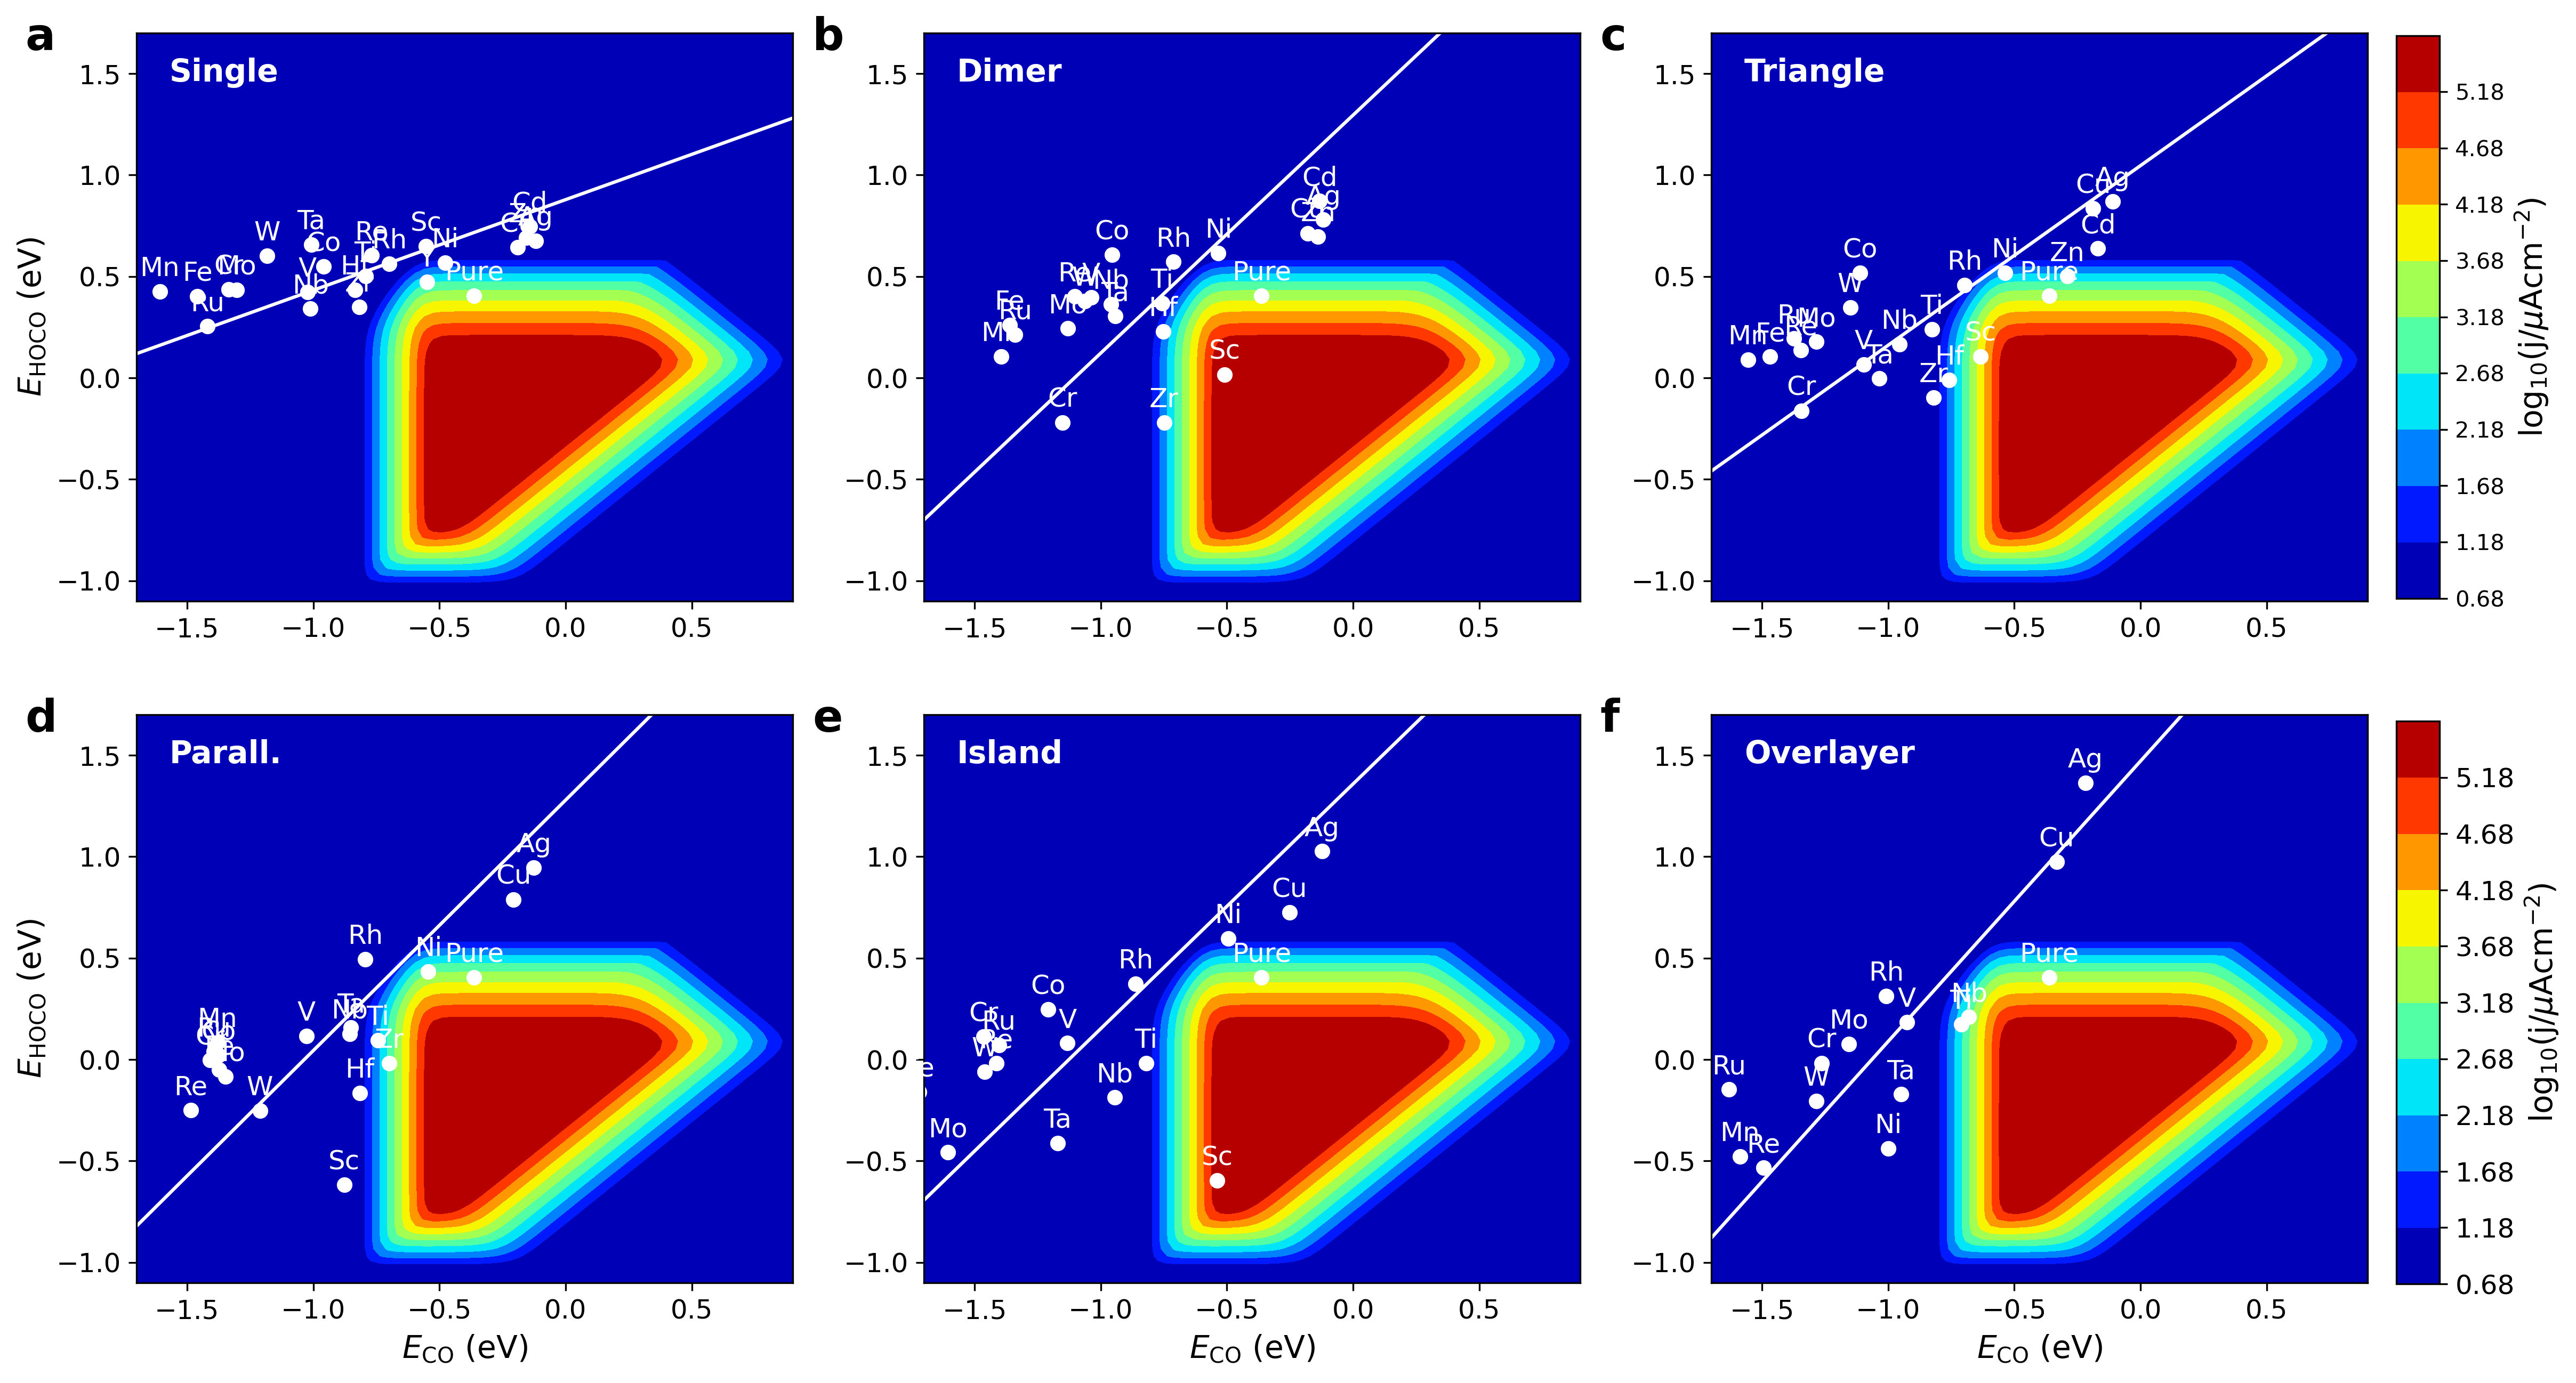

In [10]:
%matplotlib inline
import sys
sys.path.append("../../..")

from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.CO2RR import CO2RRFEDplot
from plotpackage.lib.scalingrelation import ScalingRelationPlot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp
from CO2toCO_acid import CO2toCO
from matplotlib import rc
# rc('font', **{'family':'sans-serif','sans-serif':['Helvetica'], 'size':8})

G_CO2g = -18.418 # eV
G_H2g = -7.096# eV
G_H2Og = -12.827 # eV
G_COg = -12.564 # eV

kB = 8.617e-5 # Boltzmann constant in eV/K
hplanck = 4.135669e-15 # eV s
T0 = 297.15
# T0 = 370
Gact0 = Gact1 = Gact2 = 0.2 # activative free energy 0.475
tc0 = tc1 = tc2 = 0.5  #transfer coefficiency
A_act1 = np.exp( - Gact1 / ( kB * T0 ) ) # 
A_act2 = np.exp( - Gact2 / ( kB * T0 ) ) # electrochemical prefactor, fitting
G_1act_cap = -Gact1
G_2act_cap = -Gact2

A_prior = 3.6 * 10**4

nu_e = kB * T0 / hplanck
nu_c = 1.e13

cHp0 = 10.**(-0.)
UHER0 = URHE0 = kB * T0 * np.log(cHp0)   # introduced to shift the plotted potential window to the relevant range w

U0 = -0.5 # applied potential vs. she
U = U0 + UHER0

ddG_HOCO = 0.414 # correction from binding energy to free energy
ddG_CO = 0.579

def get_K1(E_HOCO, U, T=T0):
    """ K1 using HOCO binding
    """
    beta = 1. / (kB * T) 
    dG = E_HOCO + ddG_HOCO
    K1 = exp( - (dG + 1.0 * U ) * beta )
    return K1

def get_K2(E_HOCO, E_CO, U,  T=T0):
    """ K2 using HOCO and CO binding.
    """
    beta = 1. / (kB * T) 
    dG = E_CO + ddG_CO - E_HOCO - ddG_HOCO - G_CO2g - G_H2g + G_H2Og + G_COg
    K2 =  exp( - ( dG + 1.0 * U ) * beta ) 
    return K2

def get_K3(E_CO, U, T=T0):
    """ K3 asumming scaling.
    """
    beta = 1. / (kB * T) 
    dG = - (E_CO + ddG_CO)
    K3 = exp( - dG * beta )
    return K3



def get_k1(nu, E_HOCO, U, T=T0, tc=tc1):
    """ k1 using HOCO binding (vs CO2 and H2)
    """
    beta = 1. / (kB * T) 
    dG_rhe = E_HOCO + ddG_HOCO # vs. RHE
    Urev_rhe = -dG_rhe
    # dG_she = dG_rhe 
    # Urev_she = -dG_she + UHER0
    k1 = A_prior * exp( - max( ( U - Urev_rhe ) * tc, G_1act_cap) * beta ) 
    # k1 = nu * A_act1 * exp( - max( ( U - Urev_rhe ) * tc, G_1act_cap) * beta ) 
    
    #k1 = nu * A_act1 * exp( - min( ( U - dG_she ) * tc, 0) * beta ) 
    #dGw =  - kB * T * np.log(Kw)
    #dG = 0. * Gact0 + ddG_HOCO + E_HOCO + dGw
    #U0 = (1./tc - 1.) * dG - Gact0
    #k1 = nu * A_act1 * exp( - max( dG + ( U - U0 ) * tc, 0) * beta )
    return k1

def get_k2(nu, E_HOCO, E_CO, U, T=T0, tc=tc2):
    """ k2 using HOCO and CO energies.
    """    
    beta = 1. / (kB * T)  
    dG_rhe = E_CO + ddG_CO - E_HOCO - ddG_HOCO - G_CO2g - G_H2g + G_H2Og + G_COg
    Urev_rhe = -dG_rhe
    # dG_she = dG_rhe
    # Urev_she = - dG_she + URHE0
    k2 = A_prior * exp( - max(( U - Urev_rhe ) * tc, G_2act_cap) * beta ) 
    # k2 = nu * A_act2 * exp( - max(( U - Urev_rhe ) * tc, G_2act_cap) * beta ) 
    return k2

def get_k3(nu, E_CO, U, T=T0, tc=tc0):
    """ k3 assuming scaling.
    """
    beta = 1. / (kB * T) 
    dE = - E_CO
    dE = max(dE,0)
    k3 = nu * exp( - dE * beta )
    return k3


def get_rates(nu_e, nu_c, E_HOCO, E_CO, U, T=T0):
    """ Returns rate constants and equilibirum constants,
    """
    K1 = get_K1(E_HOCO, U, T=T)
    K2 = get_K2(E_HOCO, E_CO, U, T=T)
    K3 = get_K3(E_CO, U, T=T)
    k1 = get_k1(nu_e, E_HOCO, U, T=T)
    k2 = get_k2(nu_e, E_HOCO, E_CO, U, T=T)
    k3 = get_k3(nu_c, E_CO, U, T=T)
    return k1, K1, k2, K2, k3, K3


pCO2 = 1.
# pCO =  0.005562
pCO =  1.
xH2O = 1.
cHp = cHp0 #1.
# N = 20*4
# M = 30*4
N = 20*4
M = 20*4
R = np.empty([M,N])
Thetas = np.empty([M,N,3])
# E_HOCO_e = np.linspace(-0.8, 1.45, M)
# E_CO_e = np.linspace(-2.2, 0.6, N)
E_CO_e = np.linspace(-1.8, 1., N)
E_HOCO_e = np.linspace(-1.2, 1.8, M)

jmax = 10.0e3 # exptl current plateau's at 10 mA/cm2 
jmin = 0.1
for j, E_CO in enumerate(E_CO_e):
    for i, E_HOCO in enumerate(E_HOCO_e):
        k1, K1, k2, K2, k3, K3 = get_rates(nu_e, nu_c, E_HOCO, E_CO, U, T=T0)
        rm = CO2toCO(pCO2, pCO, xH2O, cHp, k1, K1, k2, K2, k3, K3)
        # rm = CO2toCO(pCO2, pCO, xH2O, cOHm, k1, K1, k2, K2, k3, K3, T0)
        thetas, rates = rm.solve()
        # print(rates)
        rate = min(jmax, rates[0])
        rate = max(jmin, rate)
        R[i,j] = np.log10(rate*47.96) # TOF to current
        Thetas[i,j,:] = thetas

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1+10 #1st column in excel
max_col = 5+10 #5th column in excel

# #saved figure name
# figName1 = '../pictures/CO2RR_FreeEnergy_typesetting.jpg'  #free energy diagram name
# figName2 = '../pictures/ScalingRelation_typesetting.jpg' #scaling reation figure name

index = 0
fig = plt.figure(figsize=(18, 16), dpi = 300)
text = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']
# col1 = [2, 2, 2, 3, 3, 5] #column in excel
# col2 = [3, 5, 4, 5, 4, 4] #column in excel
col1=2 # column in excel
col2=3 # column in excel
col1 = col1 - 2
col2 = col2 - 2
for types in ['single_b', 'dimer_b', 'triangle_b', 'paral_b', 'island_b', 'overly_b']:
    #change it only for excel
    sheet = types #Sheet1 by defaut
    min_row = 1+1 #1st column in excel
    max_row = 24+1 #9st column in excel
    
    ############ plot free energy diagram ###############
    stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
    #stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data
    
    # # del rows; delete according to element names in excel
    del_ele = []
    # if types == 'near-new':
    #     del_ele = ['Fe', 'Ru', 'Zr', 'Y', 'Mn', 'Nb', 'Zn' ] #remove distortion for near
    # if types == 'top-new':
    #     del_ele = [] #remove distortion for near
    # elif types == 'line':
    #     del_ele = ['Ag', 'Y'] #remove distortion for line
    # elif types == 'triangle':
    #     del_ele = ['Y',] #remove distortion for triangle
    # elif types == 'paral-new':
    #     del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for paral
    # elif types == 'island-new':
    #     del_ele = ['Y', 'Zr',  'Zn'] #remove distortion for island
    # elif types == 'overly-new':
    #     del_ele = ['Sc', 'Zn', 'Y', 'Zr'] #remove distortion for line
    # if types == 'near-new':
    #     del_ele = ['Fe', 'Ru', 'Zr', 'Y', 'Mn', 'Nb', 'Zn' ] #remove distortion for near
    if types == 'single_b':
            del_ele = [] #remove distortion for near
    elif types == 'dimer_b':
        del_ele = ['Y', ] #remove distortion for line
    elif types == 'triangle_b':
        del_ele = ['Y',] #remove distortion for triangle
    elif types == 'paral_b':
        del_ele = ['Zn', 'Y', 'Cd'] #remove distortion for paral
    elif types == 'island_b':
        del_ele = ['Zn', 'Y', 'Zr', 'Hf', 'Cd'] #remove distortion for island
    elif types == 'overly_b':
        del_ele = ['Sc', 'Zn', 'Y', 'Zr', 'Hf', 'Cd'] #remove distortion for line
        
    del_rows = [observationName.index(each)+2 for each in del_ele]
    ### del_rows = [10, 12, 13, 18]  #delete according to rows in excel
    del_list = [x - 2 for x in del_rows]
    observationName = np.delete(observationName, del_list, 0)
    X = np.delete(X, del_list, 0)
    
    M  = 3
    ax = plt.subplot(3, 3, index + 1)
    EHOCO_d = (X[:, col1]).astype(float) 
    ECO_d = (X[:, col2]).astype(float) 
    # sr = ScalingRelationPlot(descriper1, descriper2, observationName, figName2)   
    # sr.plot(ax = ax, save=False, title='', xlabel=stepsNames[col1], ylabel=stepsNames[col2], text=text[index])
    
    contours = np.linspace(np.log10(jmin*47.96), np.log10(jmax*47.96), 11) 
    plt.contourf(E_CO_e, E_HOCO_e, R, contours, cmap=plt.cm.jet) # plot countour
    
    
    for i,metal in enumerate(observationName):
        plt.plot(ECO_d[i], EHOCO_d[i], 'o', color='white') 
        plt.text(ECO_d[i], EHOCO_d[i]+0.05, metal, fontsize=12, horizontalalignment='center', verticalalignment='bottom', color='white')
    
    #linear fiting and plot linear line
    # m, b = np.polyfit(ECO_d, EHOCO_d, 1)
    # plt.axline((ECO_d[3], ECO_d[3]*m +b), slope=m, color='white')
    m, b = np.polyfit(EHOCO_d, ECO_d, 1)
    plt.axline(( ECO_d[0], ECO_d[0]/m-b/m), slope=1/m, color='white')
    # plt.plot(self.descriper1, m * self.descriper1 + b, linewidth=2, color=linecolor)
        
    plt.xlim([E_CO_e[0]+0.1, E_CO_e[-1]-0.1])
    plt.ylim([E_HOCO_e[0]+0.1, E_HOCO_e[-1]-0.1])
    ax.tick_params(labelsize=12) #tick label font size
    # plt.title(text[index], fontsize=14,)
    plt.text(0.05, 0.93, text[index], horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=14, color='white', fontweight='bold')        
    # if index==2 or index==5:
    #     bar = plt.colorbar(ticks=np.arange(min(contours), max(contours), 0.5))
    #     bar.set_label(r'log$_{10}$(j/$\mu$Acm$^{-2}$)')
    if index==3 or index==4 or index==5:
        plt.xlabel(r'$E_{\mathrm{CO}}$ (eV)', fontsize=14,)
    if index==0 or index==3:
        plt.ylabel(r'$E_{\mathrm{HOCO}}$ (eV)', fontsize=14,)
    if index==2:
        cbaxes = fig.add_axes([0.91, 0.659, 0.015, 0.22]) #Add position (left, bottom, width, height)
        bar = plt.colorbar(ticks=np.arange(min(contours), max(contours), 0.5), cax=cbaxes)
        bar.ax.tick_params(labelsize=10)
        bar.set_label(r'log$_{10}$(j/$\mu$Acm$^{-2}$)', fontsize=14,)
    if index==5:
        cbaxes = fig.add_axes([0.91, 0.391, 0.015, 0.22]) #Add position (left, bottom, width, height)
        bar = plt.colorbar(ticks=np.arange(min(contours), max(contours), 0.5), cax=cbaxes)
        bar.ax.tick_params(labelsize=12)
        bar.set_label(r'log$_{10}$(j/$\mu$Acm$^{-2}$)', fontsize=14,)
    
    import string
    ax.text(-0.17, 0.97, string.ascii_lowercase[index], transform=ax.transAxes, size=20, weight='bold')
    
    index = index +1


# fig.tight_layout()
plt.savefig('./paper1/Rate_vs_HOCO_CO.png', dpi=300, bbox_inches='tight')    
plt.show()


# Selectivity

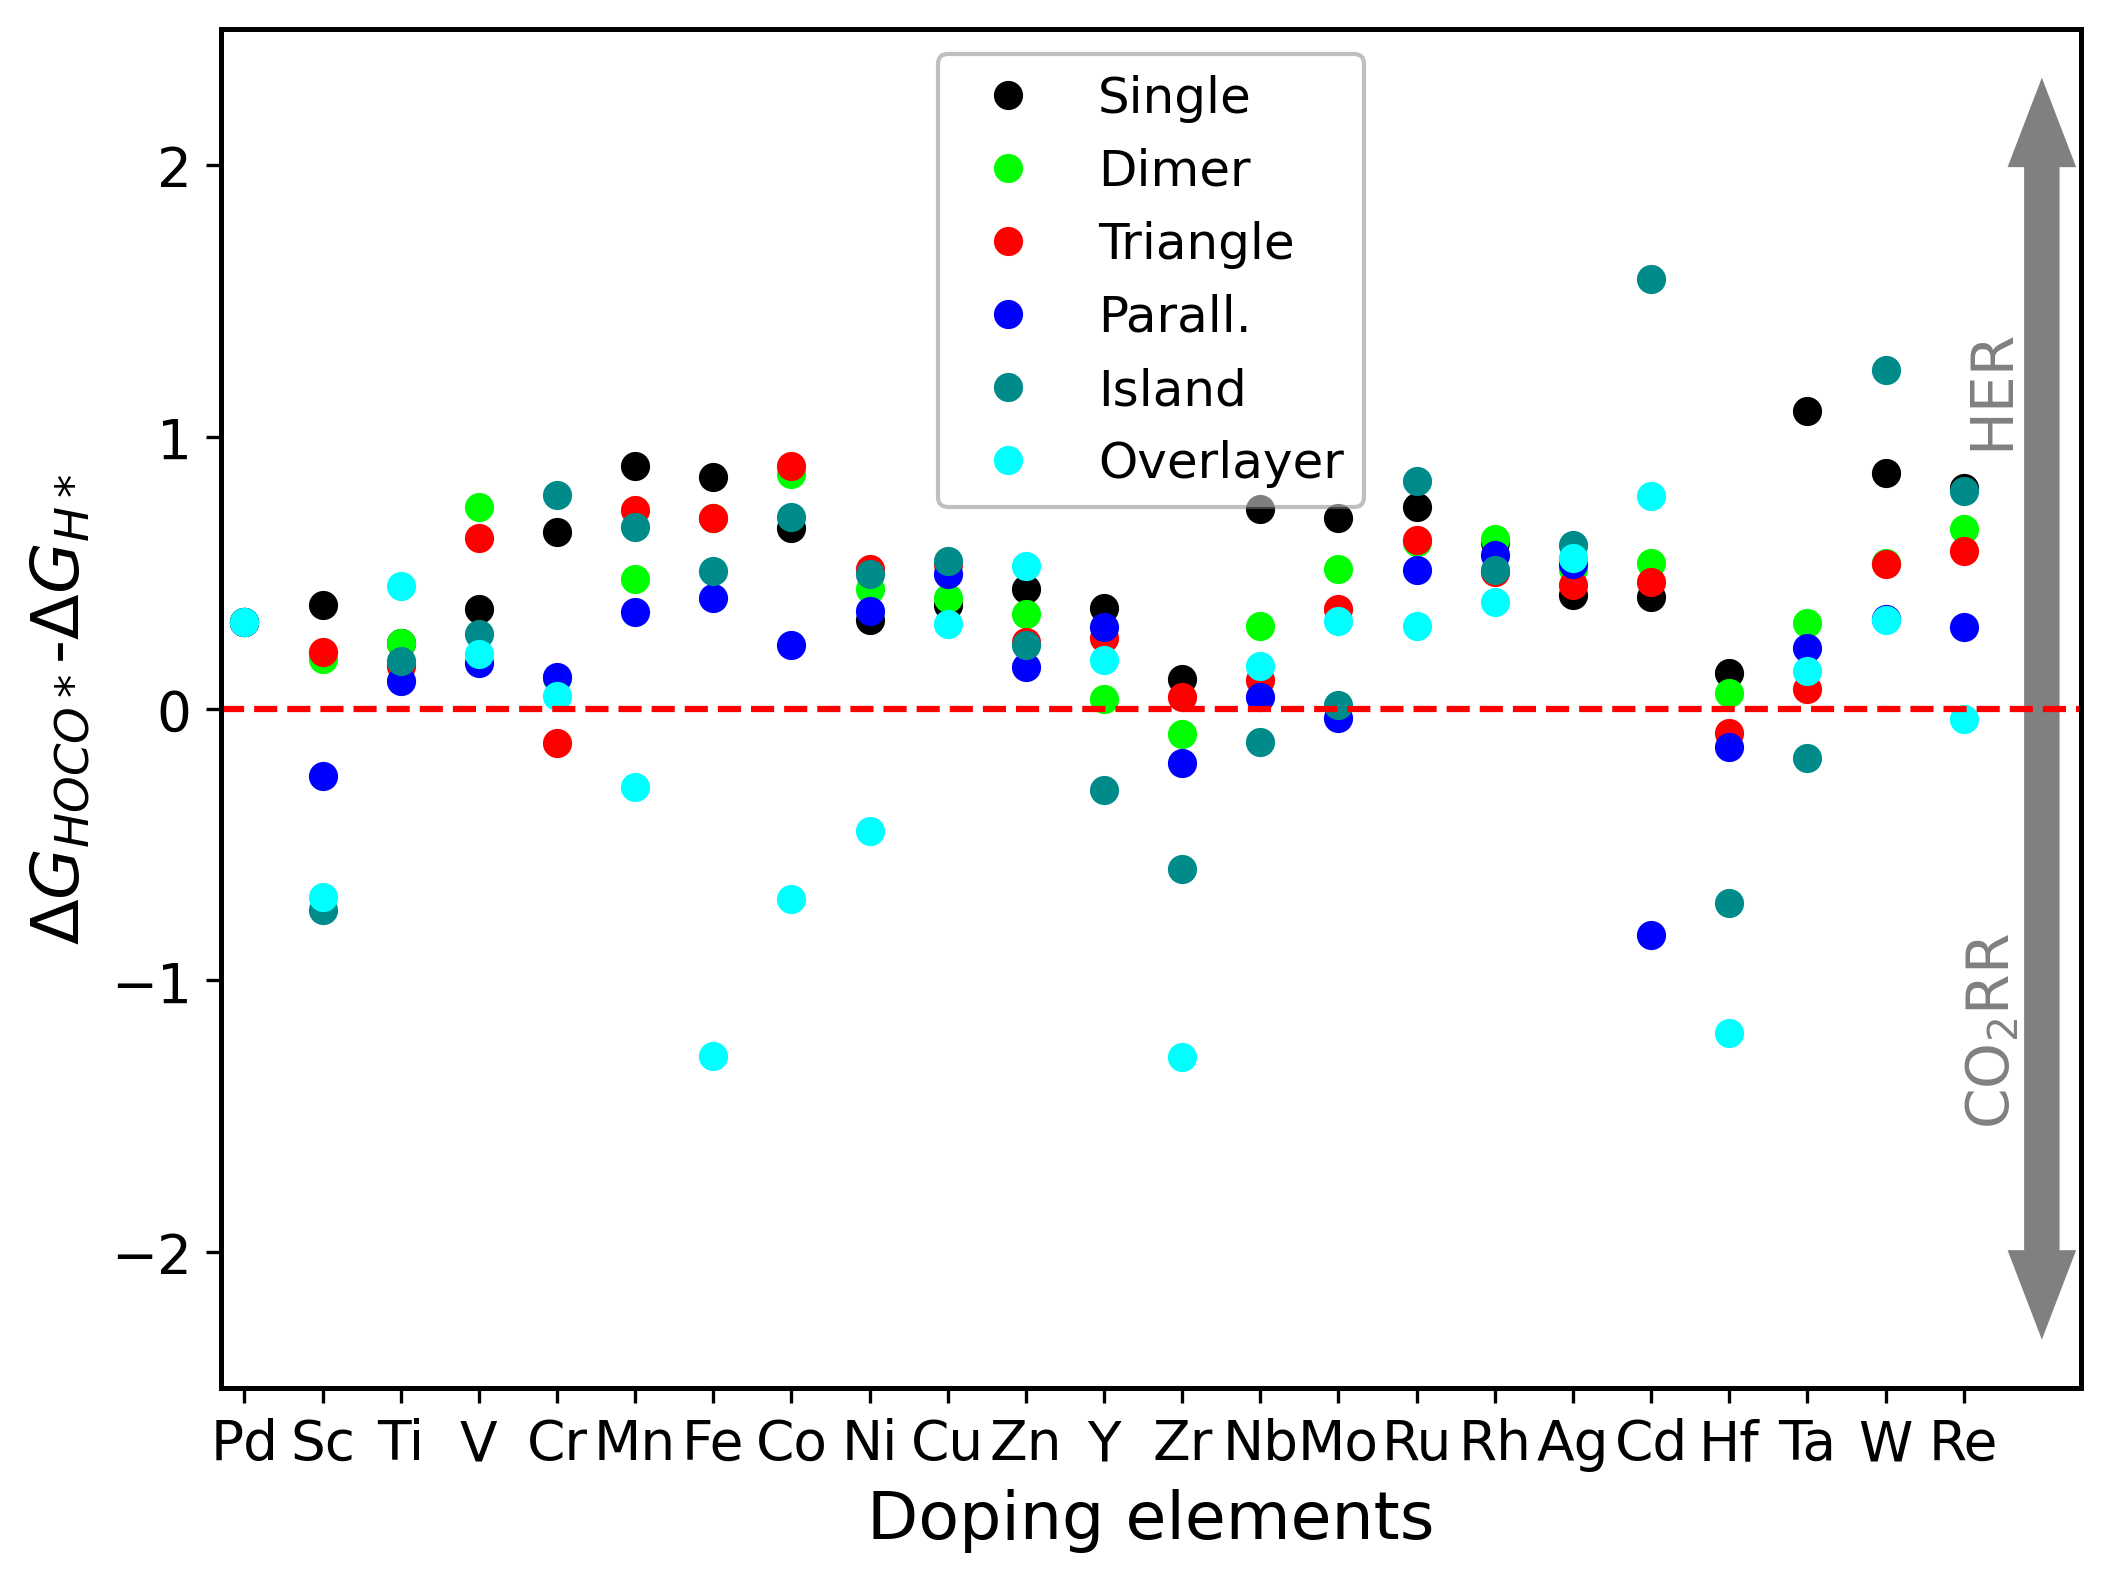

In [72]:
%matplotlib inline
from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1 #1st column in excel
max_col = 7 #5th column in excel

#change it only for excel
sheet = 'selectivity' #Sheet1 by defaut
# sheet = 'Formation Energy' #Sheet1 by defaut
min_row = 1 #1st column in excel
max_row = 24 #9st column in excel

#saved figure name
figName1 = './paper1/Selectivity.jpg'  #free energy diagram name

############ plot free energy diagram ###############
colorList = ['k', 'lime', 'r', 'b', 'darkcyan', 'cyan', 'olive', 'magenta', 'pink', 'gray', 'orange', 'purple', 'g']
typeNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
#stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data

fig = plt.figure(figsize=(8, 6), dpi = 300)
x = np.arange(0,len(observationName),1)

# marker = ['o', '^', '<', '>', 'v', 's', 'd', '.', ',', 'x', '+']
for i in range(len(typeNames)):    
    plt.plot(x, X[:,i], 'o', color=colorList[i])  #plot dots
    # plt.plot(x, X[:,i], marker[i], color=colorList[i])  #plot dots

typeNames = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']     
plt.legend(typeNames, framealpha=0.5, fontsize=12,  edgecolor='grey')
plt.axhline(y=0, color='r', linestyle='--')

plt.xlim([-0.3, 23.5])
plt.ylim([-2.5, 2.5])
plt.xlabel('Doping elements', fontsize=16)
# plt.ylabel('Formation energy (eV/atom)', fontsize=14)
plt.ylabel('$\Delta G_{HOCO*}$-$\Delta G_{H*}$', fontsize=16)
# plt.title(sheet, fontsize=16)
ax = fig.gca()
ax.set_xticks(x)
ax.set_xticklabels(observationName)


ax.tick_params(labelsize=13.2) #tick label font size
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2) #linewith of frame

    
plt.arrow(x=23, y=0, dx=0, dy=2, width=.4, head_width=0.8, head_length=0.3, color='grey') 
plt.annotate('HER', xy = (22, 1), rotation=90, fontsize=14, color='grey')

plt.arrow(x=23, y=0, dx=0, dy=-2, width=.4, head_width=0.8, head_length=0.3, color='grey') 
plt.annotate('CO$_2$RR', xy = (22, -1.5), rotation=90, fontsize=14, color='grey')
# import matplotlib.transforms
# import matplotlib.path
# from matplotlib.collections import LineCollection

# def rainbowarrow(ax, start, end, cmap="viridis", n=50,lw=3):
#     cmap = plt.get_cmap(cmap,n)
#     # Arrow shaft: LineCollection
#     x = np.linspace(start[0],end[0],n)
#     y = np.linspace(start[1],end[1],n)
#     points = np.array([x,y]).T.reshape(-1,1,2)
#     segments = np.concatenate([points[:-1],points[1:]], axis=1)
#     lc = LineCollection(segments, cmap=cmap, linewidth=lw)
#     lc.set_array(np.linspace(0,1,n))
#     ax.add_collection(lc)
#     # Arrow head: Triangle
#     tricoords = [(0,-0.4),(0.5,0),(0,0.4),(0,-0.4)]
#     angle = np.arctan2(end[1]-start[1],end[0]-start[0])
#     rot = matplotlib.transforms.Affine2D().rotate(angle)
#     tricoords2 = rot.transform(tricoords)
#     tri = matplotlib.path.Path(tricoords2, closed=True)
#     ax.scatter(end[0],end[1], c=1, s=(2*lw)**2, marker=tri, cmap=cmap,vmin=0)
#     ax.autoscale_view()

# rainbowarrow(ax, (16,0), (16, 2), cmap='Reds', n=50, lw=9) 
# plt.annotate('HER', xy = (16.2, 1), rotation=90, fontsize=14)

# rainbowarrow(ax, (16,0), (16, -2), cmap='Reds', n=50, lw=9) 
# plt.annotate('CO$_2$RR', xy = (16.2, -1.5), rotation=90, fontsize=14)


# add background
# plotlim = plt.xlim() + plt.ylim() 
# ax.imshow([[.6, .6], [.7, .7]], interpolation='bicubic', cmap=plt.cm.gray, extent=(-0.8, 16.8, 0, 2.5))
# ax.imshow([[.6, .6], [.7, .7]], interpolation='bicubic', cmap=plt.cm.gray, extent=(-0.8, 16.8, 0, -2.5))
# ax.set_aspect('auto') 


fig.savefig(figName1, dpi=300, bbox_inches='tight')
plt.show()

#add metadata into pictures
# figNames = [figName1]
# fmd = FigsMetaData(figNames, filename, sheet, min_col, max_col, min_row, max_row)
# fmd.add_metadata()

No handles with labels found to put in legend.


7.723504723892804


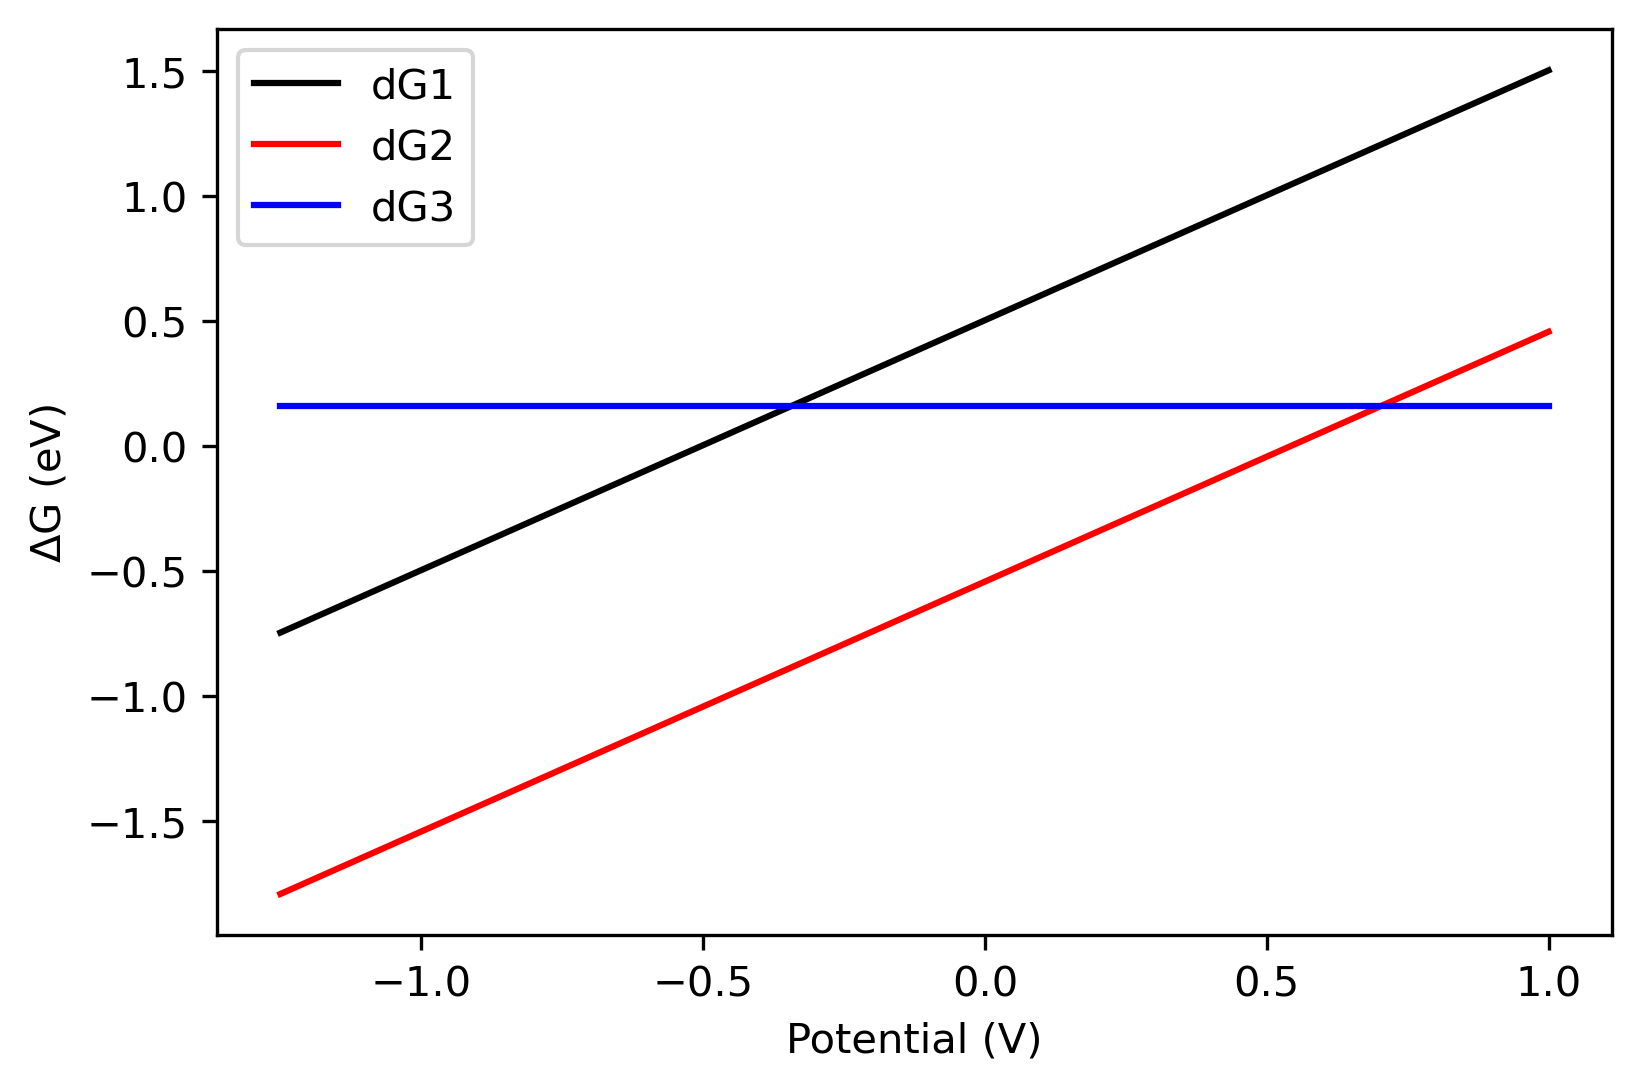

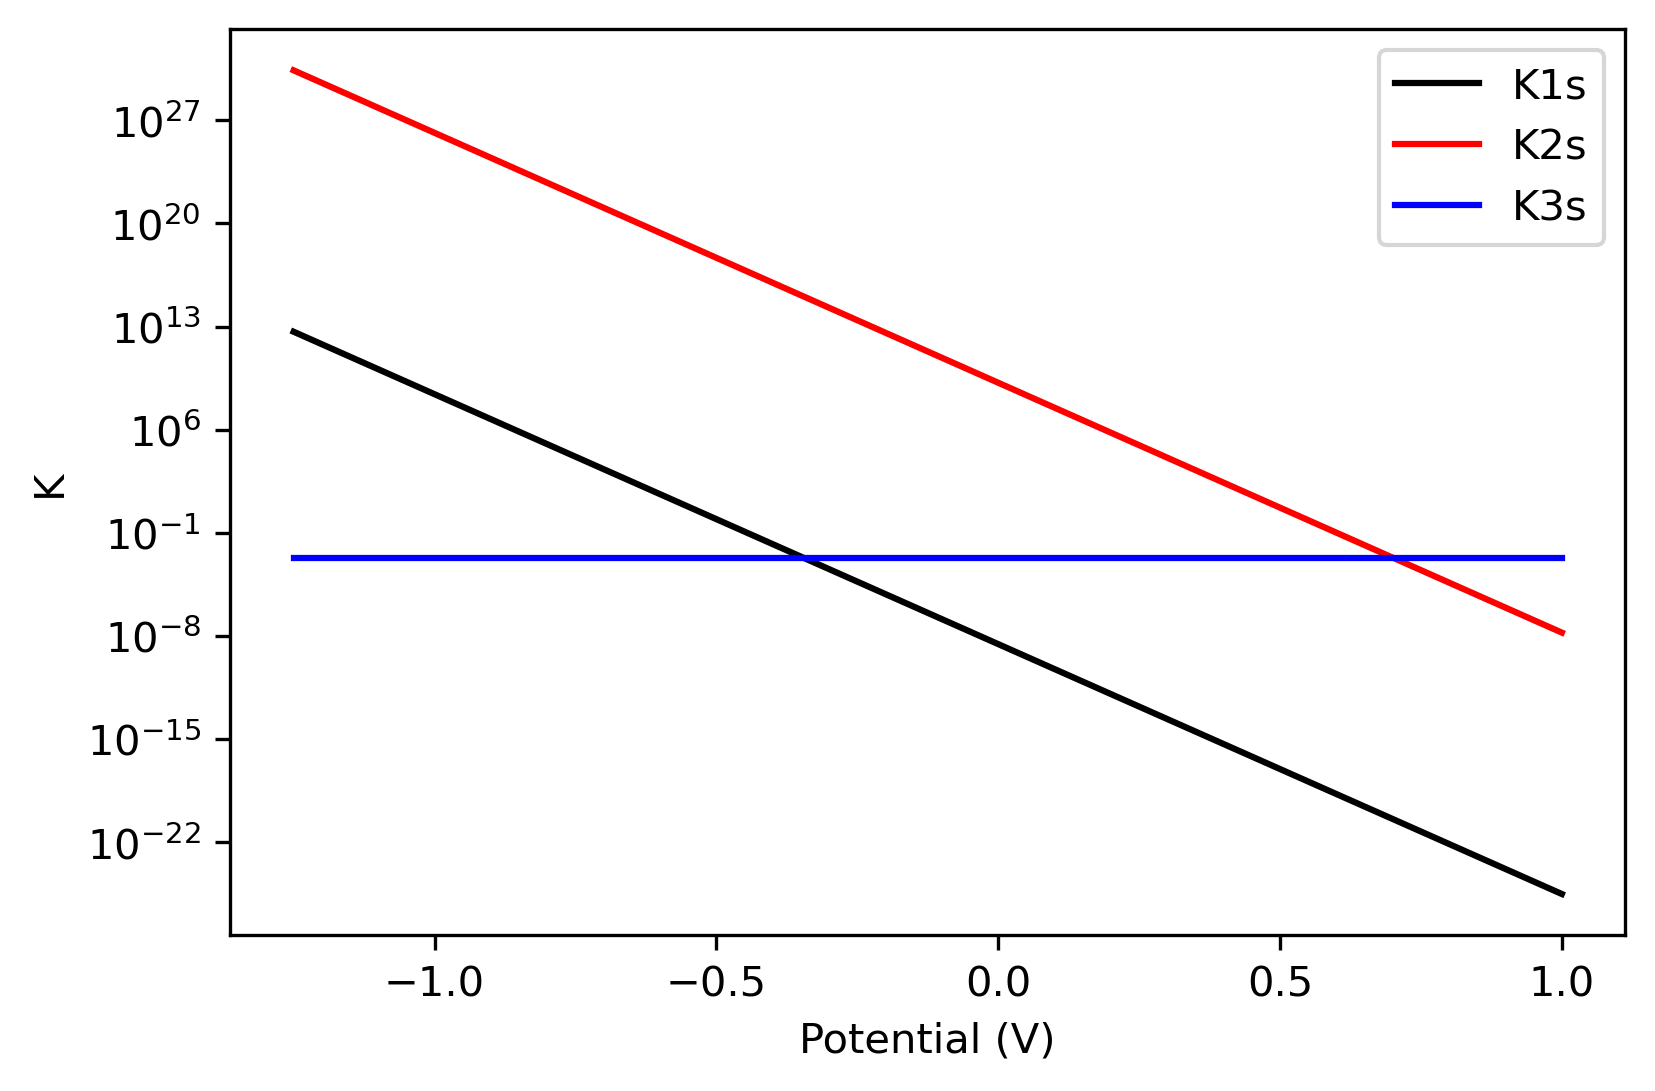

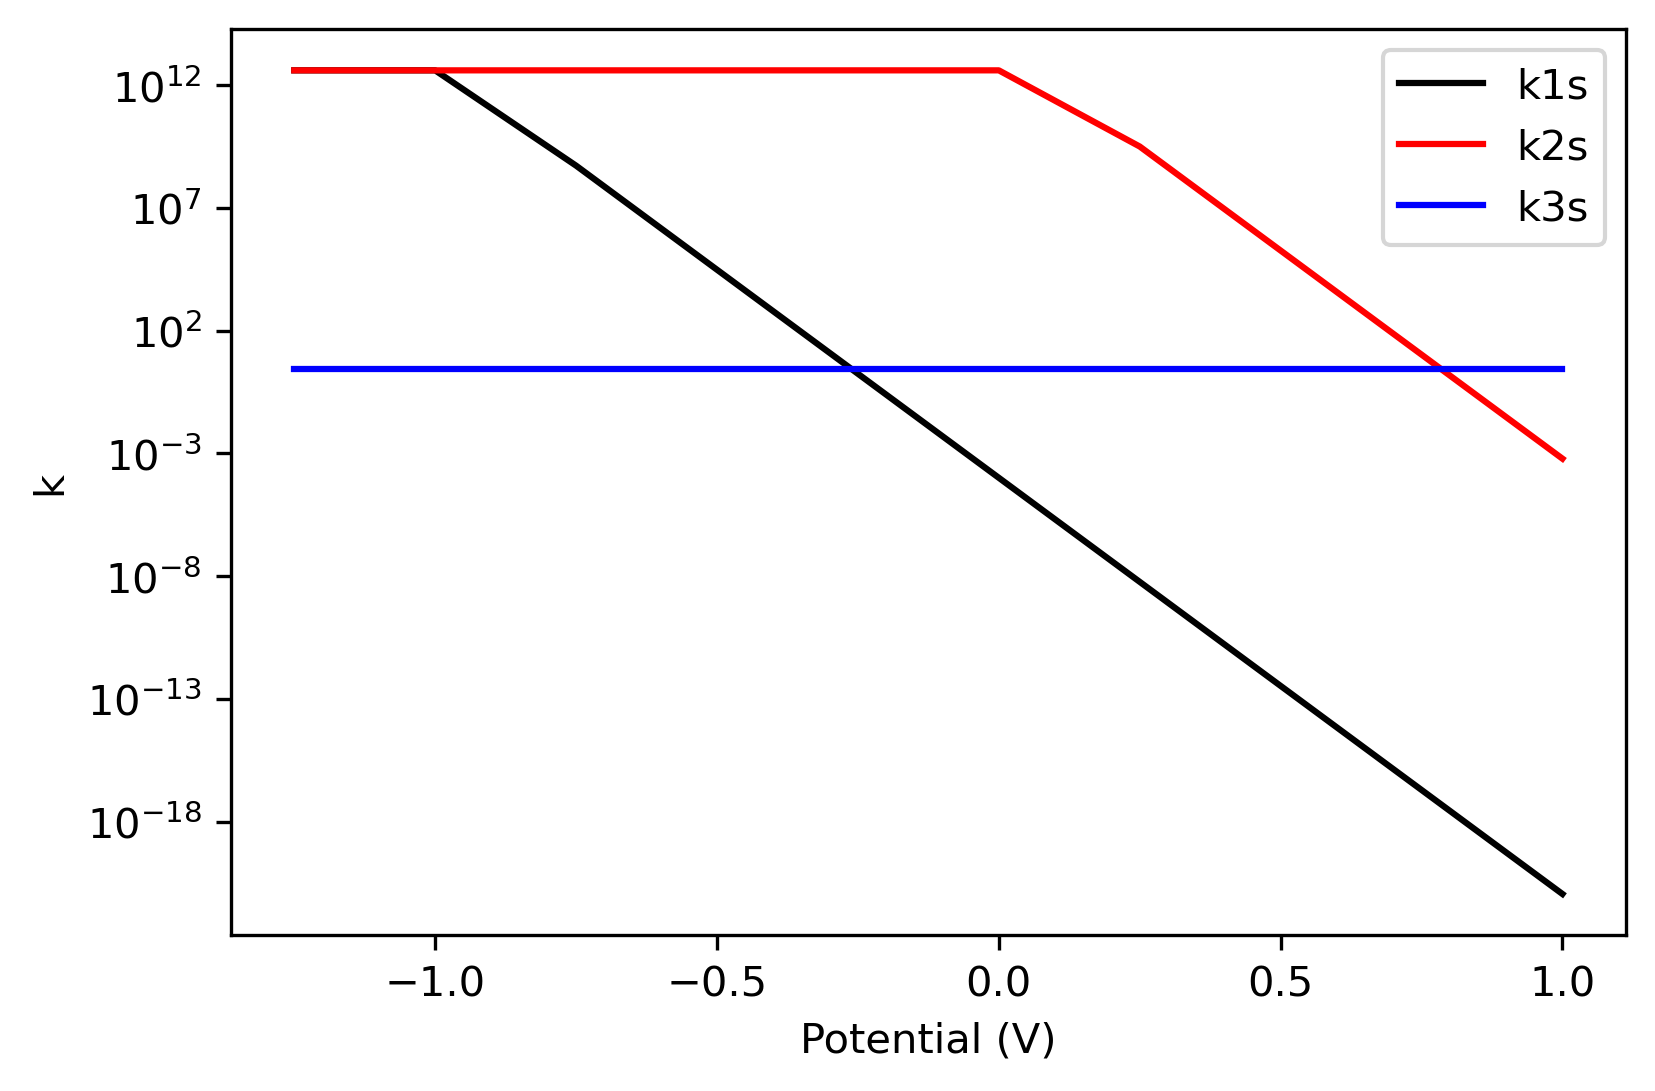

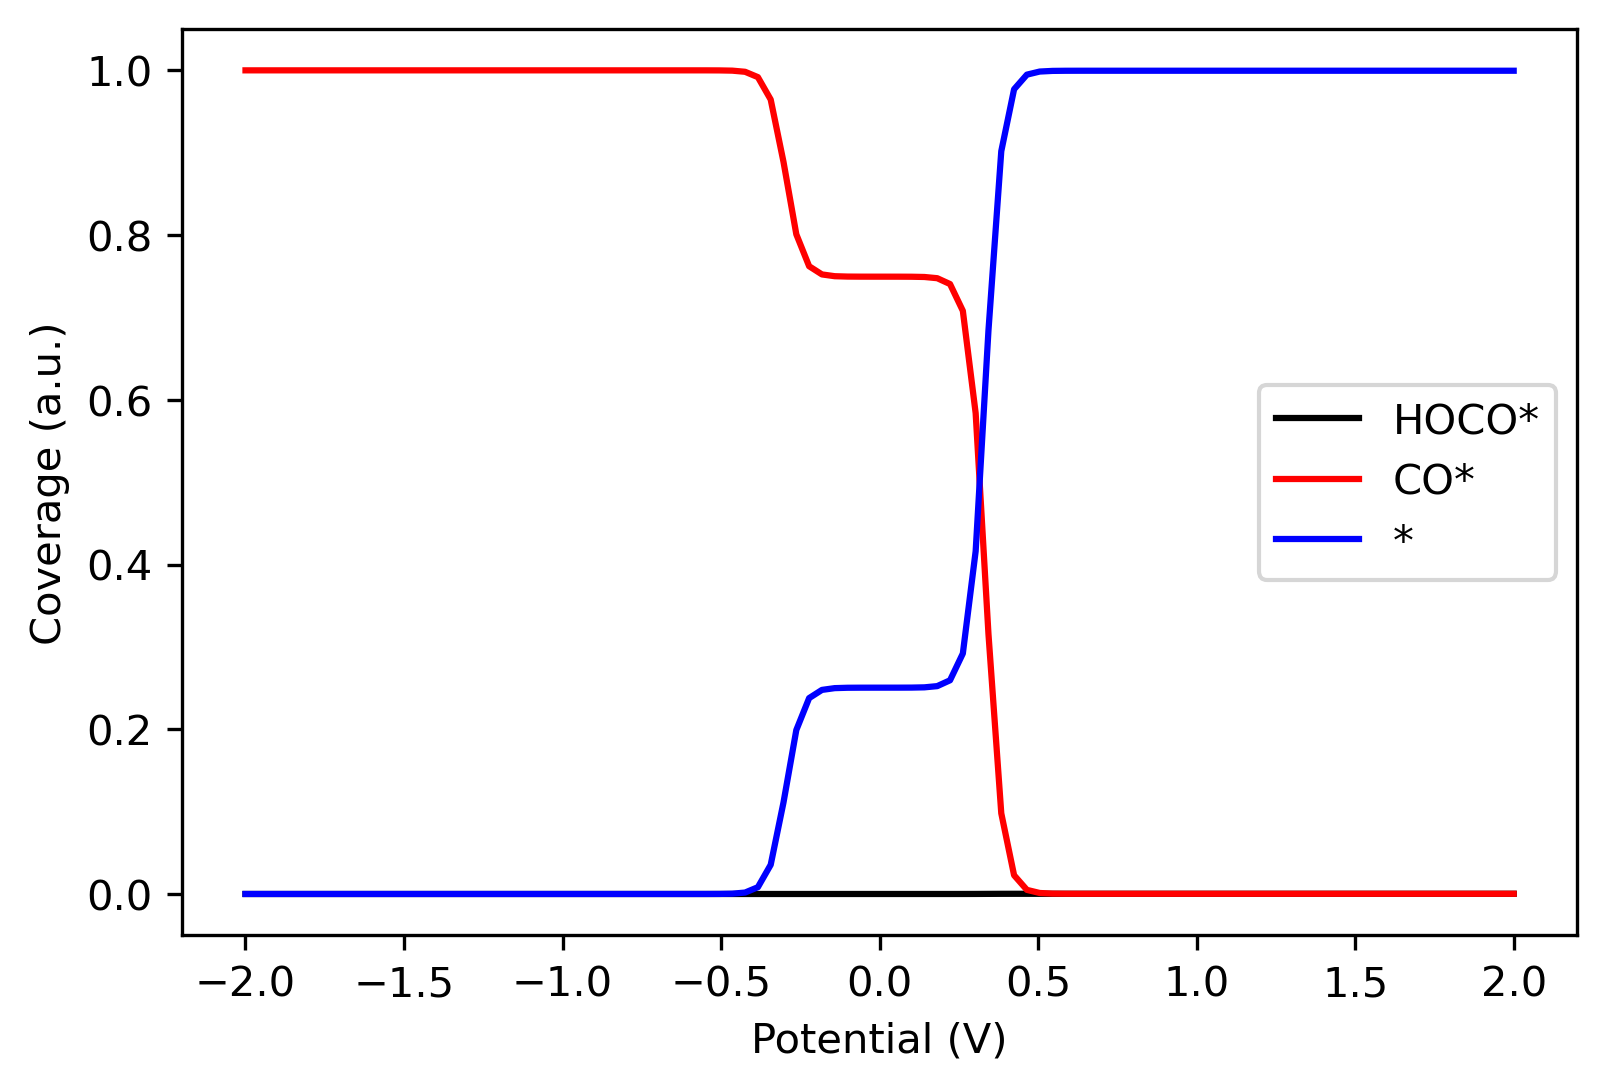

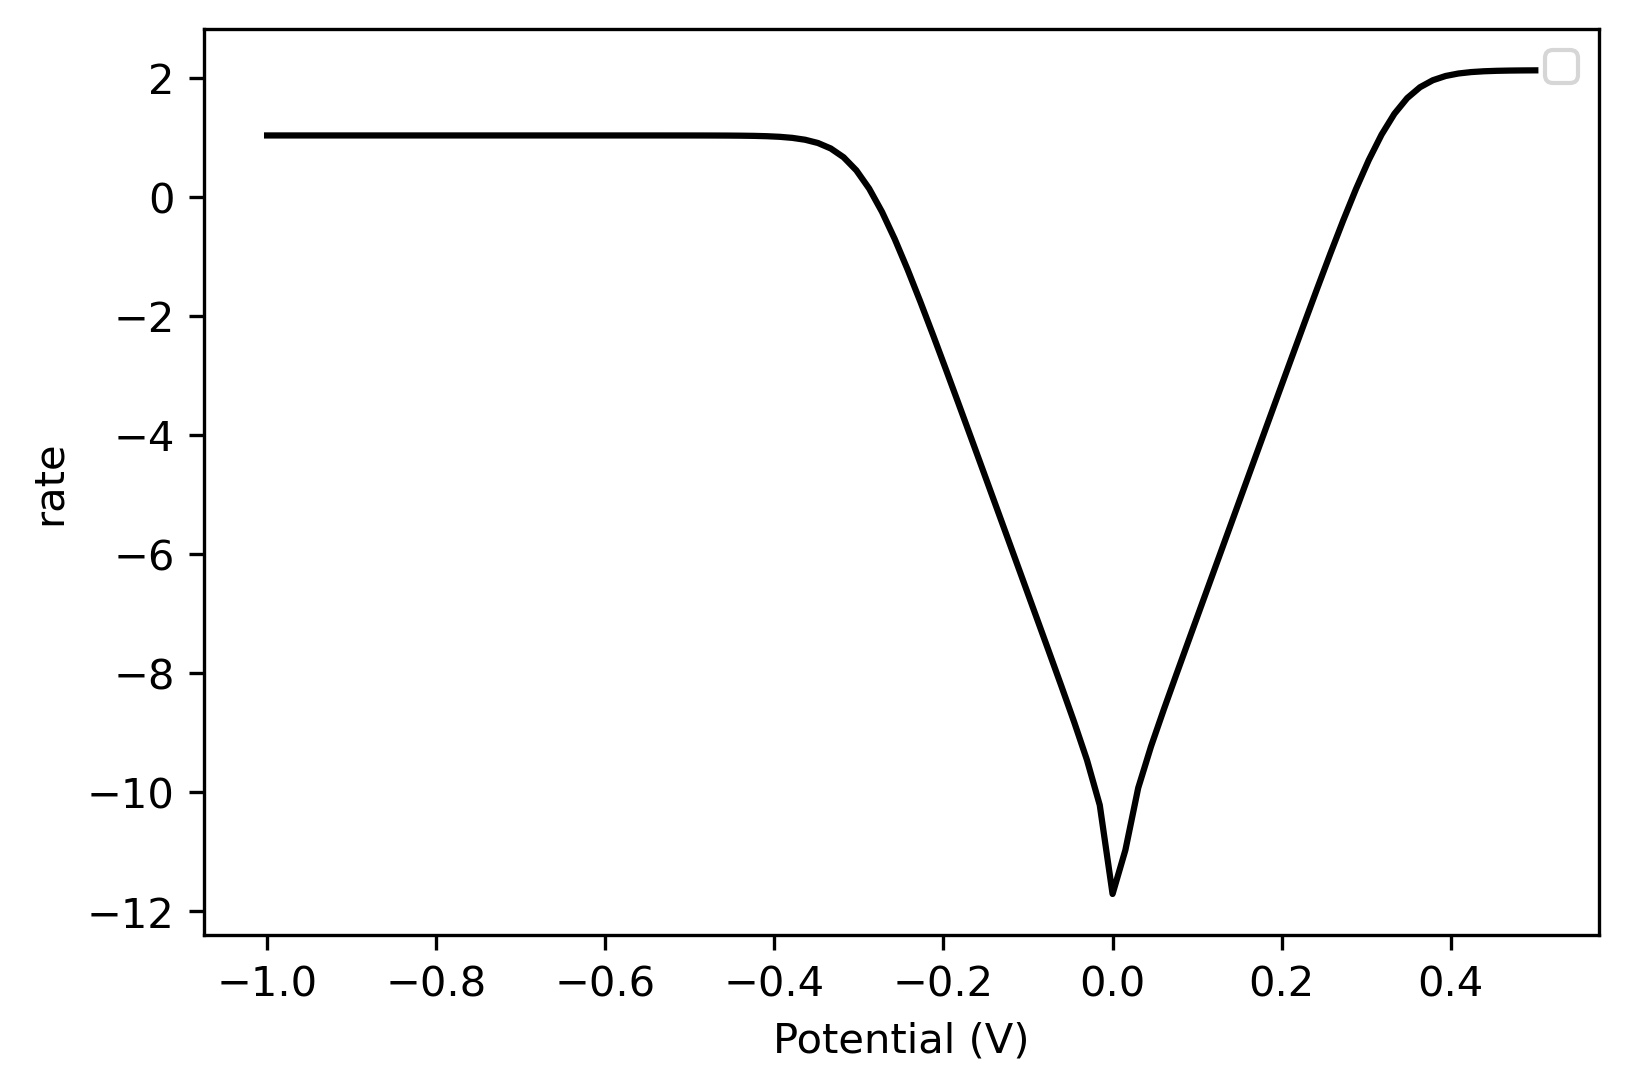

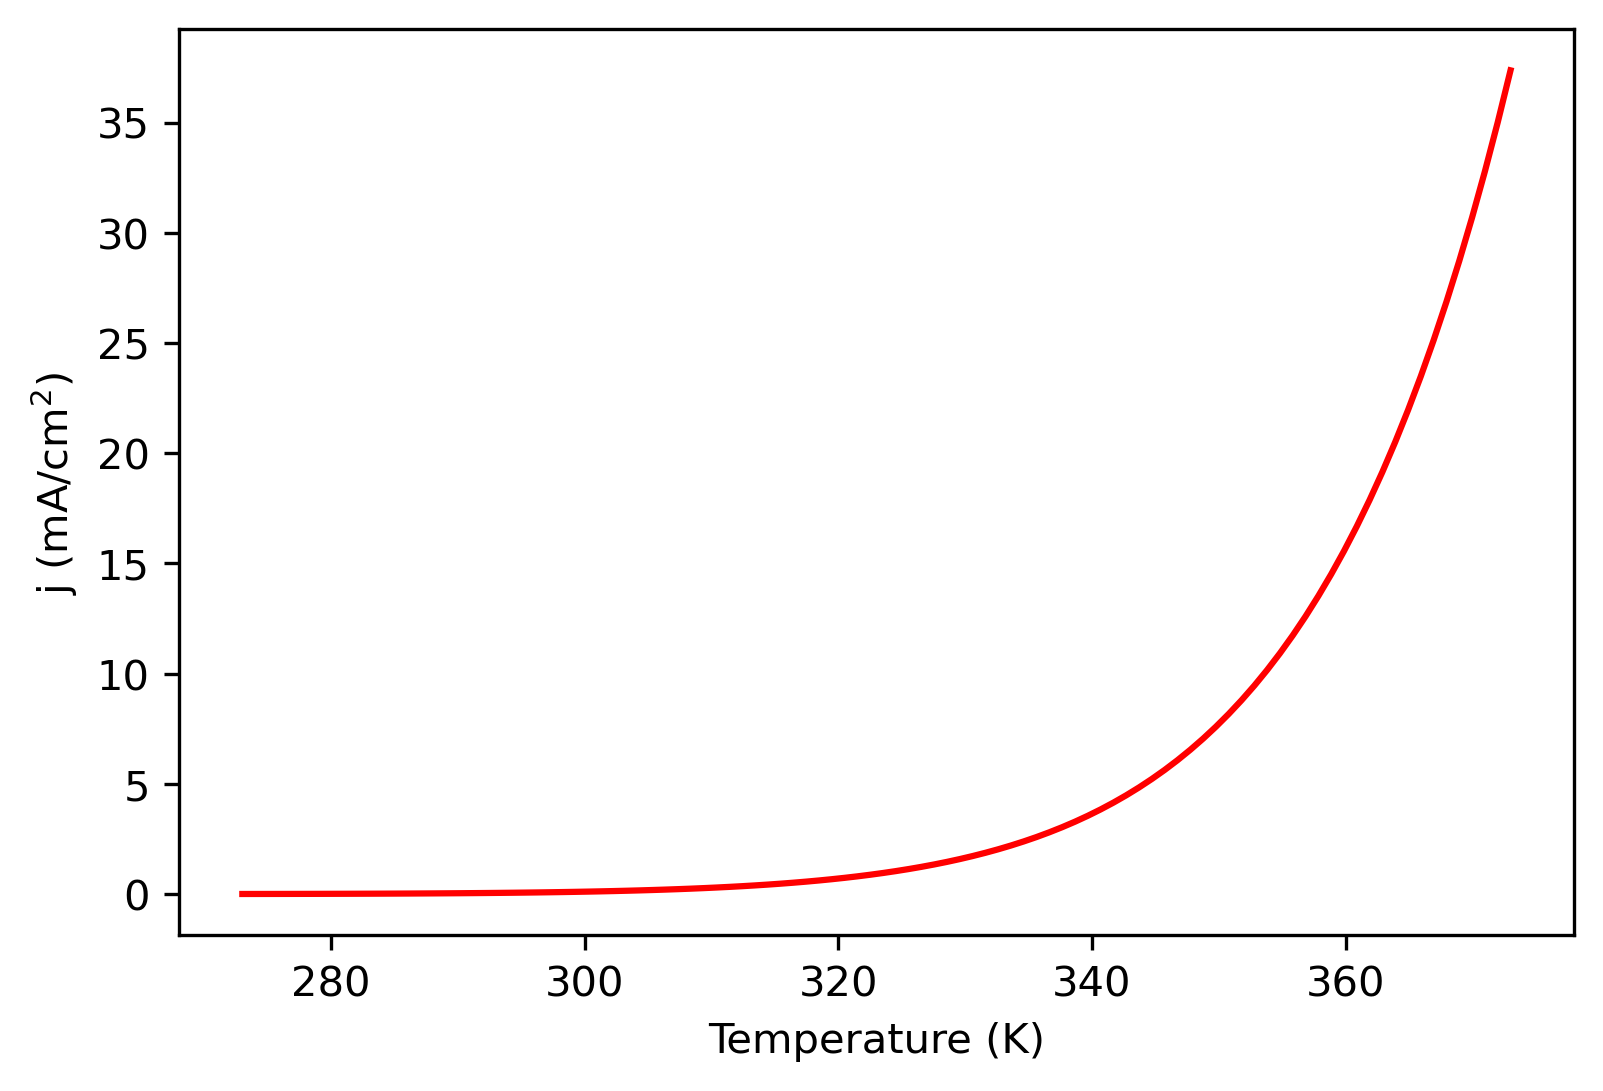

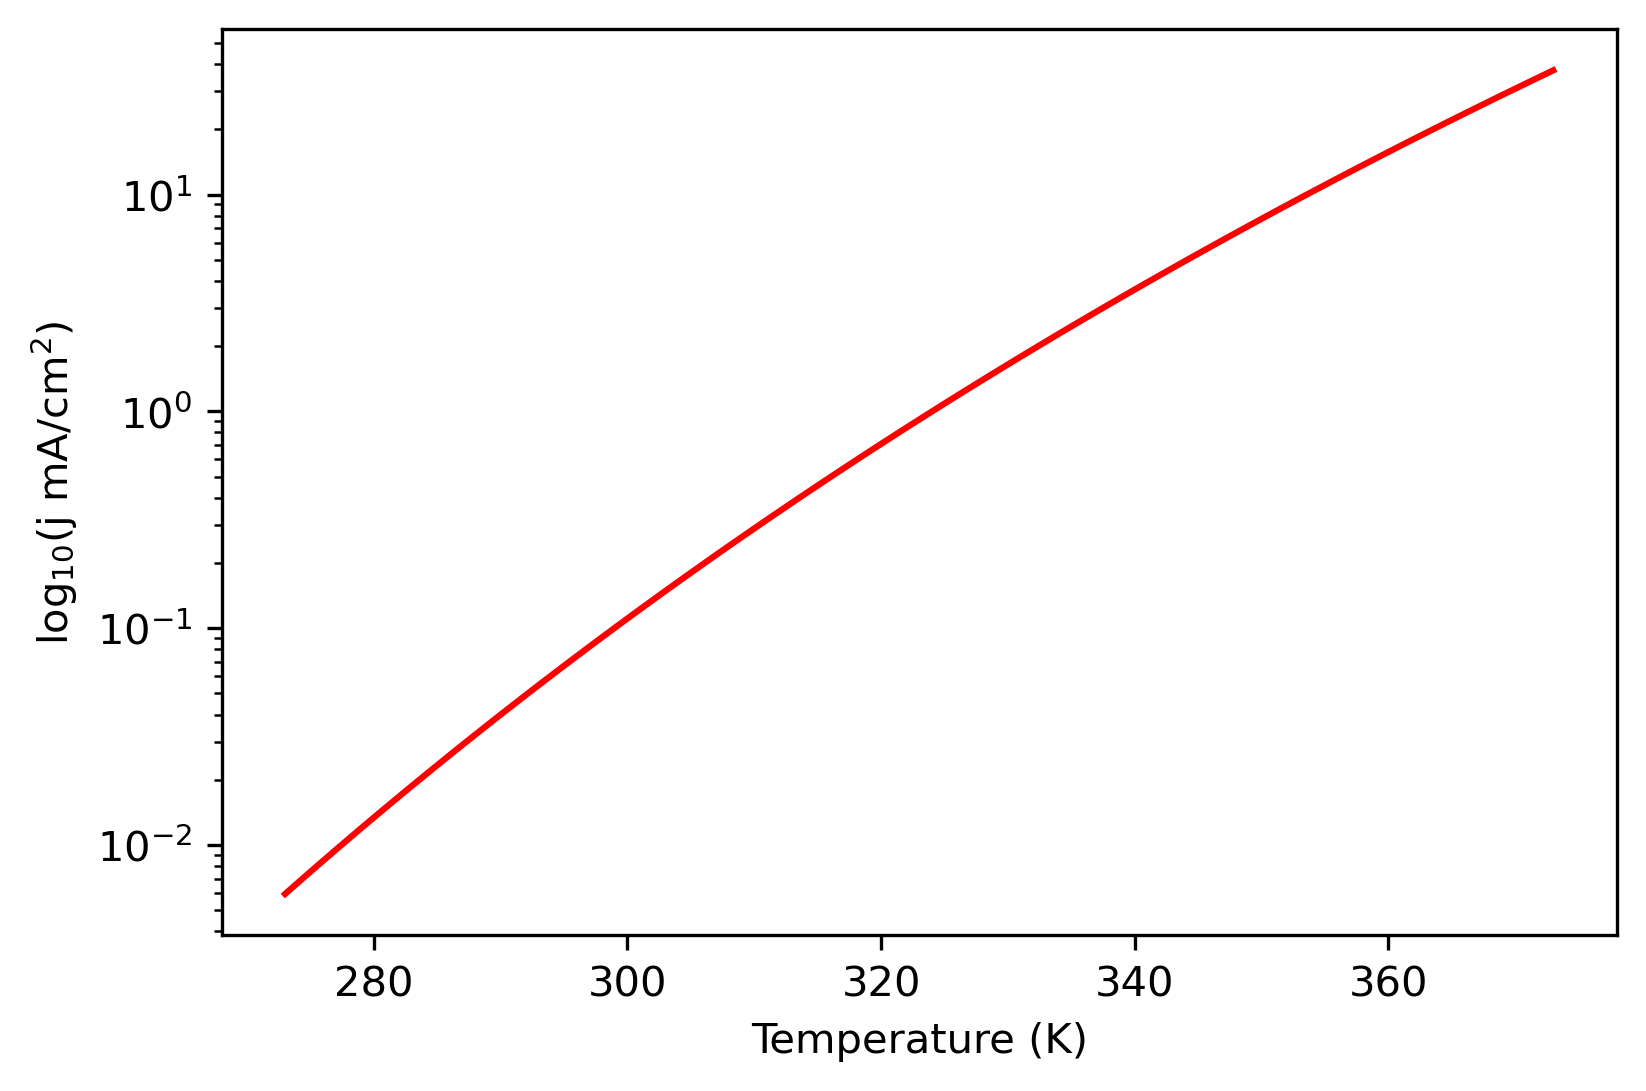

In [9]:
import numpy as np
from numpy import exp, log
from CO2toCO_acid import CO2toCO
import matplotlib.pyplot as plt

G_CO2g = -18.418 # eV
G_H2g = -7.096# eV
G_H2Og = -12.827 # eV
G_COg = -12.564 # eV

kB = 8.617e-5 # Boltzmann constant in eV/K
hplanck = 4.135669e-15 # eV s
T0 = 297.15
Gact0 = Gact1 = Gact2 =0.475# activative free energy
tc0 = tc1 = tc2 = 1  #transition state coefficency
A_act1 = np.exp( - Gact1 / ( kB * T0 ) ) # 
A_act2 = np.exp( - Gact2 / ( kB * T0 ) ) # electrochemical prefactor, fitting
G_1act_cap = -Gact1
G_2act_cap = -Gact2

A_prior = 3.6 * 10**4

nu_e = kB * T0 / hplanck
nu_c = 1.e13

cHp0 = 10.**(-0.)
UHER0 = URHE0 = kB * T0 * np.log(cHp0)   # introduced to shift the plotted potential window to the relevant range w

U0 = -0.3 # applied potential vs. she
U = U0 + UHER0

ddG_HOCO = 0.414 # correction from binding energy to free energy
ddG_CO = 0.579



def get_K1(E_HOCO, U, T=T0):
    """ K1 using HOCO binding
    """
    beta = 1. / (kB * T) 
    dG = E_HOCO + ddG_HOCO
    K1 = exp( - (dG + 1.0 * U ) * beta )
    return K1

def get_K2(E_HOCO, E_CO, U,  T=T0):
    """ K2 using HOCO and CO binding.
    """
    beta = 1. / (kB * T) 
    dG = E_CO + ddG_CO - E_HOCO - ddG_HOCO - G_CO2g - G_H2g + G_H2Og + G_COg
    K2 =  exp( - ( dG + 1.0 * U ) * beta ) 
    return K2

def get_K3(E_CO, U, T=T0):
    """ K3 asumming scaling.
    """
    beta = 1. / (kB * T) 
    dG = - (E_CO + ddG_CO)
    K3 = exp( - dG * beta )
    return K3


def get_k1(nu, E_HOCO, U, T=T0, tc=tc1):
    """ k1 using HOCO binding (vs CO2 and H2)
    """
    beta = 1. / (kB * T) 
    dG_rhe = E_HOCO + ddG_HOCO # vs. RHE
    Urev_rhe = -dG_rhe
    # dG_she = dG_rhe 
    # Urev_she = -dG_she + UHER0
    k1 = A_prior * exp( - max( ( U - Urev_rhe ) * tc, G_1act_cap) * beta ) 
    # k1 = nu * A_act1 * exp( - max( ( U - Urev_rhe ) * tc, G_1act_cap) * beta ) 
    
    #k1 = nu * A_act1 * exp( - min( ( U - dG_she ) * tc, 0) * beta ) 
    #dGw =  - kB * T * np.log(Kw)
    #dG = 0. * Gact0 + ddG_HOCO + E_HOCO + dGw
    #U0 = (1./tc - 1.) * dG - Gact0
    #k1 = nu * A_act1 * exp( - max( dG + ( U - U0 ) * tc, 0) * beta )
    return k1

def get_k2(nu, E_HOCO, E_CO, U, T=T0, tc=tc2):
    """ k2 using HOCO and CO energies.
    """    
    beta = 1. / (kB * T)  
    dG_rhe = E_CO + ddG_CO - E_HOCO - ddG_HOCO - G_CO2g - G_H2g + G_H2Og + G_COg
    Urev_rhe = -dG_rhe
    # dG_she = dG_rhe
    # Urev_she = - dG_she + URHE0
    k2 = A_prior * exp( - max(( U - Urev_rhe ) * tc, G_2act_cap) * beta ) 
    # k2 = nu * A_act2 * exp( - max(( U - Urev_rhe ) * tc, G_2act_cap) * beta ) 
    return k2

def get_k3(nu, E_CO, U, T=T0, tc=tc0):
    """ k3 assuming scaling.
    """
    beta = 1. / (kB * T) 
    dE = - E_CO
    dE = max(dE,0)
    k3 = nu * exp( - dE * beta )
    return k3


def get_rates(nu_e, nu_c, E_HOCO, E_CO, U, T=T0):
    """ Returns rate constants and equilibirum constants,
    """
    K1 = get_K1(E_HOCO, U, T=T)
    K2 = get_K2(E_HOCO, E_CO, U, T=T)
    K3 = get_K3(E_CO, U, T=T)
    k1 = get_k1(nu_e, E_HOCO, U, T=T)
    k2 = get_k2(nu_e, E_HOCO, E_CO, U, T=T)
    k3 = get_k3(nu_c, E_CO, U, T=T)
    return k1, K1, k2, K2, k3, K3

ECO_d = {
    "Pd": -0.36259556,
    # "Sc": -0.53887365,
    "Ti": -0.7954072,
    "V": -1.07970746,
    "Mn": -1.31038448,
    "Fe": -1.3575169,
    "Co": -0.90030351,
    "Ni": -0.49399452,
    "Cu": -0.25260203,
    # "Zn": -0.11389156,
    # "Y": -2.81622299,
    # "Zr": -0.10195565,
    "Nb": -0.94465297,
    "Mo": -0.76108613,
    "Ru": -1.20819791,
    "Rh": -0.6742065,
    "Ag": -0.09120301
}


EHOCO_d = {
    "Pd": 0.42967678,
    # "Sc": -0.08249209,
    "Ti": 0.09677125,
    "V": 0.08057561,
    "Mn": -0.28851255,
    "Fe": -0.15955723,
    "Co": 0.47024493,
    "Ni": 0.67499474,
    "Cu": 1.22119557,
    # "Zn": 0.54101516,
    # "Y": -2.76843569,
    # "Zr": -1.44950915,
    "Nb": 0.14885378,
    "Mo": 0.12097152,
    "Ru": 0.32770351,
    "Rh": 0.53514527,
    "Ag": 1.57118722
}


if __name__ == '__main__':
    pCO2 = 1.
    pCO =  0.005562
#     pCO =  1.
    xH2O = 1.
    cHp = cHp0 #1.
    
    # volcano plot
    if 0:
        # N = 20*4
        # M = 30*4
        N = 20*4
        M = 20*4
        R = np.empty([M,N])
        Thetas = np.empty([M,N,3])
        # E_HOCO_e = np.linspace(-0.8, 1.45, M)
        # E_CO_e = np.linspace(-2.2, 0.6, N)
        E_CO_e = np.linspace(-1.5, 1., N)
        E_HOCO_e = np.linspace(-1.2, 1.8, M)
        # EHOCOs = np.linspace(-1, 2, N)
        # ECOs = np.linspace(-2, 0, N)
    
        jmax = 10.0e3 # exptl current plateau's at 10 mA/cm2 
        jmin = 0.1
        for j, E_CO in enumerate(E_CO_e):
            for i, E_HOCO in enumerate(E_HOCO_e):
                k1, K1, k2, K2, k3, K3 = get_rates(nu_e, nu_c, E_HOCO, E_CO, U, T=T0)
                rm = CO2toCO(pCO2, pCO, xH2O, cHp, k1, K1, k2, K2, k3, K3)
                # rm = CO2toCO(pCO2, pCO, xH2O, cOHm, k1, K1, k2, K2, k3, K3, T0)
                thetas, rates = rm.solve()
                # print(rates)
                rate = min(jmax, rates[0])
                rate = max(jmin, rate)
                R[i,j] = np.log10(rate)
                Thetas[i,j,:] = thetas
    
        # data for the elements
        metals = ECO_d.keys()
    
        from matplotlib import rc
        rc('font', **{'family':'sans-serif','sans-serif':['Helvetica'], 'size':8})
        #rc('text', usetex=True)
        
        plt.figure(1, dpi=300)
        plt.clf()
        plt.subplots_adjust(left=.16, bottom=.16, right=.96, top=.90)
        # pl.hold(1)
        contours = np.linspace(np.log10(jmin), np.log10(jmax), 11) 
        plt.contourf(E_CO_e, E_HOCO_e, R, contours, cmap=plt.cm.jet)
        # E_HOCO_scaling = HOCO_CO_scaling(E_CO_e)
        # pl.plot(E_CO_e, E_HOCO_scaling,'-k', lw=1)
        # for i in range(len(ECO_d)): # elements
        #     pl.text(ECO_d[i], EHOCO_d[i], texts[i], 
        #             ha='center', va='center')
        for i,metal in enumerate(metals):
            plt.plot(ECO_d[metal], EHOCO_d[metal], 'o', color='black') 
            plt.text(ECO_d[metal], EHOCO_d[metal]+0.05, metal, fontsize=12, horizontalalignment='center', verticalalignment='bottom')
        
        #linear fiting and plot linear line
        m, b = np.polyfit(list(ECO_d.values()), list(EHOCO_d.values()), 1)
        # pl.plot(list(ECO_d.values()), m * np.array(list(ECO_d.values())) + b, linewidth=1, color='black')
        plt.axline((list(ECO_d.values())[0], list(ECO_d.values())[0]*m +b), slope=m, color='black')
        plt.xlim([E_CO_e[0]+0.1, E_CO_e[-1]-0.1])
        plt.ylim([E_HOCO_e[0]+0.1, E_HOCO_e[-1]-0.1])
        plt.colorbar(ticks=np.arange(min(contours), max(contours), 0.5))
        plt.title(r'log$_{10}$(j/$\mu$Acm$^{-2}$)')
        plt.xlabel(r'$E_{\mathrm{CO}}$ (eV)')
        plt.ylabel(r'$E_{\mathrm{HOCO}}$ (eV)')
        plt.savefig('../data/CO2toCO_rate_vs_HOCO_CO.png', dpi=300)
        plt.show()
    
    E_HOCO = 0.09
    E_CO = -0.74 # Ti for para.
#     E_HOCO = 0.43
#     E_CO = -0.36 # pure PdH
    
    if 1: # test K1, K2, K3 using Cu(211) as an example
        N = 10
        dG1 = []
        dG2 = []
        dG3 = []
        U = np.linspace(-1.25, 1, N)
        for i, u in enumerate(U):
            # print(i)
#             E_HOCO = 0.09
#             E_CO = -0.72 # Ti for para.
#             E_HOCO = 0.43
#             E_CO = -0.36 # pure PdH
            # U = -0.0
            K1 = get_K1(E_HOCO, u, T=T0)
            K2 = get_K2(E_HOCO, E_CO, u, T=T0)
            K3 = get_K3(E_CO, u, T=T0)
            # K1_s = get_K1(E_CO, U, T=T0)
            # K2_s = get_K2(E_CO, U, T=T0)
            # K3_s = get_K3(E_CO, U, T=T0)
            dG1.append(-kB*T0*np.log(K1))
            dG2.append(-kB*T0*np.log(K2))
            dG3.append(-kB*T0*np.log(K3))
            # dG1_s, dG2_s, dG3_s = -kB*T0*np.log(K1_s), -kB*T0*np.log(K2_s), -kB*T0*np.log(K3_s)
            # print(ddG_HOCO, ddG_CO)
            # print(dG1, dG1 + dG2, dG1 + dG2 + dG3)
            # print(dG1_s, dG1_s + dG2_s, dG1_s + dG2_s + dG3_s)
        plt.figure(-1, dpi=300)
        plt.plot(U, dG1, color='black', label='dG1')
        plt.plot(U, dG2, color='red', label='dG2')
        plt.plot(U, dG3, color='blue', label='dG3')
        plt.xlabel(r'Potential (V)')
        plt.ylabel(r'${\Delta}$G (eV)')
        plt.legend()
        
    if 1: # K and k as function of U
        N = 10
        K1s = []
        K2s = []
        K3s = []
        k1s = []
        k2s = []
        k3s = []
        U = np.linspace(-1.25, 1, N)
        for i, u in enumerate(U):
            K1 = get_K1(E_HOCO, u, T=T0)
            K2 = get_K2(E_HOCO, E_CO, u, T=T0)
            K3 = get_K3(E_CO, u, T=T0)
            k1 = get_k1(nu_e, E_HOCO, u, T=T0)
            k2 = get_k2(nu_e, E_HOCO, E_CO, u, T=T0)
            k3 = get_k3(nu_c, E_CO, u, T=T0)
            K1s.append(K1)
            K2s.append(K2)
            K3s.append(K3)
            k1s.append(k1)
            k2s.append(k2)
            k3s.append(k3)
        plt.figure(0, dpi=300)
        plt.semilogy(U, K1s, color='black', label='K1s')
        plt.semilogy(U, K2s, color='red', label='K2s')
        plt.semilogy(U, K3s, color='blue', label='K3s')
        plt.xlabel(r'Potential (V)')
        plt.ylabel(r'K')
        plt.legend()
        
        plt.figure(1, dpi=300)
        plt.semilogy(U, k1s, color='black', label='k1s')
        plt.semilogy(U, k2s, color='red', label='k2s')
        plt.semilogy(U, k3s, color='blue', label='k3s')
        plt.xlabel(r'Potential (V)')
        plt.ylabel(r'k')
        plt.legend()
    
    #coverage
    if 1:
        N = 100
        Thetas1 = []
        Thetas2 = []
        Thetas3 = []
        U = np.linspace(-2, 2, N)
        for i, u in enumerate(U):
#             print('===============================')
#             print(u)
#             E_HOCO = 0.09
#             E_CO = -0.72 # Ti for para.
#             E_HOCO = 0.43
#             E_CO = -0.36 # pure PdH
            # U = -0.0
            k1, K1, k2, K2, k3, K3 = get_rates(nu_e, nu_c, E_HOCO, E_CO, u, T=T0)
            rm = CO2toCO(pCO2, pCO, xH2O, cHp, k1, K1, k2, K2, k3, K3)
            # rm = CO2toCO(pCO2, pCO, xH2O, cOHm, k1, K1, k2, K2, k3, K3, T0)
            thetas, rates = rm.solve()
            # print(rates)
            # rate = min(jmax, rates[0])
            # rate = max(jmin, rate)
            # R[i,j] = np.log10(rate)
            # print(thetas)
            Thetas1.append(thetas[0])
            Thetas2.append(thetas[1])
            Thetas3.append(thetas[2])
            # dG1_s, dG2_s, dG3_s = -kB*T0*np.log(K1_s), -kB*T0*np.log(K2_s), -kB*T0*np.log(K3_s)
            # print(ddG_HOCO, ddG_CO)
            # print(dG1, dG1 + dG2, dG1 + dG2 + dG3)
            # print(dG1_s, dG1_s + dG2_s, dG1_s + dG2_s + dG3_s)
        plt.figure(2, dpi=300)
        plt.plot(U, Thetas1, color='black', label='HOCO*')
        plt.plot(U, Thetas2, color='red', label='CO*')
        plt.plot(U, Thetas3, color='blue', label='*')
        plt.xlabel(r'Potential (V)')
        plt.ylabel(r'Coverage (a.u.)')
        plt.legend()
    #rate vs. U
    if 1:
        N = 100
        R = []
        U = np.linspace(-1, 0.5, N)
        # jmax = 10.0e3 # exptl current plateau's at 10 mA/cm2 
        # jmin = 0.1
        for i, u in enumerate(U):
#             print('===============================')
#             print(u)
#             E_HOCO = 0.09
#             E_CO = -0.72 # Ti for para.
#             E_HOCO = 0.43
#             E_CO = -0.36 # pure PdH
            # U = -0.0
            k1, K1, k2, K2, k3, K3 = get_rates(nu_e, nu_c, E_HOCO, E_CO, u, T=T0)
            rm = CO2toCO(pCO2, pCO, xH2O, cHp, k1, K1, k2, K2, k3, K3)
            # rm = CO2toCO(pCO2, pCO, xH2O, cOHm, k1, K1, k2, K2, k3, K3, T0)
            thetas, rates = rm.solve()
            # print(rates)
            # rate = min(jmax, rates[0])
            # rate = max(jmin, rate)
            # R.append(np.log10(rates[0]))
            R.append(rates[0])
            # print(thetas)
            
            # dG1_s, dG2_s, dG3_s = -kB*T0*np.log(K1_s), -kB*T0*np.log(K2_s), -kB*T0*np.log(K3_s)
            # print(ddG_HOCO, ddG_CO)
            # print(dG1, dG1 + dG2, dG1 + dG2 + dG3)
            # print(dG1_s, dG1_s + dG2_s, dG1_s + dG2_s + dG3_s)
        plt.figure(3, dpi=300)
        plt.plot(U, np.log(np.abs(R)), color='black', label='')
        plt.xlabel(r'Potential (V)')
        plt.ylabel(r'rate')
        plt.legend()
        
    # jCO* vs. T
    def get_TOF(E_HOCO, E_CO, T):
        """ get turnover frequency
        """
        TOF = kB * T / hplanck * exp( E_CO / (kB * T)  )
        return TOF

    if 1:
        N = 100
        TOF = []
        temper = np.linspace(273, 373, N)
        for i, temp in enumerate(temper):
#             print('===============================')
#             print(temp)
#             E_HOCO = 0.09
#             E_CO = -0.72 # Ti for para.
#             E_HOCO = 0.43
#             E_CO = -0.36 # pure PdH
        
            TOF.append(get_TOF(E_HOCO, E_CO, temp)*47.96/1000)
        plt.figure(4, dpi=300)
        plt.plot(temper, TOF, color='red', label='CO*')
        plt.xlabel(r'Temperature (K)')
#         plt.ylabel(r'TOF (site$^{-1}$ s$^{-1})$')
        plt.ylabel(r'j (mA/cm$^{2})$')
        print(get_TOF(E_HOCO, E_CO, 350)*47.96/1000)
#         plt.legend()
#         plt.savefig('paper1/j_vs_T.png', dpi=300, bbox_inches='tight')
        
        plt.figure(5, dpi=300)
        plt.semilogy(temper, TOF, color='red', label='CO*')
        plt.xlabel(r'Temperature (K)')
#         plt.ylabel(r'log$_{10}$(TOF)')
        plt.ylabel(r'log$_{10}$(j mA/cm$^{2})$')
        plt.savefig('paper1/logj_vs_T.png', dpi=300, bbox_inches='tight')
#         plt.legend()

# Dissolve stability (dissolve one metal and H)

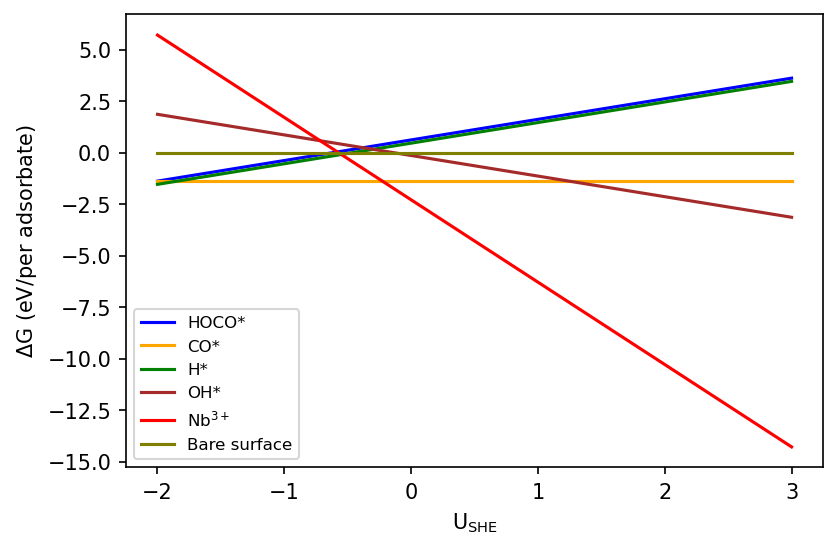

C:\Users\changai\AppData\Local\Temp/ipykernel_20328/21178315.py:325: RuntimeWarning: invalid value encountered in double_scalars
  x = pHs_acc[i]/count[i]
C:\Users\changai\AppData\Local\Temp/ipykernel_20328/21178315.py:326: RuntimeWarning: invalid value encountered in double_scalars
  y = Us_acc[i]/count[i]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


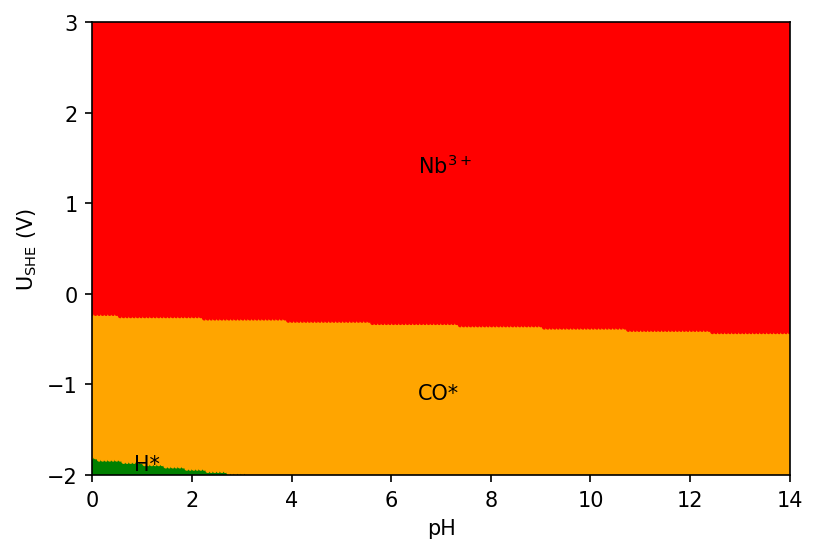

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


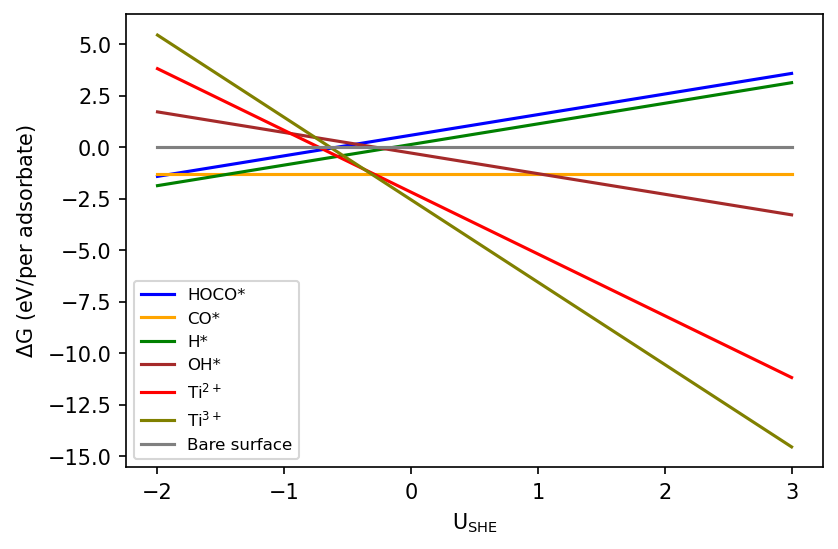

C:\Users\changai\AppData\Local\Temp/ipykernel_20328/21178315.py:325: RuntimeWarning: invalid value encountered in double_scalars
  x = pHs_acc[i]/count[i]
C:\Users\changai\AppData\Local\Temp/ipykernel_20328/21178315.py:326: RuntimeWarning: invalid value encountered in double_scalars
  y = Us_acc[i]/count[i]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


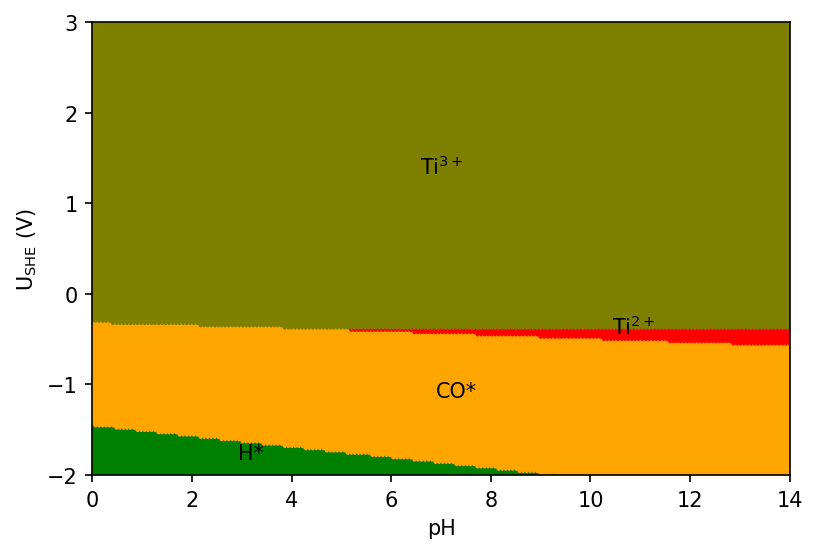

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


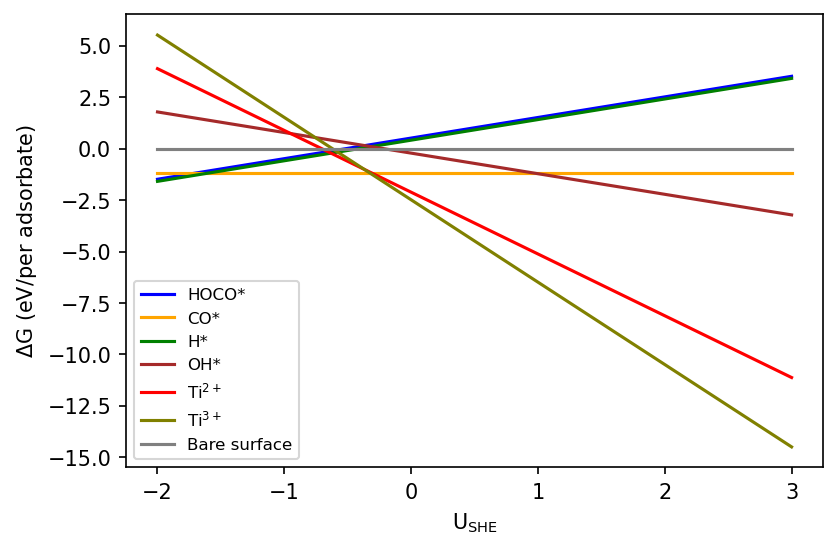

C:\Users\changai\AppData\Local\Temp/ipykernel_20328/21178315.py:325: RuntimeWarning: invalid value encountered in double_scalars
  x = pHs_acc[i]/count[i]
C:\Users\changai\AppData\Local\Temp/ipykernel_20328/21178315.py:326: RuntimeWarning: invalid value encountered in double_scalars
  y = Us_acc[i]/count[i]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


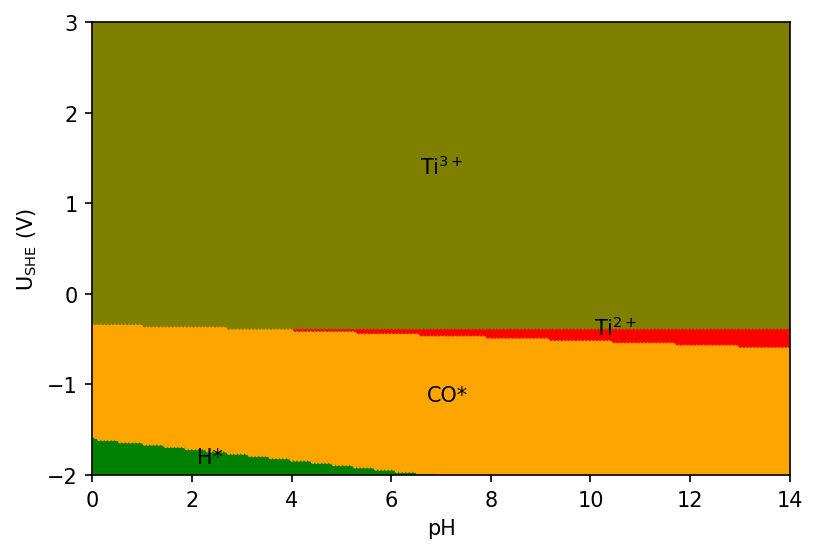

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


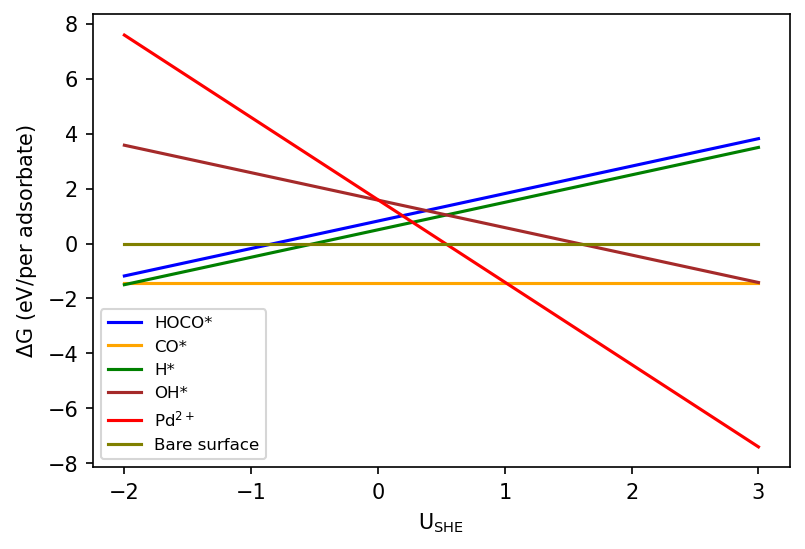

C:\Users\changai\AppData\Local\Temp/ipykernel_20328/21178315.py:325: RuntimeWarning: invalid value encountered in double_scalars
  x = pHs_acc[i]/count[i]
C:\Users\changai\AppData\Local\Temp/ipykernel_20328/21178315.py:326: RuntimeWarning: invalid value encountered in double_scalars
  y = Us_acc[i]/count[i]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


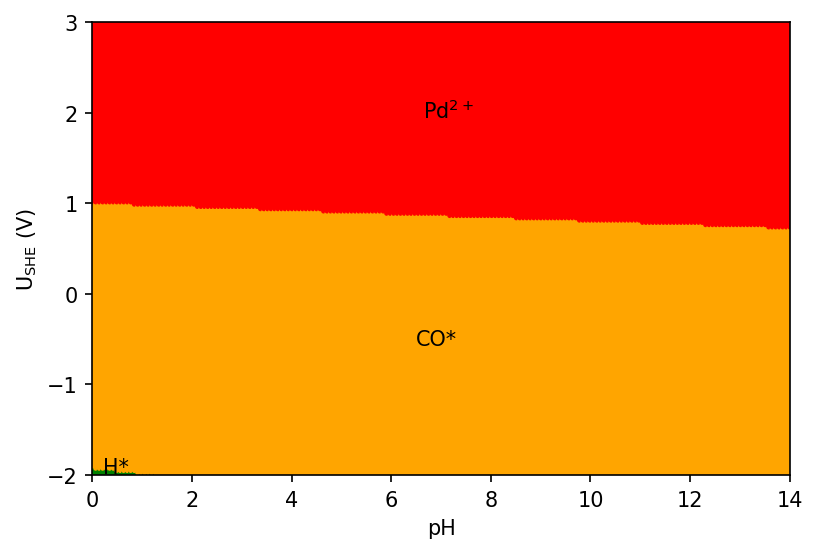

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


In [15]:
from pcat.lib.io import pd_read_excel
import numpy as np
import pcat.utils.constants as const
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.rcParams.update({'mathtext.default':  'regular', 'figure.dpi': 150})
# matplotlib.use('TkAgg')

def pourbaix_diagram(U, pH, system):
# def pourbaix_diagram(U, pH, Nb_overly=False, Ti_overly=False, Ti_paral=False, Pd_pure=False):
    """Get pourbaix diagram as a function of applied potential and pH value"""
    # df = pd_read_excel(filename=xls_name, sheet=sheet_name_dGs)
    # df = df.iloc[10]
    # surface = df['Surface']
    # dG1 = df['dG1']
    # dG2 = df['dG2']
    # dG3 = df['dG3']
    # dG4 = df['dG4']
    # dG5 = df['dG5']
    G_H2g = -7.096
    G_H2Og = -12.827 # eV
    
    E_Pd54H54 = -285.3708828 # pure PdH
    E_Pd53H54 = -282.78668443 # remove 1 Pd
    E_Pd53H53 = -279.36308240 # remove 1 Pd and 1 H
    
    E_Pd45Nb9H54 = -336.2919741 # Nb overlayer
    E_Pd45Nb8H54 = -327.95832335 # remove 1 Nb
    E_Pd45Nb8H53 = -323.66792350 # remove 1 Nb and 1 H
    E_Pd45H45 = -236.30774029 # remove first bilayer
    
    E_Pd45Ti9H54 = -330.0370939 # Ti overlayer
    E_Pd45Ti8H54 = -322.46471945 # remove 1 Ti
    E_Pd45Ti8H53 = -318.73737847 # remove 1 Ti and 1 H
    E_Pd45H45 = -236.30774029 # remove first bilayer
    
    E_Pd50Ti4H54 = -305.3263439 # Ti parallelogram
    E_Pd50Ti3H54 = -297.69180749 # remove 1 Ti
    E_Pd50Ti3H53 = -293.96607660 # remove 1 Ti and 1 H
    E_Pd50H50 = -262.23018405 # remove first bilayer
    
    E_Pd_bulk = -1.950920655
    E_Nb_bulk = -7.244883085
    E_Ti_bulk = -5.85829807
    G_Pd2plus = E_Pd_bulk + 2 * 0.951 + 0.0592 * np.log(10**(-6))
    G_Nb3plus = E_Nb_bulk + 3 * (-1.099) + 0.0592 * np.log(10**(-6))
    G_Nb_OH_4 = E_Nb_bulk + 4 * G_H2Og - 2 * G_H2g + 5*(-0.537) + 0.0592 * np.log(10**(-6))
    # G_Ti2plus = E_Ti_bulk + 2 * (-1.63) + 0.0592 * np.log(10**(-6))
    G_Ti2plus = E_Ti_bulk + 2 * (-1.628) + 0.0592 * np.log(10**(-6))
    # G_Ti3plus = E_Ti_bulk + 3 * (-1.26) + 0.0592 * np.log(10**(-6))
    G_Ti3plus = G_Ti2plus + (-0.369) + 0
    # G_Ti2plus = E_Ti_bulk + 2 * (-1.60) + 0.0592 * np.log(10**(-6))
    # G_Ti3plus = E_Ti_bulk + 3 * (-1.37) + 0.0592 * np.log(10**(-6))
    G_Ti_OH_2 = E_Ti_bulk + 2 * G_H2Og - G_H2g + 4*(-1) + 0.0592 * np.log(10**(-6))
    
    if system == 'Nb_overly':
        dG1 = 0.624
        dG2 = -0.725
        dG3 = -0.224
        dG4 = 0.467
        dG5 = -0.132
    elif system == 'Ti_overly':
        dG1 = 0.588
        dG2 = -0.720
        dG3 = -0.255
        dG4 = 0.138
        dG5 = -0.280
    elif system == 'Ti_paral':
        dG1 = 0.509
        dG2 = -0.674
        dG3 = -0.288
        dG4 = 0.407
        dG5 = -0.222
    elif system == 'Pd_pure':
        dG1 = 0.820
        dG2 = -0.603
        dG3 = 0.093
        dG4 = 0.501
        dG5 = 1.581
    
    kB = const.kB
    T = 297.15
    N, M = 200, 200
    # pH = 0
    U_model = np.linspace(min(U), max(U), N)
    if type(pH) == int or type(pH) == float:
        pH_model = [pH]
    else:
        pH_model = np.linspace(min(pH), max(pH), M)
    Us = []
    pHs = []
    Gb_HOCOs = []
    Gb_CO_ref_es = []
    Gb_COs = []
    Gb_Hs = []
    Gb_OHs = []
    G_Nb_overly_to_Pds = []
    G_rm_one_Ms = []
    G_rm_first_bilayer_Ms = []
    G_rm_one_M2s = []
    G_rm_first_bilayer_M2s = []
    G_rm_one_M3s = []
    G_rm_first_bilayer_M3s = []
    G_rm_one_M_OH_2s = []
    G_rm_one_M_OH_4s = []
    G_rm_one_M2_Hs = []
    G_rm_one_M3_Hs = []
    bare_PdHs = [] 
    colors = []
    Us_acc = np.zeros(20) # accumulate U in order to calculate average U
    pHs_acc = np.zeros(20)
    count = np.zeros(20)
    color_list = ['blue', 'orange', 'green', 'brown', 'red', 'olive', 'gray', 'yellow', 'purple', 'pink']
    for i, ph in enumerate(pH_model):
        for j, u in enumerate(U_model):
            bare_PdH = 0
            bare_PdHs.append(bare_PdH)
            
            Gb_HOCO = dG1 + u + kB * T * ph * np.log(10)
            Gb_HOCOs.append(Gb_HOCO)
            
            Gb_CO_ref_e = dG2 - dG1
            Gb_CO = -dG3
            # Gb_COs.append(Gb_CO) # or Gb_CO_ref_e
            Gb_COs.append(Gb_CO_ref_e)
            
            Gb_H = dG4 + u + kB * T * ph * np.log(10)
            Gb_Hs.append(Gb_H)
            
            Gb_OH = dG5 - u - kB * T * ph * np.log(10)
            Gb_OHs.append(Gb_OH)
            
            
            if system == 'Nb_overly':
                # G_Nb_overly_to_Pd = (E_Pd54H54 - 9*G_Pd2plus + 9*G_Nb3plus - 9*u - E_Pd45Nb9H54) / 9.0 # replace Nb overlayer to Pd overlayer
                # G_Nb_overly_to_Pds.append(G_Nb_overly_to_Pd)
                
                # only remove one Nb to be Nb3+ on Pd45Nb9H54 surface
                G_rm_one_M3 = E_Pd45Nb8H54 + G_Nb3plus - 3*u - E_Pd45Nb9H54
                G_rm_one_M3s.append(G_rm_one_M3)
                
                G_rm_one_M3_H = E_Pd45Nb8H53 + G_Nb3plus + 0.5*G_H2g - 4*u - kB * T * ph * np.log(10) - E_Pd45Nb9H54 
                G_rm_one_M3_Hs.append(G_rm_one_M3_H)
                
                # remove first bilayer including overlayer Nb and H
                G_rm_first_bilayer_M3 = (E_Pd45H45 + 9*G_Nb3plus - 36*u + 9*0.5*G_H2g - E_Pd45Nb9H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                G_rm_first_bilayer_M3s.append(G_rm_first_bilayer_M3)
                # G_rm_first_bilayer_M = (E_Pd45H45 + 9*G_Pd2plus - 27*u + 9*0.5*G_H2g - E_Pd54H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                
                G_rm_one_M_OH_4 = E_Pd45Nb8H54 + G_Nb_OH_4 + 2*G_H2g - 5 * u - 4 * G_H2Og - E_Pd45Nb9H54
                G_rm_one_M_OH_4s.append(G_rm_one_M_OH_4)
                
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_first_bilayer_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M3_H, bare_PdH]
                G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_one_M3_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M3_H, G_rm_one_M_OH_4, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M3, G_rm_one_M3_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M_OH_4, bare_PdH]
            
            elif system == 'Ti_overly':
                # remove only one Ti to be Ti2+
                G_rm_one_M2 = E_Pd45Ti8H54 + G_Ti2plus - 2*u - E_Pd45Ti9H54
                G_rm_one_M2s.append(G_rm_one_M2)
                # remove only one Ti to Ti3+
                G_rm_one_M3 = E_Pd45Ti8H54 + G_Ti3plus - 3*u - E_Pd45Ti9H54
                G_rm_one_M3s.append(G_rm_one_M3)
                
                G_rm_one_M2_H = E_Pd45Ti8H53 + G_Ti2plus + 0.5*G_H2g - 3*u - kB * T * ph * np.log(10) - E_Pd45Ti9H54 
                G_rm_one_M2_Hs.append(G_rm_one_M2_H)
                
                G_rm_one_M3_H = E_Pd45Ti8H53 + G_Ti3plus + 0.5*G_H2g - 4*u - kB * T * ph * np.log(10) - E_Pd45Ti9H54 
                G_rm_one_M3_Hs.append(G_rm_one_M3_H)
                
                # remove first bilayer to Ti2+ including overlayer Ti and H
                G_rm_first_bilayer_M2 = (E_Pd45H45 + 9*G_Ti2plus - 27*u + 9*0.5*G_H2g - E_Pd45Ti9H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                G_rm_first_bilayer_M2s.append(G_rm_first_bilayer_M2)
                # remove first bilayer to Ti3+ including overlayer Ti and H
                G_rm_first_bilayer_M3 = (E_Pd45H45 + 9*G_Ti3plus - 36*u + 9*0.5*G_H2g - E_Pd45Ti9H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                G_rm_first_bilayer_M3s.append(G_rm_first_bilayer_M3)
                
                # G_Ti_OH_2 = 2*G_H2Og + E_Ti_bulk - G_H2g + 2* (-1) 
                G_rm_one_M_OH_2 = E_Pd45Ti8H54 + G_Ti_OH_2 + G_H2g - 4*u - 2*G_H2Og - E_Pd45Ti9H54 - 2 * kB * T * ph * np.log(10)
                G_rm_one_M_OH_2s.append(G_rm_one_M_OH_2)
                
                # G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_one_M2_H, bare_PdH]
                G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_one_M2_H, G_rm_one_M3_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2_H, G_rm_one_M3_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2, G_rm_one_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M_OH_2, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2_H, bare_PdH]
            
            elif system == 'Ti_paral':
                # remove only one Ti to be Ti2+
                G_rm_one_M2 = E_Pd50Ti3H54 + G_Ti2plus - 2*u - E_Pd50Ti4H54
                G_rm_one_M2s.append(G_rm_one_M2)
                # remove only one Ti to Ti3+
                G_rm_one_M3 = E_Pd50Ti3H54 + G_Ti3plus - 3*u - E_Pd50Ti4H54
                G_rm_one_M3s.append(G_rm_one_M3)
                
                G_rm_one_M2_H = E_Pd50Ti3H53 + G_Ti2plus + 0.5*G_H2g - 3*u - kB * T * ph * np.log(10) - E_Pd50Ti4H54 
                G_rm_one_M2_Hs.append(G_rm_one_M2_H)
                
                G_rm_one_M3_H = E_Pd50Ti3H53 + G_Ti3plus + 0.5*G_H2g - 4*u - kB * T * ph * np.log(10) - E_Pd50Ti4H54 
                G_rm_one_M3_Hs.append(G_rm_one_M3_H)
                
                # remove first bilayer to Ti2+ including overlayer Ti and H
                G_rm_first_bilayer_M2 = (E_Pd50H50 + 4*G_Ti2plus - 12*u + 4*0.5*G_H2g - E_Pd50Ti4H54 - 4 * kB * T * ph * np.log(10))/ 4.0
                G_rm_first_bilayer_M2s.append(G_rm_first_bilayer_M2)
                # remove first bilayer to Ti3+ including overlayer Ti and H
                G_rm_first_bilayer_M3 = (E_Pd50H50 + 4*G_Ti3plus - 16*u + 4*0.5*G_H2g - E_Pd50Ti4H54 - 4 * kB * T * ph * np.log(10))/ 4.0
                G_rm_first_bilayer_M3s.append(G_rm_first_bilayer_M3)
                
                G_rm_one_M_OH_2 = E_Pd50Ti3H53 + G_Ti_OH_2 + G_H2g - 4*u - 2*G_H2Og - E_Pd50Ti4H54 - 2 * kB * T * ph * np.log(10)
                G_rm_one_M_OH_2s.append(G_rm_one_M_OH_2)
                
                G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_one_M2_H, G_rm_one_M3_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2_H, G_rm_one_M3_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2, G_rm_one_M3, bare_PdH]
            
            elif system == 'Pd_pure':
                # only remove one Nb to be Pd2+ on E_Pd54H54 surface
                G_rm_one_M2 = E_Pd53H54 + G_Pd2plus - 2*u - E_Pd54H54
                G_rm_one_M2s.append(G_rm_one_M2)
                
                G_rm_one_M2_H = E_Pd53H53 + G_Pd2plus + 0.5*G_H2g  - 3*u - kB * T * ph * np.log(10) - E_Pd54H54
                G_rm_one_M2_Hs.append(G_rm_one_M2_H)
    
                # remove first bilayer Pd2+ including overlayer Pd and H
                G_rm_first_bilayer_M2 = (E_Pd45H45 + 9*G_Pd2plus - 27*u + 9*0.5*G_H2g - E_Pd54H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                G_rm_first_bilayer_M2s.append(G_rm_first_bilayer_M2)
                # G_rm_first_bilayer_M = (E_Pd45H45 + 9*G_Pd2plus - 27*u + 9*0.5*G_H2g - E_Pd54H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                
                G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_one_M2_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2, bare_PdH]
                
                
            # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_first_bilayer_M, bare_PdH]
            # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M, bare_PdH]
            # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_first_bilayer_M2s, G_rm_first_bilayer_M3s, bare_PdH]
            min_dot = min(G_values)
            for i, G_value in enumerate(G_values):
                if min_dot == G_value:
                    color = color_list[i]
                    Us_acc[i] += u
                    pHs_acc[i] += ph
                    count[i] += 1
            Us.append(u)
            pHs.append(ph)
            colors.append(color)
            
    if system == 'Nb_overly':
        tuples = {'HOCO*': Gb_HOCOs,
                  # 'Gb_CO_ref_es': Gb_CO_ref_es,
                  'CO*': Gb_COs,
                  'H*': Gb_Hs,
                  'OH*': Gb_OHs,
                  # 'G_rm_one_M2': G_rm_one_M2s,
                   # 'G_rm_one_M3': G_rm_one_M3s,
                   # 'G_rm_first_bilayer_M3': G_rm_first_bilayer_M3s,
                    # 'G_rm_one_M_OH_4': G_rm_one_M_OH_4s,
                  'Nb$^{3+}$': G_rm_one_M3_Hs,
                  'Bare surface': bare_PdHs
                  }
    elif system == 'Ti_overly':
        tuples = {'HOCO*': Gb_HOCOs,
                  # 'Gb_CO_ref_es': Gb_CO_ref_es,
                  'CO*': Gb_COs,
                  'H*': Gb_Hs,
                  'OH*': Gb_OHs,
                   # 'G_rm_one_M2': G_rm_one_M2s,
                   # 'G_rm_one_M3': G_rm_one_M3s,
                  # 'G_rm_first_bilayer_M2': G_rm_first_bilayer_M2s,
                  # 'G_rm_first_bilayer_M3': G_rm_first_bilayer_M3s,
                   # 'G_rm_one_M_OH_2': G_rm_one_M_OH_2s,
                   'Ti$^{2+}$': G_rm_one_M2_Hs,
                   'Ti$^{3+}$': G_rm_one_M3_Hs,
                  'Bare surface': bare_PdHs
                  }
    elif system == 'Ti_paral':
        tuples = {'HOCO*': Gb_HOCOs,
                  # 'Gb_CO_ref_es': Gb_CO_ref_es,
                  'CO*': Gb_COs,
                  'H*': Gb_Hs,
                  'OH*': Gb_OHs,
                  # 'G_rm_one_M2': G_rm_one_M2s,
                  # 'G_rm_one_M3': G_rm_one_M3s,
                  # 'G_rm_first_bilayer_M2': G_rm_first_bilayer_M2s,
                  # 'G_rm_first_bilayer_M3': G_rm_first_bilayer_M3s,
                   'Ti$^{2+}$': G_rm_one_M2_Hs,
                   'Ti$^{3+}$': G_rm_one_M3_Hs,
                  'Bare surface': bare_PdHs
                  }
    elif system == 'Pd_pure':
        tuples = {'HOCO*': Gb_HOCOs,
                  # 'Gb_CO_ref_es': Gb_CO_ref_es,
                  'CO*': Gb_COs,
                  'H*': Gb_Hs,
                  'OH*': Gb_OHs,
                  'Pd$^{2+}$': G_rm_one_M2_Hs,
                  # 'G_rm_one_M2': G_rm_one_M2s,
                   # 'G_rm_one_M3': G_rm_one_M3s,
                    # 'G_rm_first_bilayer_M2': G_rm_first_bilayer_M2s,
                   # 'G_rm_first_bilayer_M3': G_rm_first_bilayer_M3s,
                   # 'G_rm_one_M2': G_rm_one_M2s,
                  'Bare surface': bare_PdHs
                  }
    df = pd.DataFrame(tuples)
    if type(pH) == int or type(pH) == float:
        # plot linear
        for i, column in enumerate(df.columns):
            plt.plot(Us, df[column].values, label=column, color=color_list[i])
        plt.xlabel('$U_{SHE}$')
        plt.ylabel('$\Delta G$ (eV/per adsorbate)')
        plt.legend(fontsize=8)
        # plt.show()
    else:
        # plot 2D
        plt.scatter(pHs, Us, c=colors, marker='o', zorder=2, s=2)
        plt.xlabel('pH')
        plt.ylabel('$U_{SHE}$ (V)')
        for i, txt in enumerate(df.columns):
            x = pHs_acc[i]/count[i]
            y = Us_acc[i]/count[i] 
            plt.text(x, y, txt, horizontalalignment='center')

        
if __name__ == '__main__':
    
    system_name = 'collect_vasp_PdHy_v3'
    
    xls_name = f'../data/{system_name}.xlsx'
    fig_dir = './Pourbaix/'
    
    sheet_name_dGs = 'dGs'

    for system in ['Nb_overly', 'Ti_overly', 'Ti_paral', 'Pd_pure']:
        U = [-2, 3]
        pH = 0
        fig = plt.figure()
        pourbaix_diagram(U, pH, system)
#         if system == 'Nb_overly':
#             plt.title('Nb doping for overlayer')
#         elif system == 'Ti_overly':
#             plt.title('Ti doping for overlayer')
#         elif system == 'Ti_paral':
#             plt.title('Ti doping for parallelogram')
#         elif system == 'Pd_pure':
#             plt.title('Pure PdH (111)')
        plt.show()
        fig.savefig(fig_dir + system + '_U.png', dpi=300, bbox_inches='tight')
        
        
        pH = [0, 14]
        fig = plt.figure()
        pourbaix_diagram(U, pH, system)
#         if system == 'Nb_overly':
#             plt.title('Nb doping for overlayer')
#         elif system == 'Ti_overly':
#             plt.title('Ti doping for overlayer')
#         elif system == 'Ti_paral':
#             plt.title('Ti doping for parallelogram')
#         elif system == 'Pd_pure':
#             plt.title('Pure PdH (111)')
        plt.margins(0.0)
        plt.show()
        fig.savefig(fig_dir + system + '_pH_U.png', dpi=300, bbox_inches='tight')

# Dissolve all doped metal atoms

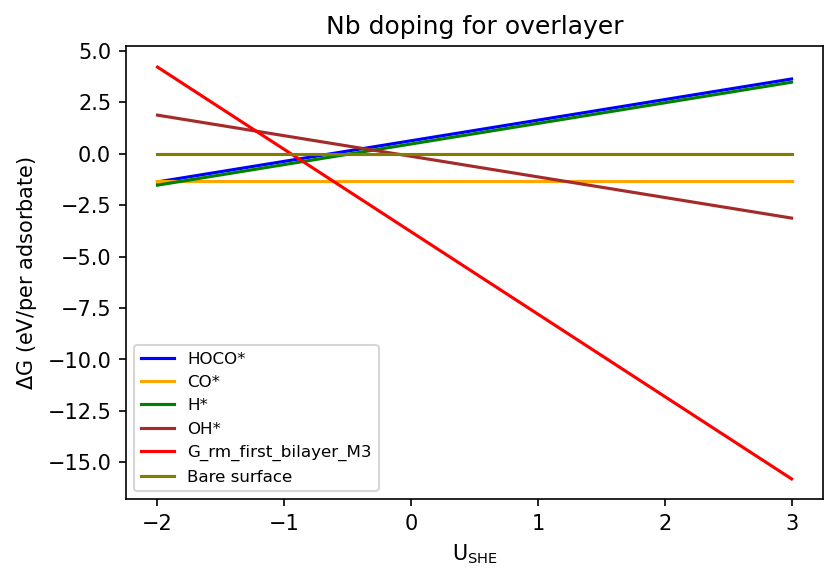

C:\Users\changai\AppData\Local\Temp/ipykernel_20328/1835447014.py:325: RuntimeWarning: invalid value encountered in double_scalars
  x = pHs_acc[i]/count[i]
C:\Users\changai\AppData\Local\Temp/ipykernel_20328/1835447014.py:326: RuntimeWarning: invalid value encountered in double_scalars
  y = Us_acc[i]/count[i]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


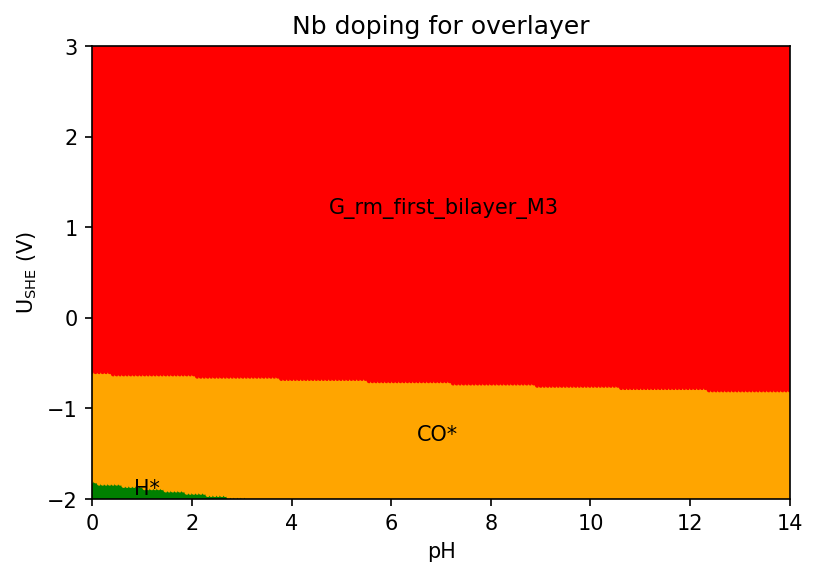

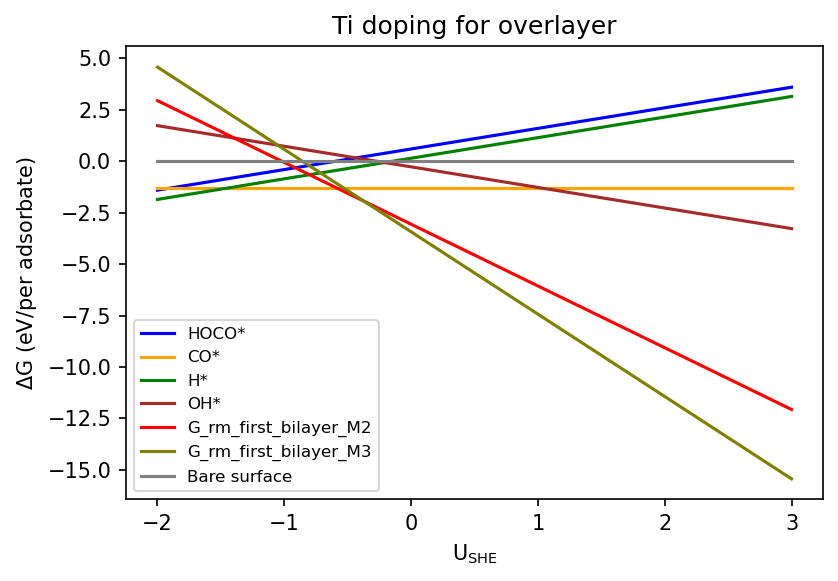

C:\Users\changai\AppData\Local\Temp/ipykernel_20328/1835447014.py:325: RuntimeWarning: invalid value encountered in double_scalars
  x = pHs_acc[i]/count[i]
C:\Users\changai\AppData\Local\Temp/ipykernel_20328/1835447014.py:326: RuntimeWarning: invalid value encountered in double_scalars
  y = Us_acc[i]/count[i]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


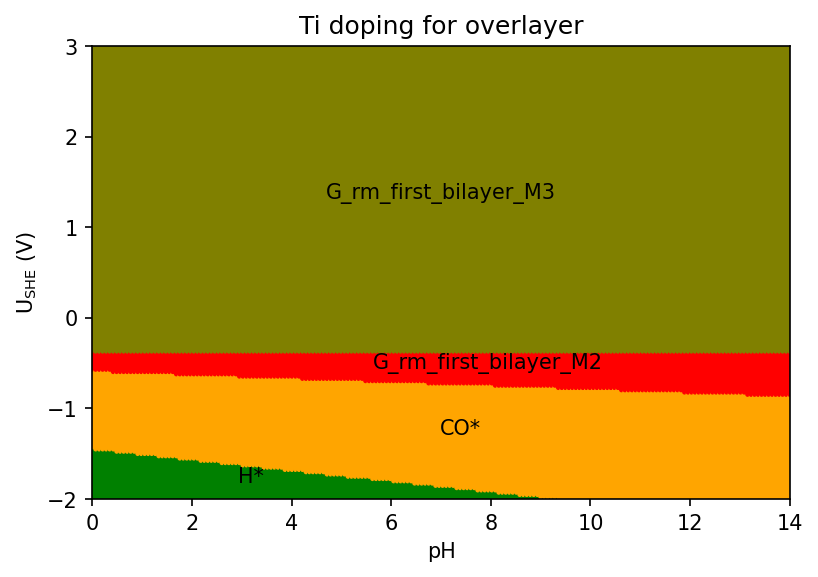

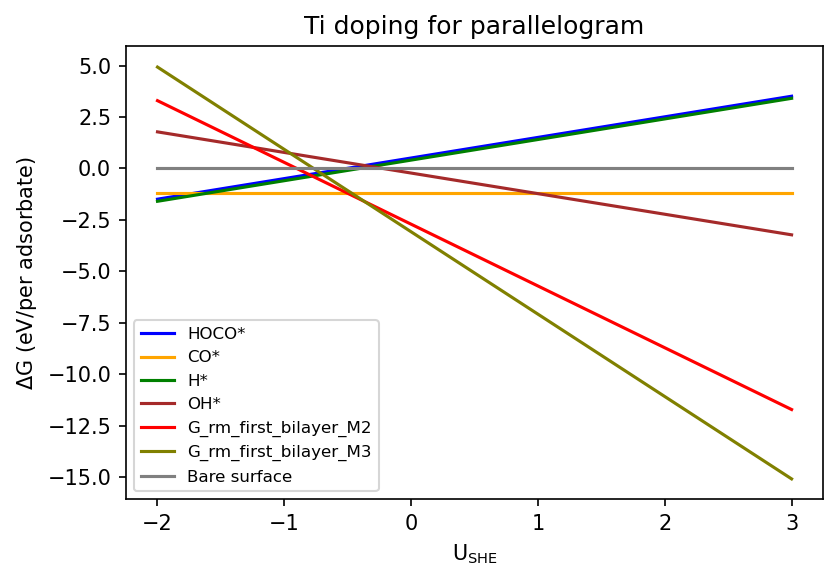

C:\Users\changai\AppData\Local\Temp/ipykernel_20328/1835447014.py:325: RuntimeWarning: invalid value encountered in double_scalars
  x = pHs_acc[i]/count[i]
C:\Users\changai\AppData\Local\Temp/ipykernel_20328/1835447014.py:326: RuntimeWarning: invalid value encountered in double_scalars
  y = Us_acc[i]/count[i]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


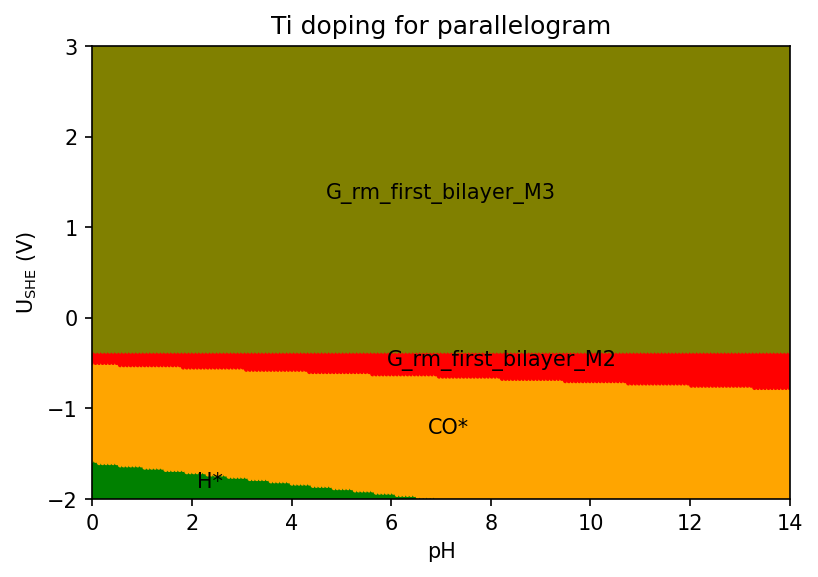

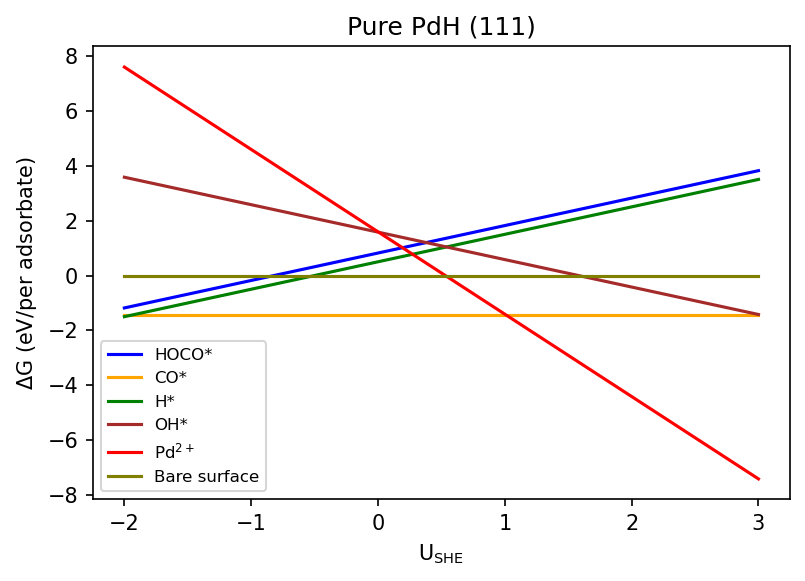

C:\Users\changai\AppData\Local\Temp/ipykernel_20328/1835447014.py:325: RuntimeWarning: invalid value encountered in double_scalars
  x = pHs_acc[i]/count[i]
C:\Users\changai\AppData\Local\Temp/ipykernel_20328/1835447014.py:326: RuntimeWarning: invalid value encountered in double_scalars
  y = Us_acc[i]/count[i]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


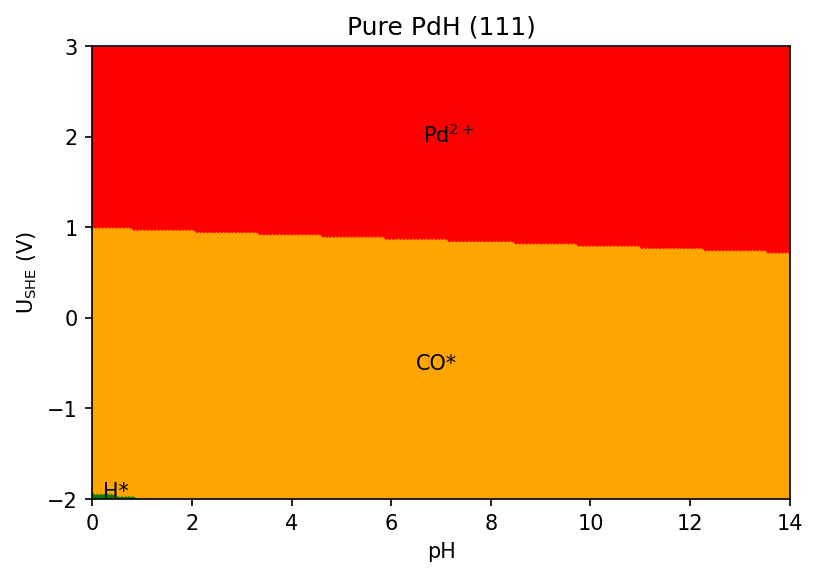

In [2]:
from pcat.lib.io import pd_read_excel
import numpy as np
import pcat.utils.constants as const
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.rcParams.update({'mathtext.default':  'regular', 'figure.dpi': 150})
# matplotlib.use('TkAgg')

def pourbaix_diagram(U, pH, system):
# def pourbaix_diagram(U, pH, Nb_overly=False, Ti_overly=False, Ti_paral=False, Pd_pure=False):
    """Get pourbaix diagram as a function of applied potential and pH value"""
    # df = pd_read_excel(filename=xls_name, sheet=sheet_name_dGs)
    # df = df.iloc[10]
    # surface = df['Surface']
    # dG1 = df['dG1']
    # dG2 = df['dG2']
    # dG3 = df['dG3']
    # dG4 = df['dG4']
    # dG5 = df['dG5']
    G_H2g = -7.096
    G_H2Og = -12.827 # eV
    
    E_Pd54H54 = -285.3708828 # pure PdH
    E_Pd53H54 = -282.78668443 # remove 1 Pd
    E_Pd53H53 = -279.36308240 # remove 1 Pd and 1 H
    
    E_Pd45Nb9H54 = -336.2919741 # Nb overlayer
    E_Pd45Nb8H54 = -327.95832335 # remove 1 Nb
    E_Pd45Nb8H53 = -323.66792350 # remove 1 Nb and 1 H
    E_Pd45H45 = -236.30774029 # remove first bilayer
    
    E_Pd45Ti9H54 = -330.0370939 # Ti overlayer
    E_Pd45Ti8H54 = -322.46471945 # remove 1 Ti
    E_Pd45Ti8H53 = -318.73737847 # remove 1 Ti and 1 H
    E_Pd45H45 = -236.30774029 # remove first bilayer
    
    E_Pd50Ti4H54 = -305.3263439 # Ti parallelogram
    E_Pd50Ti3H54 = -297.69180749 # remove 1 Ti
    E_Pd50Ti3H53 = -293.96607660 # remove 1 Ti and 1 H
    E_Pd50H50 = -262.23018405 # remove first bilayer
    
    E_Pd_bulk = -1.950920655
    E_Nb_bulk = -7.244883085
    E_Ti_bulk = -5.85829807
    G_Pd2plus = E_Pd_bulk + 2 * 0.951 + 0.0592 * np.log(10**(-6))
    G_Nb3plus = E_Nb_bulk + 3 * (-1.099) + 0.0592 * np.log(10**(-6))
    G_Nb_OH_4 = E_Nb_bulk + 4 * G_H2Og - 2 * G_H2g + 5*(-0.537) + 0.0592 * np.log(10**(-6))
    # G_Ti2plus = E_Ti_bulk + 2 * (-1.63) + 0.0592 * np.log(10**(-6))
    G_Ti2plus = E_Ti_bulk + 2 * (-1.628) + 0.0592 * np.log(10**(-6))
    # G_Ti3plus = E_Ti_bulk + 3 * (-1.26) + 0.0592 * np.log(10**(-6))
    G_Ti3plus = G_Ti2plus + (-0.369) + 0
    # G_Ti2plus = E_Ti_bulk + 2 * (-1.60) + 0.0592 * np.log(10**(-6))
    # G_Ti3plus = E_Ti_bulk + 3 * (-1.37) + 0.0592 * np.log(10**(-6))
    G_Ti_OH_2 = E_Ti_bulk + 2 * G_H2Og - G_H2g + 4*(-1) + 0.0592 * np.log(10**(-6))
    
    if system == 'Nb_overly':
        dG1 = 0.624
        dG2 = -0.725
        dG3 = -0.224
        dG4 = 0.467
        dG5 = -0.132
    elif system == 'Ti_overly':
        dG1 = 0.588
        dG2 = -0.720
        dG3 = -0.255
        dG4 = 0.138
        dG5 = -0.280
    elif system == 'Ti_paral':
        dG1 = 0.509
        dG2 = -0.674
        dG3 = -0.288
        dG4 = 0.407
        dG5 = -0.222
    elif system == 'Pd_pure':
        dG1 = 0.820
        dG2 = -0.603
        dG3 = 0.093
        dG4 = 0.501
        dG5 = 1.581
    
    kB = const.kB
    T = 297.15
    N, M = 200, 200
    # pH = 0
    U_model = np.linspace(min(U), max(U), N)
    if type(pH) == int or type(pH) == float:
        pH_model = [pH]
    else:
        pH_model = np.linspace(min(pH), max(pH), M)
    Us = []
    pHs = []
    Gb_HOCOs = []
    Gb_CO_ref_es = []
    Gb_COs = []
    Gb_Hs = []
    Gb_OHs = []
    G_Nb_overly_to_Pds = []
    G_rm_one_Ms = []
    G_rm_first_bilayer_Ms = []
    G_rm_one_M2s = []
    G_rm_first_bilayer_M2s = []
    G_rm_one_M3s = []
    G_rm_first_bilayer_M3s = []
    G_rm_one_M_OH_2s = []
    G_rm_one_M_OH_4s = []
    G_rm_one_M2_Hs = []
    G_rm_one_M3_Hs = []
    bare_PdHs = [] 
    colors = []
    Us_acc = np.zeros(20) # accumulate U in order to calculate average U
    pHs_acc = np.zeros(20)
    count = np.zeros(20)
    color_list = ['blue', 'orange', 'green', 'brown', 'red', 'olive', 'gray', 'yellow', 'purple', 'pink']
    for i, ph in enumerate(pH_model):
        for j, u in enumerate(U_model):
            bare_PdH = 0
            bare_PdHs.append(bare_PdH)
            
            Gb_HOCO = dG1 + u + kB * T * ph * np.log(10)
            Gb_HOCOs.append(Gb_HOCO)
            
            Gb_CO_ref_e = dG2 - dG1
            Gb_CO = -dG3
            # Gb_COs.append(Gb_CO) # or Gb_CO_ref_e
            Gb_COs.append(Gb_CO_ref_e)
            
            Gb_H = dG4 + u + kB * T * ph * np.log(10)
            Gb_Hs.append(Gb_H)
            
            Gb_OH = dG5 - u - kB * T * ph * np.log(10)
            Gb_OHs.append(Gb_OH)
            
            
            if system == 'Nb_overly':
                # G_Nb_overly_to_Pd = (E_Pd54H54 - 9*G_Pd2plus + 9*G_Nb3plus - 9*u - E_Pd45Nb9H54) / 9.0 # replace Nb overlayer to Pd overlayer
                # G_Nb_overly_to_Pds.append(G_Nb_overly_to_Pd)
                
                # only remove one Nb to be Nb3+ on Pd45Nb9H54 surface
                G_rm_one_M3 = E_Pd45Nb8H54 + G_Nb3plus - 3*u - E_Pd45Nb9H54
                G_rm_one_M3s.append(G_rm_one_M3)
                
                G_rm_one_M3_H = E_Pd45Nb8H53 + G_Nb3plus + 0.5*G_H2g - 4*u - kB * T * ph * np.log(10) - E_Pd45Nb9H54 
                G_rm_one_M3_Hs.append(G_rm_one_M3_H)
                
                # remove first bilayer including overlayer Nb and H
                G_rm_first_bilayer_M3 = (E_Pd45H45 + 9*G_Nb3plus - 36*u + 9*0.5*G_H2g - E_Pd45Nb9H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                G_rm_first_bilayer_M3s.append(G_rm_first_bilayer_M3)
                # G_rm_first_bilayer_M = (E_Pd45H45 + 9*G_Pd2plus - 27*u + 9*0.5*G_H2g - E_Pd54H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                
                G_rm_one_M_OH_4 = E_Pd45Nb8H54 + G_Nb_OH_4 + 2*G_H2g - 5 * u - 4 * G_H2Og - E_Pd45Nb9H54
                G_rm_one_M_OH_4s.append(G_rm_one_M_OH_4)
                
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_first_bilayer_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M3_H, bare_PdH]
                G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_first_bilayer_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M3_H, G_rm_one_M_OH_4, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M3, G_rm_one_M3_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M_OH_4, bare_PdH]
            
            elif system == 'Ti_overly':
                # remove only one Ti to be Ti2+
                G_rm_one_M2 = E_Pd45Ti8H54 + G_Ti2plus - 2*u - E_Pd45Ti9H54
                G_rm_one_M2s.append(G_rm_one_M2)
                # remove only one Ti to Ti3+
                G_rm_one_M3 = E_Pd45Ti8H54 + G_Ti3plus - 3*u - E_Pd45Ti9H54
                G_rm_one_M3s.append(G_rm_one_M3)
                
                G_rm_one_M2_H = E_Pd45Ti8H53 + G_Ti2plus + 0.5*G_H2g - 3*u - kB * T * ph * np.log(10) - E_Pd45Ti9H54 
                G_rm_one_M2_Hs.append(G_rm_one_M2_H)
                
                G_rm_one_M3_H = E_Pd45Ti8H53 + G_Ti3plus + 0.5*G_H2g - 4*u - kB * T * ph * np.log(10) - E_Pd45Ti9H54 
                G_rm_one_M3_Hs.append(G_rm_one_M3_H)
                
                # remove first bilayer to Ti2+ including overlayer Ti and H
                G_rm_first_bilayer_M2 = (E_Pd45H45 + 9*G_Ti2plus - 27*u + 9*0.5*G_H2g - E_Pd45Ti9H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                G_rm_first_bilayer_M2s.append(G_rm_first_bilayer_M2)
                # remove first bilayer to Ti3+ including overlayer Ti and H
                G_rm_first_bilayer_M3 = (E_Pd45H45 + 9*G_Ti3plus - 36*u + 9*0.5*G_H2g - E_Pd45Ti9H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                G_rm_first_bilayer_M3s.append(G_rm_first_bilayer_M3)
                
                # G_Ti_OH_2 = 2*G_H2Og + E_Ti_bulk - G_H2g + 2* (-1) 
                G_rm_one_M_OH_2 = E_Pd45Ti8H54 + G_Ti_OH_2 + G_H2g - 4*u - 2*G_H2Og - E_Pd45Ti9H54 - 2 * kB * T * ph * np.log(10)
                G_rm_one_M_OH_2s.append(G_rm_one_M_OH_2)
                
                # G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_one_M2_H, bare_PdH]
                G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_first_bilayer_M2, G_rm_first_bilayer_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2_H, G_rm_one_M3_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2, G_rm_one_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M_OH_2, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2_H, bare_PdH]
            
            elif system == 'Ti_paral':
                # remove only one Ti to be Ti2+
                G_rm_one_M2 = E_Pd50Ti3H54 + G_Ti2plus - 2*u - E_Pd50Ti4H54
                G_rm_one_M2s.append(G_rm_one_M2)
                # remove only one Ti to Ti3+
                G_rm_one_M3 = E_Pd50Ti3H54 + G_Ti3plus - 3*u - E_Pd50Ti4H54
                G_rm_one_M3s.append(G_rm_one_M3)
                
                G_rm_one_M2_H = E_Pd50Ti3H53 + G_Ti2plus + 0.5*G_H2g - 3*u - kB * T * ph * np.log(10) - E_Pd50Ti4H54 
                G_rm_one_M2_Hs.append(G_rm_one_M2_H)
                
                G_rm_one_M3_H = E_Pd50Ti3H53 + G_Ti3plus + 0.5*G_H2g - 4*u - kB * T * ph * np.log(10) - E_Pd50Ti4H54 
                G_rm_one_M3_Hs.append(G_rm_one_M3_H)
                
                # remove first bilayer to Ti2+ including overlayer Ti and H
                G_rm_first_bilayer_M2 = (E_Pd50H50 + 4*G_Ti2plus - 12*u + 4*0.5*G_H2g - E_Pd50Ti4H54 - 4 * kB * T * ph * np.log(10))/ 4.0
                G_rm_first_bilayer_M2s.append(G_rm_first_bilayer_M2)
                # remove first bilayer to Ti3+ including overlayer Ti and H
                G_rm_first_bilayer_M3 = (E_Pd50H50 + 4*G_Ti3plus - 16*u + 4*0.5*G_H2g - E_Pd50Ti4H54 - 4 * kB * T * ph * np.log(10))/ 4.0
                G_rm_first_bilayer_M3s.append(G_rm_first_bilayer_M3)
                
                G_rm_one_M_OH_2 = E_Pd50Ti3H53 + G_Ti_OH_2 + G_H2g - 4*u - 2*G_H2Og - E_Pd50Ti4H54 - 2 * kB * T * ph * np.log(10)
                G_rm_one_M_OH_2s.append(G_rm_one_M_OH_2)
                
                G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_first_bilayer_M2, G_rm_first_bilayer_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2_H, G_rm_one_M3_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2, G_rm_one_M3, bare_PdH]
            
            elif system == 'Pd_pure':
                # only remove one Nb to be Pd2+ on E_Pd54H54 surface
                G_rm_one_M2 = E_Pd53H54 + G_Pd2plus - 2*u - E_Pd54H54
                G_rm_one_M2s.append(G_rm_one_M2)
                
                G_rm_one_M2_H = E_Pd53H53 + G_Pd2plus + 0.5*G_H2g  - 3*u - kB * T * ph * np.log(10) - E_Pd54H54
                G_rm_one_M2_Hs.append(G_rm_one_M2_H)
    
                # remove first bilayer Pd2+ including overlayer Pd and H
                G_rm_first_bilayer_M2 = (E_Pd45H45 + 9*G_Pd2plus - 27*u + 9*0.5*G_H2g - E_Pd54H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                G_rm_first_bilayer_M2s.append(G_rm_first_bilayer_M2)
                # G_rm_first_bilayer_M = (E_Pd45H45 + 9*G_Pd2plus - 27*u + 9*0.5*G_H2g - E_Pd54H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                
                G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_one_M2_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2, bare_PdH]
                
                
            # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_first_bilayer_M, bare_PdH]
            # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M, bare_PdH]
            # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_first_bilayer_M2s, G_rm_first_bilayer_M3s, bare_PdH]
            min_dot = min(G_values)
            for i, G_value in enumerate(G_values):
                if min_dot == G_value:
                    color = color_list[i]
                    Us_acc[i] += u
                    pHs_acc[i] += ph
                    count[i] += 1
            Us.append(u)
            pHs.append(ph)
            colors.append(color)
            
    if system == 'Nb_overly':
        tuples = {'HOCO*': Gb_HOCOs,
                  # 'Gb_CO_ref_es': Gb_CO_ref_es,
                  'CO*': Gb_COs,
                  'H*': Gb_Hs,
                  'OH*': Gb_OHs,
                  # 'G_rm_one_M2': G_rm_one_M2s,
                   # 'G_rm_one_M3': G_rm_one_M3s,
                   'G_rm_first_bilayer_M3': G_rm_first_bilayer_M3s,
                    # 'G_rm_one_M_OH_4': G_rm_one_M_OH_4s,
#                   'Nb$^{3+}$': G_rm_one_M3_Hs,
                  'Bare surface': bare_PdHs
                  }
    elif system == 'Ti_overly':
        tuples = {'HOCO*': Gb_HOCOs,
                  # 'Gb_CO_ref_es': Gb_CO_ref_es,
                  'CO*': Gb_COs,
                  'H*': Gb_Hs,
                  'OH*': Gb_OHs,
                   # 'G_rm_one_M2': G_rm_one_M2s,
                   # 'G_rm_one_M3': G_rm_one_M3s,
                  'G_rm_first_bilayer_M2': G_rm_first_bilayer_M2s,
                  'G_rm_first_bilayer_M3': G_rm_first_bilayer_M3s,
                   # 'G_rm_one_M_OH_2': G_rm_one_M_OH_2s,
#                    'Ti$^{2+}$': G_rm_one_M2_Hs,
#                    'Ti$^{3+}$': G_rm_one_M3_Hs,
                  'Bare surface': bare_PdHs
                  }
    elif system == 'Ti_paral':
        tuples = {'HOCO*': Gb_HOCOs,
                  # 'Gb_CO_ref_es': Gb_CO_ref_es,
                  'CO*': Gb_COs,
                  'H*': Gb_Hs,
                  'OH*': Gb_OHs,
                  # 'G_rm_one_M2': G_rm_one_M2s,
                  # 'G_rm_one_M3': G_rm_one_M3s,
                  'G_rm_first_bilayer_M2': G_rm_first_bilayer_M2s,
                  'G_rm_first_bilayer_M3': G_rm_first_bilayer_M3s,
#                    'Ti$^{2+}$': G_rm_one_M2_Hs,
#                    'Ti$^{3+}$': G_rm_one_M3_Hs,
                  'Bare surface': bare_PdHs
                  }
    elif system == 'Pd_pure':
        tuples = {'HOCO*': Gb_HOCOs,
                  # 'Gb_CO_ref_es': Gb_CO_ref_es,
                  'CO*': Gb_COs,
                  'H*': Gb_Hs,
                  'OH*': Gb_OHs,
                  'Pd$^{2+}$': G_rm_one_M2_Hs,
                  # 'G_rm_one_M2': G_rm_one_M2s,
                   # 'G_rm_one_M3': G_rm_one_M3s,
                    # 'G_rm_first_bilayer_M2': G_rm_first_bilayer_M2s,
                   # 'G_rm_first_bilayer_M3': G_rm_first_bilayer_M3s,
                   # 'G_rm_one_M2': G_rm_one_M2s,
                  'Bare surface': bare_PdHs
                  }
    df = pd.DataFrame(tuples)
    if type(pH) == int or type(pH) == float:
        # plot linear
        for i, column in enumerate(df.columns):
            plt.plot(Us, df[column].values, label=column, color=color_list[i])
        plt.xlabel('$U_{SHE}$')
        plt.ylabel('$\Delta G$ (eV/per adsorbate)')
        plt.legend(fontsize=8)
        # plt.show()
    else:
        # plot 2D
        plt.scatter(pHs, Us, c=colors, marker='o', zorder=2, s=2)
        plt.xlabel('pH')
        plt.ylabel('$U_{SHE}$ (V)')
        for i, txt in enumerate(df.columns):
            x = pHs_acc[i]/count[i]
            y = Us_acc[i]/count[i] 
            plt.text(x, y, txt, horizontalalignment='center')

        
if __name__ == '__main__':
    
    system_name = 'collect_vasp_PdHy_v3'
    
    xls_name = f'../data/{system_name}.xlsx'
    fig_dir = '../figures'
    
    sheet_name_dGs = 'dGs'

    for system in ['Nb_overly', 'Ti_overly', 'Ti_paral', 'Pd_pure']:
        U = [-2, 3]
        pH = 0
        pourbaix_diagram(U, pH, system)
        # plt.title(str(system))
        if system == 'Nb_overly':
            plt.title('Nb doping for overlayer')
        elif system == 'Ti_overly':
            plt.title('Ti doping for overlayer')
        elif system == 'Ti_paral':
            plt.title('Ti doping for parallelogram')
        elif system == 'Pd_pure':
            plt.title('Pure PdH (111)')
        plt.show()
        
        pH = [0, 14]
        pourbaix_diagram(U, pH, system)
        # plt.title(str(system))
        if system == 'Nb_overly':
            plt.title('Nb doping for overlayer')
        elif system == 'Ti_overly':
            plt.title('Ti doping for overlayer')
        elif system == 'Ti_paral':
            plt.title('Ti doping for parallelogram')
        elif system == 'Pd_pure':
            plt.title('Pure PdH (111)')
        plt.margins(0.0)
        plt.show()

# Dissolve one metal atoms (not including one H)

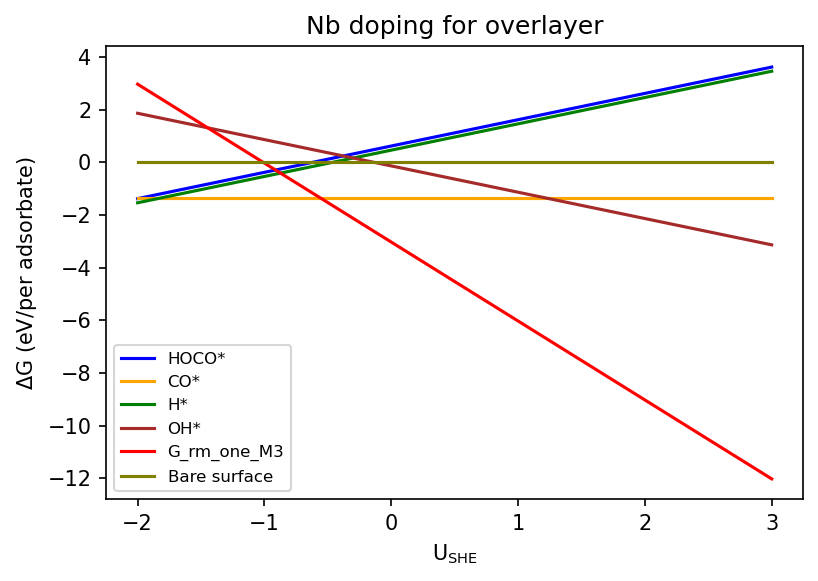

C:\Users\changai\AppData\Local\Temp/ipykernel_20328/2323970509.py:323: RuntimeWarning: invalid value encountered in double_scalars
  x = pHs_acc[i]/count[i]
C:\Users\changai\AppData\Local\Temp/ipykernel_20328/2323970509.py:324: RuntimeWarning: invalid value encountered in double_scalars
  y = Us_acc[i]/count[i]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


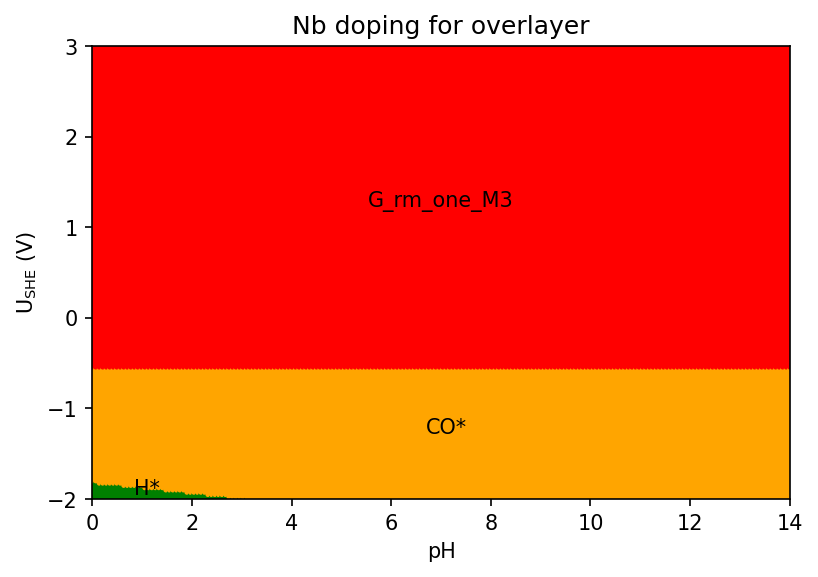

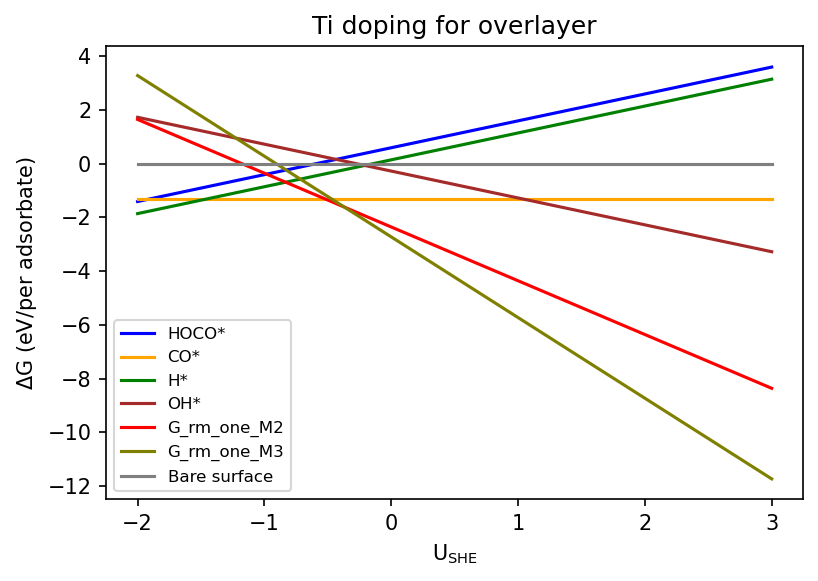

C:\Users\changai\AppData\Local\Temp/ipykernel_20328/2323970509.py:323: RuntimeWarning: invalid value encountered in double_scalars
  x = pHs_acc[i]/count[i]
C:\Users\changai\AppData\Local\Temp/ipykernel_20328/2323970509.py:324: RuntimeWarning: invalid value encountered in double_scalars
  y = Us_acc[i]/count[i]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


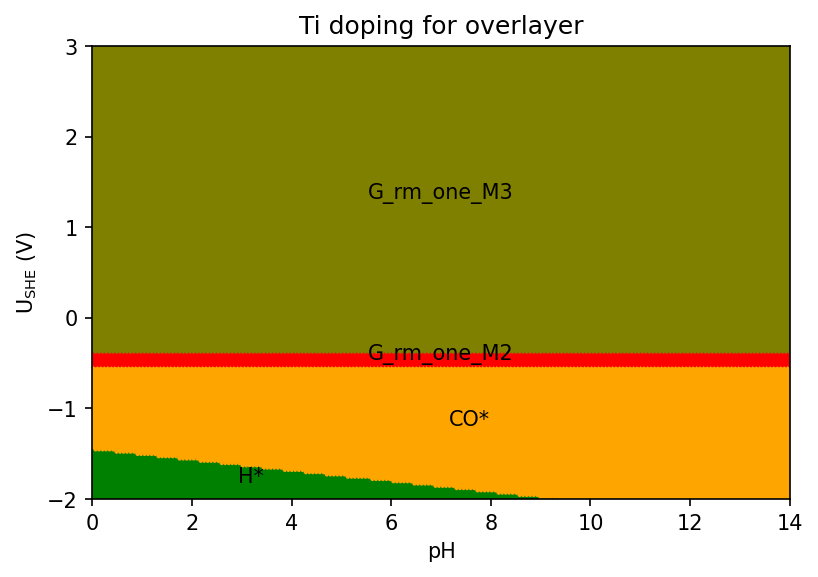

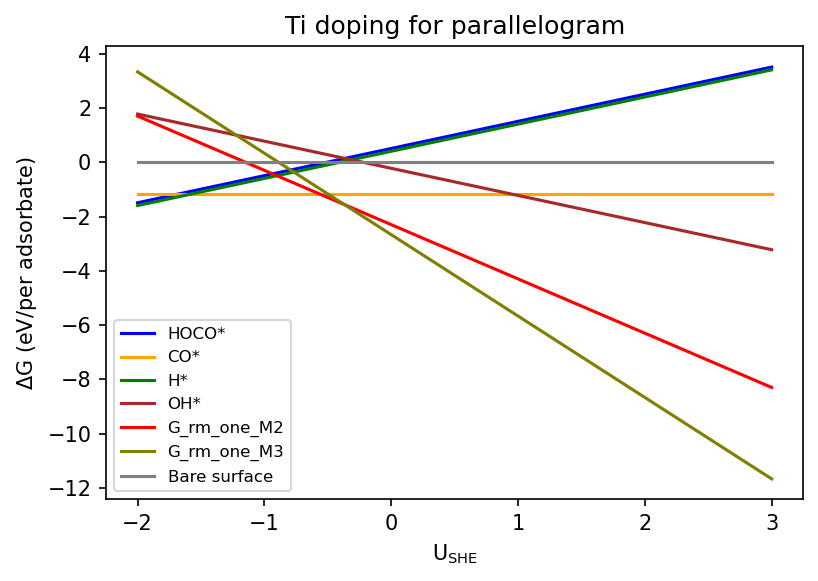

C:\Users\changai\AppData\Local\Temp/ipykernel_20328/2323970509.py:323: RuntimeWarning: invalid value encountered in double_scalars
  x = pHs_acc[i]/count[i]
C:\Users\changai\AppData\Local\Temp/ipykernel_20328/2323970509.py:324: RuntimeWarning: invalid value encountered in double_scalars
  y = Us_acc[i]/count[i]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


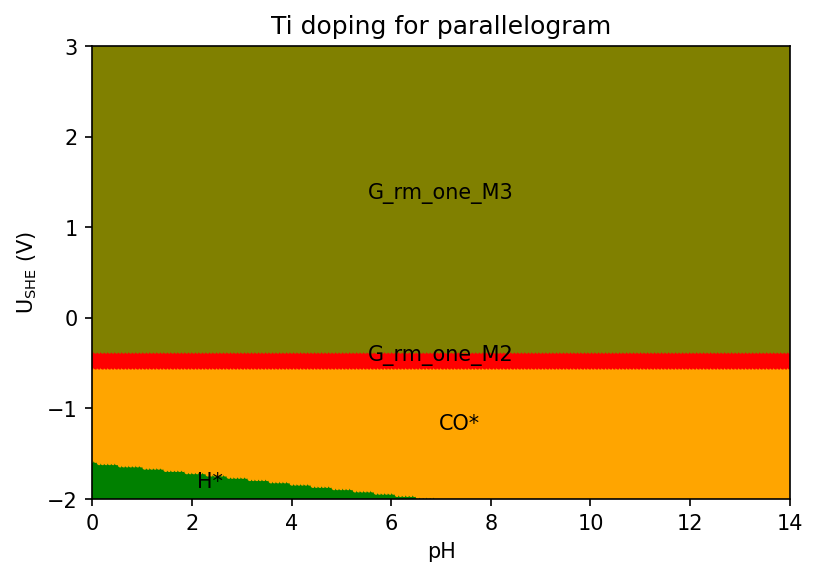

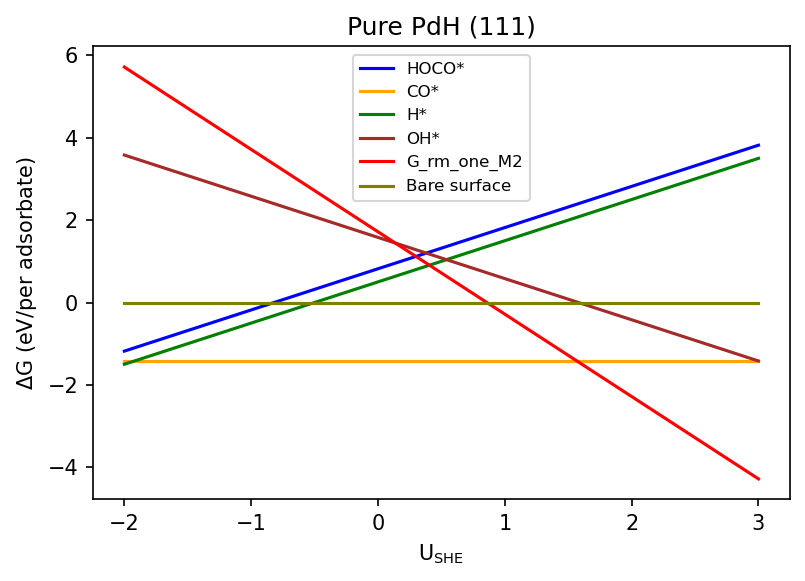

C:\Users\changai\AppData\Local\Temp/ipykernel_20328/2323970509.py:323: RuntimeWarning: invalid value encountered in double_scalars
  x = pHs_acc[i]/count[i]
C:\Users\changai\AppData\Local\Temp/ipykernel_20328/2323970509.py:324: RuntimeWarning: invalid value encountered in double_scalars
  y = Us_acc[i]/count[i]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


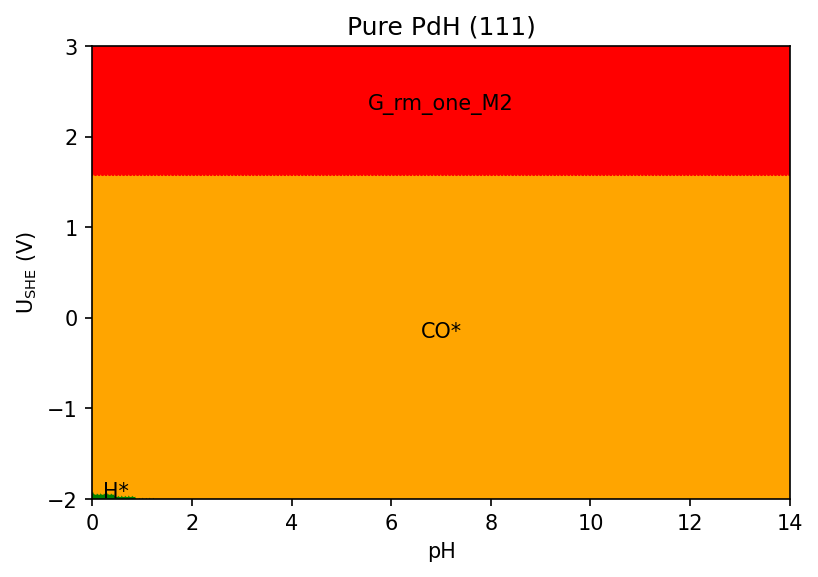

In [3]:
from pcat.lib.io import pd_read_excel
import numpy as np
import pcat.utils.constants as const
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.rcParams.update({'mathtext.default':  'regular', 'figure.dpi': 150})
# matplotlib.use('TkAgg')

def pourbaix_diagram(U, pH, system):
# def pourbaix_diagram(U, pH, Nb_overly=False, Ti_overly=False, Ti_paral=False, Pd_pure=False):
    """Get pourbaix diagram as a function of applied potential and pH value"""
    # df = pd_read_excel(filename=xls_name, sheet=sheet_name_dGs)
    # df = df.iloc[10]
    # surface = df['Surface']
    # dG1 = df['dG1']
    # dG2 = df['dG2']
    # dG3 = df['dG3']
    # dG4 = df['dG4']
    # dG5 = df['dG5']
    G_H2g = -7.096
    G_H2Og = -12.827 # eV
    
    E_Pd54H54 = -285.3708828 # pure PdH
    E_Pd53H54 = -282.78668443 # remove 1 Pd
    E_Pd53H53 = -279.36308240 # remove 1 Pd and 1 H
    
    E_Pd45Nb9H54 = -336.2919741 # Nb overlayer
    E_Pd45Nb8H54 = -327.95832335 # remove 1 Nb
    E_Pd45Nb8H53 = -323.66792350 # remove 1 Nb and 1 H
    E_Pd45H45 = -236.30774029 # remove first bilayer
    
    E_Pd45Ti9H54 = -330.0370939 # Ti overlayer
    E_Pd45Ti8H54 = -322.46471945 # remove 1 Ti
    E_Pd45Ti8H53 = -318.73737847 # remove 1 Ti and 1 H
    E_Pd45H45 = -236.30774029 # remove first bilayer
    
    E_Pd50Ti4H54 = -305.3263439 # Ti parallelogram
    E_Pd50Ti3H54 = -297.69180749 # remove 1 Ti
    E_Pd50Ti3H53 = -293.96607660 # remove 1 Ti and 1 H
    E_Pd50H50 = -262.23018405 # remove first bilayer
    
    E_Pd_bulk = -1.950920655
    E_Nb_bulk = -7.244883085
    E_Ti_bulk = -5.85829807
    G_Pd2plus = E_Pd_bulk + 2 * 0.951 + 0.0592 * np.log(10**(-6)) 
    G_Nb3plus = E_Nb_bulk + 3 * (-1.099) + 0.0592 * np.log(10**(-6))
    G_Nb_OH_4 = E_Nb_bulk + 4 * G_H2Og - 2 * G_H2g + 5*(-0.537) + 0.0592 * np.log(10**(-6))
    # G_Ti2plus = E_Ti_bulk + 2 * (-1.63) + 0.0592 * np.log(10**(-6))
    G_Ti2plus = E_Ti_bulk + 2 * (-1.628) + 0.0592 * np.log(10**(-6))
    # G_Ti3plus = E_Ti_bulk + 3 * (-1.26) + 0.0592 * np.log(10**(-6))
    G_Ti3plus = G_Ti2plus + (-0.369) + 0
    # G_Ti2plus = E_Ti_bulk + 2 * (-1.60) + 0.0592 * np.log(10**(-6))
    # G_Ti3plus = E_Ti_bulk + 3 * (-1.37) + 0.0592 * np.log(10**(-6))
    G_Ti_OH_2 = E_Ti_bulk + 2 * G_H2Og - G_H2g + 4*(-1) + 0.0592 * np.log(10**(-6))
    
    if system == 'Nb_overly':
        dG1 = 0.624
        dG2 = -0.725
        dG3 = -0.224
        dG4 = 0.467
        dG5 = -0.132
    elif system == 'Ti_overly':
        dG1 = 0.588
        dG2 = -0.720
        dG3 = -0.255
        dG4 = 0.138
        dG5 = -0.280
    elif system == 'Ti_paral':
        dG1 = 0.509
        dG2 = -0.674
        dG3 = -0.288
        dG4 = 0.407
        dG5 = -0.222
    elif system == 'Pd_pure':
        dG1 = 0.820
        dG2 = -0.603
        dG3 = 0.093
        dG4 = 0.501
        dG5 = 1.581
    
    kB = const.kB
    T = 297.15
    N, M = 200, 200
    # pH = 0
    U_model = np.linspace(min(U), max(U), N)
    if type(pH) == int or type(pH) == float:
        pH_model = [pH]
    else:
        pH_model = np.linspace(min(pH), max(pH), M)
    Us = []
    pHs = []
    Gb_HOCOs = []
    Gb_CO_ref_es = []
    Gb_COs = []
    Gb_Hs = []
    Gb_OHs = []
    G_Nb_overly_to_Pds = []
    G_rm_one_Ms = []
    G_rm_first_bilayer_Ms = []
    G_rm_one_M2s = []
    G_rm_first_bilayer_M2s = []
    G_rm_one_M3s = []
    G_rm_first_bilayer_M3s = []
    G_rm_one_M_OH_2s = []
    G_rm_one_M_OH_4s = []
    G_rm_one_M2_Hs = []
    G_rm_one_M3_Hs = []
    bare_PdHs = [] 
    colors = []
    Us_acc = np.zeros(20) # accumulate U in order to calculate average U
    pHs_acc = np.zeros(20)
    count = np.zeros(20)
    color_list = ['blue', 'orange', 'green', 'brown', 'red', 'olive', 'gray', 'yellow', 'purple', 'pink']
    for i, ph in enumerate(pH_model):
        for j, u in enumerate(U_model):
            bare_PdH = 0
            bare_PdHs.append(bare_PdH)
            
            Gb_HOCO = dG1 + u + kB * T * ph * np.log(10)
            Gb_HOCOs.append(Gb_HOCO)
            
            Gb_CO_ref_e = dG2 - dG1
            Gb_CO = -dG3
            # Gb_COs.append(Gb_CO) # or Gb_CO_ref_e
            Gb_COs.append(Gb_CO_ref_e)
            
            Gb_H = dG4 + u + kB * T * ph * np.log(10)
            Gb_Hs.append(Gb_H)
            
            Gb_OH = dG5 - u - kB * T * ph * np.log(10)
            Gb_OHs.append(Gb_OH)
            
            
            if system == 'Nb_overly':
                # G_Nb_overly_to_Pd = (E_Pd54H54 - 9*G_Pd2plus + 9*G_Nb3plus - 9*u - E_Pd45Nb9H54) / 9.0 # replace Nb overlayer to Pd overlayer
                # G_Nb_overly_to_Pds.append(G_Nb_overly_to_Pd)
                
                # only remove one Nb to be Nb3+ on Pd45Nb9H54 surface
                G_rm_one_M3 = E_Pd45Nb8H54 + G_Nb3plus - 3*u - E_Pd45Nb9H54
                G_rm_one_M3s.append(G_rm_one_M3)
                
                G_rm_one_M3_H = E_Pd45Nb8H53 + G_Nb3plus + 0.5*G_H2g - 4*u - kB * T * ph * np.log(10) - E_Pd45Nb9H54 
                G_rm_one_M3_Hs.append(G_rm_one_M3_H)
                
                # remove first bilayer including overlayer Nb and H
                G_rm_first_bilayer_M3 = (E_Pd45H45 + 9*G_Nb3plus - 36*u + 9*0.5*G_H2g - E_Pd45Nb9H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                G_rm_first_bilayer_M3s.append(G_rm_first_bilayer_M3)
                # G_rm_first_bilayer_M = (E_Pd45H45 + 9*G_Pd2plus - 27*u + 9*0.5*G_H2g - E_Pd54H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                
                G_rm_one_M_OH_4 = E_Pd45Nb8H54 + G_Nb_OH_4 + 2*G_H2g - 5 * u - 4 * G_H2Og - E_Pd45Nb9H54
                G_rm_one_M_OH_4s.append(G_rm_one_M_OH_4)
                
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_first_bilayer_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M3_H, bare_PdH]
                G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_one_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M3_H, G_rm_one_M_OH_4, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M3, G_rm_one_M3_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M_OH_4, bare_PdH]
            
            elif system == 'Ti_overly':
                # remove only one Ti to be Ti2+
                G_rm_one_M2 = E_Pd45Ti8H54 + G_Ti2plus - 2*u - E_Pd45Ti9H54
                G_rm_one_M2s.append(G_rm_one_M2)
                # remove only one Ti to Ti3+
                G_rm_one_M3 = E_Pd45Ti8H54 + G_Ti3plus - 3*u - E_Pd45Ti9H54
                G_rm_one_M3s.append(G_rm_one_M3)
                
                G_rm_one_M2_H = E_Pd45Ti8H53 + G_Ti2plus + 0.5*G_H2g - 3*u - kB * T * ph * np.log(10) - E_Pd45Ti9H54 
                G_rm_one_M2_Hs.append(G_rm_one_M2_H)
                
                G_rm_one_M3_H = E_Pd45Ti8H53 + G_Ti3plus + 0.5*G_H2g - 4*u - kB * T * ph * np.log(10) - E_Pd45Ti9H54 
                G_rm_one_M3_Hs.append(G_rm_one_M3_H)
                
                # remove first bilayer to Ti2+ including overlayer Ti and H
                G_rm_first_bilayer_M2 = (E_Pd45H45 + 9*G_Ti2plus - 27*u + 9*0.5*G_H2g - E_Pd45Ti9H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                G_rm_first_bilayer_M2s.append(G_rm_first_bilayer_M2)
                # remove first bilayer to Ti3+ including overlayer Ti and H
                G_rm_first_bilayer_M3 = (E_Pd45H45 + 9*G_Ti3plus - 36*u + 9*0.5*G_H2g - E_Pd45Ti9H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                G_rm_first_bilayer_M3s.append(G_rm_first_bilayer_M3)
                
                # G_Ti_OH_2 = 2*G_H2Og + E_Ti_bulk - G_H2g + 2* (-1) 
                G_rm_one_M_OH_2 = E_Pd45Ti8H54 + G_Ti_OH_2 + G_H2g - 4*u - 2*G_H2Og - E_Pd45Ti9H54 - 2 * kB * T * ph * np.log(10)
                G_rm_one_M_OH_2s.append(G_rm_one_M_OH_2)
                
                # G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_one_M2_H, bare_PdH]
                G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_one_M2, G_rm_one_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2_H, G_rm_one_M3_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2, G_rm_one_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M_OH_2, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2_H, bare_PdH]
            
            elif system == 'Ti_paral':
                # remove only one Ti to be Ti2+
                G_rm_one_M2 = E_Pd50Ti3H54 + G_Ti2plus - 2*u - E_Pd50Ti4H54
                G_rm_one_M2s.append(G_rm_one_M2)
                # remove only one Ti to Ti3+
                G_rm_one_M3 = E_Pd50Ti3H54 + G_Ti3plus - 3*u - E_Pd50Ti4H54
                G_rm_one_M3s.append(G_rm_one_M3)
                
                G_rm_one_M2_H = E_Pd50Ti3H53 + G_Ti2plus + 0.5*G_H2g - 3*u - kB * T * ph * np.log(10) - E_Pd50Ti4H54 
                G_rm_one_M2_Hs.append(G_rm_one_M2_H)
                
                G_rm_one_M3_H = E_Pd50Ti3H53 + G_Ti3plus + 0.5*G_H2g - 4*u - kB * T * ph * np.log(10) - E_Pd50Ti4H54 
                G_rm_one_M3_Hs.append(G_rm_one_M3_H)
                
                # remove first bilayer to Ti2+ including overlayer Ti and H
                G_rm_first_bilayer_M2 = (E_Pd50H50 + 4*G_Ti2plus - 12*u + 4*0.5*G_H2g - E_Pd50Ti4H54 - 4 * kB * T * ph * np.log(10))/ 4.0
                G_rm_first_bilayer_M2s.append(G_rm_first_bilayer_M2)
                # remove first bilayer to Ti3+ including overlayer Ti and H
                G_rm_first_bilayer_M3 = (E_Pd50H50 + 4*G_Ti3plus - 16*u + 4*0.5*G_H2g - E_Pd50Ti4H54 - 4 * kB * T * ph * np.log(10))/ 4.0
                G_rm_first_bilayer_M3s.append(G_rm_first_bilayer_M3)
                
                G_rm_one_M_OH_2 = E_Pd50Ti3H53 + G_Ti_OH_2 + G_H2g - 4*u - 2*G_H2Og - E_Pd50Ti4H54 - 2 * kB * T * ph * np.log(10)
                G_rm_one_M_OH_2s.append(G_rm_one_M_OH_2)
                
                G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_one_M2, G_rm_one_M3, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2_H, G_rm_one_M3_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2, G_rm_one_M3, bare_PdH]
            
            elif system == 'Pd_pure':
                # only remove one Nb to be Pd2+ on E_Pd54H54 surface
                G_rm_one_M2 = E_Pd53H54 + G_Pd2plus - 2*u - E_Pd54H54
                G_rm_one_M2s.append(G_rm_one_M2)
                
                G_rm_one_M2_H = E_Pd53H53 + G_Pd2plus + 0.5*G_H2g  - 3*u - kB * T * ph * np.log(10) - E_Pd54H54
                G_rm_one_M2_Hs.append(G_rm_one_M2_H)
    
                # remove first bilayer Pd2+ including overlayer Pd and H
                G_rm_first_bilayer_M2 = (E_Pd45H45 + 9*G_Pd2plus - 27*u + 9*0.5*G_H2g - E_Pd54H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                G_rm_first_bilayer_M2s.append(G_rm_first_bilayer_M2)
                # G_rm_first_bilayer_M = (E_Pd45H45 + 9*G_Pd2plus - 27*u + 9*0.5*G_H2g - E_Pd54H54 - 9 * kB * T * ph * np.log(10))/ 9.0
                
                G_values = [Gb_HOCO, Gb_CO_ref_e, Gb_H, Gb_OH, G_rm_one_M2, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2_H, bare_PdH]
                # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M2, bare_PdH]
                
                
            # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_first_bilayer_M, bare_PdH]
            # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_one_M, bare_PdH]
            # G_values = [Gb_HOCO, Gb_CO, Gb_H, Gb_OH, G_rm_first_bilayer_M2s, G_rm_first_bilayer_M3s, bare_PdH]
            min_dot = min(G_values)
            for i, G_value in enumerate(G_values):
                if min_dot == G_value:
                    color = color_list[i]
                    Us_acc[i] += u
                    pHs_acc[i] += ph
                    count[i] += 1
            Us.append(u)
            pHs.append(ph)
            colors.append(color)
            
    if system == 'Nb_overly':
        tuples = {'HOCO*': Gb_HOCOs,
                  # 'Gb_CO_ref_es': Gb_CO_ref_es,
                  'CO*': Gb_COs,
                  'H*': Gb_Hs,
                  'OH*': Gb_OHs,
                  'G_rm_one_M3': G_rm_one_M3s,
#                    'G_rm_first_bilayer_M3': G_rm_first_bilayer_M3s,
                    # 'G_rm_one_M_OH_4': G_rm_one_M_OH_4s,
#                   'Nb$^{3+}$': G_rm_one_M3_Hs,
                  'Bare surface': bare_PdHs
                  }
    elif system == 'Ti_overly':
        tuples = {'HOCO*': Gb_HOCOs,
                  # 'Gb_CO_ref_es': Gb_CO_ref_es,
                  'CO*': Gb_COs,
                  'H*': Gb_Hs,
                  'OH*': Gb_OHs,
                   'G_rm_one_M2': G_rm_one_M2s,
                   'G_rm_one_M3': G_rm_one_M3s,
#                   'G_rm_first_bilayer_M2': G_rm_first_bilayer_M2s,
#                   'G_rm_first_bilayer_M3': G_rm_first_bilayer_M3s,
                   # 'G_rm_one_M_OH_2': G_rm_one_M_OH_2s,
#                    'Ti$^{2+}$': G_rm_one_M2_Hs,
#                    'Ti$^{3+}$': G_rm_one_M3_Hs,
                  'Bare surface': bare_PdHs
                  }
    elif system == 'Ti_paral':
        tuples = {'HOCO*': Gb_HOCOs,
                  # 'Gb_CO_ref_es': Gb_CO_ref_es,
                  'CO*': Gb_COs,
                  'H*': Gb_Hs,
                  'OH*': Gb_OHs,
                  'G_rm_one_M2': G_rm_one_M2s,
                  'G_rm_one_M3': G_rm_one_M3s,
#                   'G_rm_first_bilayer_M2': G_rm_first_bilayer_M2s,
#                   'G_rm_first_bilayer_M3': G_rm_first_bilayer_M3s,
#                    'Ti$^{2+}$': G_rm_one_M2_Hs,
#                    'Ti$^{3+}$': G_rm_one_M3_Hs,
                  'Bare surface': bare_PdHs
                  }
    elif system == 'Pd_pure':
        tuples = {'HOCO*': Gb_HOCOs,
                  # 'Gb_CO_ref_es': Gb_CO_ref_es,
                  'CO*': Gb_COs,
                  'H*': Gb_Hs,
                  'OH*': Gb_OHs,
#                   'Pd$^{2+}$': G_rm_one_M2_Hs,
                  'G_rm_one_M2': G_rm_one_M2s,
                    # 'G_rm_first_bilayer_M2': G_rm_first_bilayer_M2s,
                   # 'G_rm_first_bilayer_M3': G_rm_first_bilayer_M3s,
                   # 'G_rm_one_M2': G_rm_one_M2s,
                  'Bare surface': bare_PdHs
                  }
    df = pd.DataFrame(tuples)
    if type(pH) == int or type(pH) == float:
        # plot linear
        for i, column in enumerate(df.columns):
            plt.plot(Us, df[column].values, label=column, color=color_list[i])
        plt.xlabel('$U_{SHE}$')
        plt.ylabel('$\Delta G$ (eV/per adsorbate)')
        plt.legend(fontsize=8)
        # plt.show()
    else:
        # plot 2D
        plt.scatter(pHs, Us, c=colors, marker='o', zorder=2, s=2)
        plt.xlabel('pH')
        plt.ylabel('$U_{SHE}$ (V)')
        for i, txt in enumerate(df.columns):
            x = pHs_acc[i]/count[i]
            y = Us_acc[i]/count[i] 
            plt.text(x, y, txt, horizontalalignment='center')

        
if __name__ == '__main__':
    
    system_name = 'collect_vasp_PdHy_v3'
    
    xls_name = f'../data/{system_name}.xlsx'
    fig_dir = '../figures'
    
    sheet_name_dGs = 'dGs'

    for system in ['Nb_overly', 'Ti_overly', 'Ti_paral', 'Pd_pure']:
        U = [-2, 3]
        pH = 0
        pourbaix_diagram(U, pH, system)
        # plt.title(str(system))
        if system == 'Nb_overly':
            plt.title('Nb doping for overlayer')
        elif system == 'Ti_overly':
            plt.title('Ti doping for overlayer')
        elif system == 'Ti_paral':
            plt.title('Ti doping for parallelogram')
        elif system == 'Pd_pure':
            plt.title('Pure PdH (111)')
        plt.show()
        
        pH = [0, 14]
        pourbaix_diagram(U, pH, system)
        # plt.title(str(system))
        if system == 'Nb_overly':
            plt.title('Nb doping for overlayer')
        elif system == 'Ti_overly':
            plt.title('Ti doping for overlayer')
        elif system == 'Ti_paral':
            plt.title('Ti doping for parallelogram')
        elif system == 'Pd_pure':
            plt.title('Pure PdH (111)')
        plt.margins(0.0)
        plt.show()

In [7]:
E_Pd54H54 = -285.3708828 # pure PdH
E_Pd53H54 = -282.78668443 # remove 1 Pd
E_Pd53H53 = -279.36308240 # remove 1 Pd and 1 H

E_Pd45Nb9H54 = -336.2919741 # Nb overlayer
E_Pd45Nb8H54 = -327.95832335 # remove 1 Nb
E_Pd45Nb8H53 = -323.66792350 # remove 1 Nb and 1 H
E_Pd45H45 = -236.30774029 # remove first bilayer

E_Pd45Ti9H54 = -330.0370939 # Ti overlayer
E_Pd45Ti8H54 = -322.46471945 # remove 1 Ti
E_Pd45Ti8H53 = -318.73737847 # remove 1 Ti and 1 H
E_Pd45H45 = -236.30774029 # remove first bilayer

E_Pd50Ti4H54 = -305.3263439 # Ti parallelogram
E_Pd50Ti3H54 = -297.69180749 # remove 1 Ti
E_Pd50Ti3H53 = -293.96607660 # remove 1 Ti and 1 H
E_Pd50H50 = -262.23018405 # remove first bilayer

E_Pd_bulk = -1.950920655
E_Nb_bulk = -7.244883085
E_Ti_bulk = -5.85829807

E_H2g = -7.158

dE_9Pdto9Nb = (E_Pd45Nb9H54 - E_Pd54H54 - 9 * E_Nb_bulk + 9 * E_Pd_bulk) / 9.
print(dE_9Pdto9Nb)
dE_9Pdto9Ti = (E_Pd45Ti9H54 - E_Pd54H54 - 9 * E_Ti_bulk + 9 * E_Pd_bulk) / 9.
print(dE_9Pdto9Ti)
dE_4Pdto4Ti = (E_Pd50Ti4H54 - E_Pd54H54 - 4 * E_Ti_bulk + 4 * E_Pd_bulk) / 4.
print(dE_4Pdto4Ti)

dE_rm_1Nb_overly = E_Pd45Nb8H54 + E_Nb_bulk - E_Pd45Nb9H54
print(dE_rm_1Nb_overly)
dE_rm_1Ti_overly = E_Pd45Ti8H54 + E_Ti_bulk - E_Pd45Ti9H54
print(dE_rm_1Ti_overly)
dE_rm_1Ti_parall = E_Pd50Ti3H54 + E_Ti_bulk - E_Pd50Ti4H54
print(dE_rm_1Ti_parall)

dE_rm_1Nb_1H_overly = E_Pd45Nb8H53 + E_Nb_bulk + 0.5 * E_H2g - E_Pd45Nb9H54
print(dE_rm_1Nb_1H_overly)
dE_rm_1Ti_1H_overly = E_Pd45Ti8H53 + E_Ti_bulk + 0.5 * E_H2g - E_Pd45Ti9H54
print(dE_rm_1Ti_1H_overly)
dE_rm_1Ti_1H_parall = E_Pd50Ti3H53 + E_Ti_bulk + 0.5 * E_H2g - E_Pd50Ti4H54
print(dE_rm_1Ti_1H_parall)

-0.363936603333334
-1.0555349294444438
-1.0814878599999949
1.0887676649999776
1.7140763799999945
1.7762383400000203
1.8001675149999983
1.862417359999995
1.9229692299999783


['Pure' 'Sc' 'Ti' 'V' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zn' 'Y' 'Zr' 'Nb' 'Mo'
 'Ru' 'Rh' 'Ag']
['Pure' 'Sc' 'Ti' 'V' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zn' 'Zr' 'Nb' 'Mo' 'Ru'
 'Rh' 'Ag']
['Pure' 'Sc' 'Ti' 'V' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zn' 'Zr' 'Nb' 'Mo' 'Ru'
 'Rh' 'Ag']
['Pure' 'Sc' 'Ti' 'V' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zr' 'Nb' 'Mo' 'Ru' 'Rh'
 'Ag']
['Pure' 'Sc' 'Ti' 'V' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Nb' 'Mo' 'Ru' 'Rh' 'Ag']
['Pure' 'Ti' 'V' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Nb' 'Mo' 'Ru' 'Rh' 'Ag']


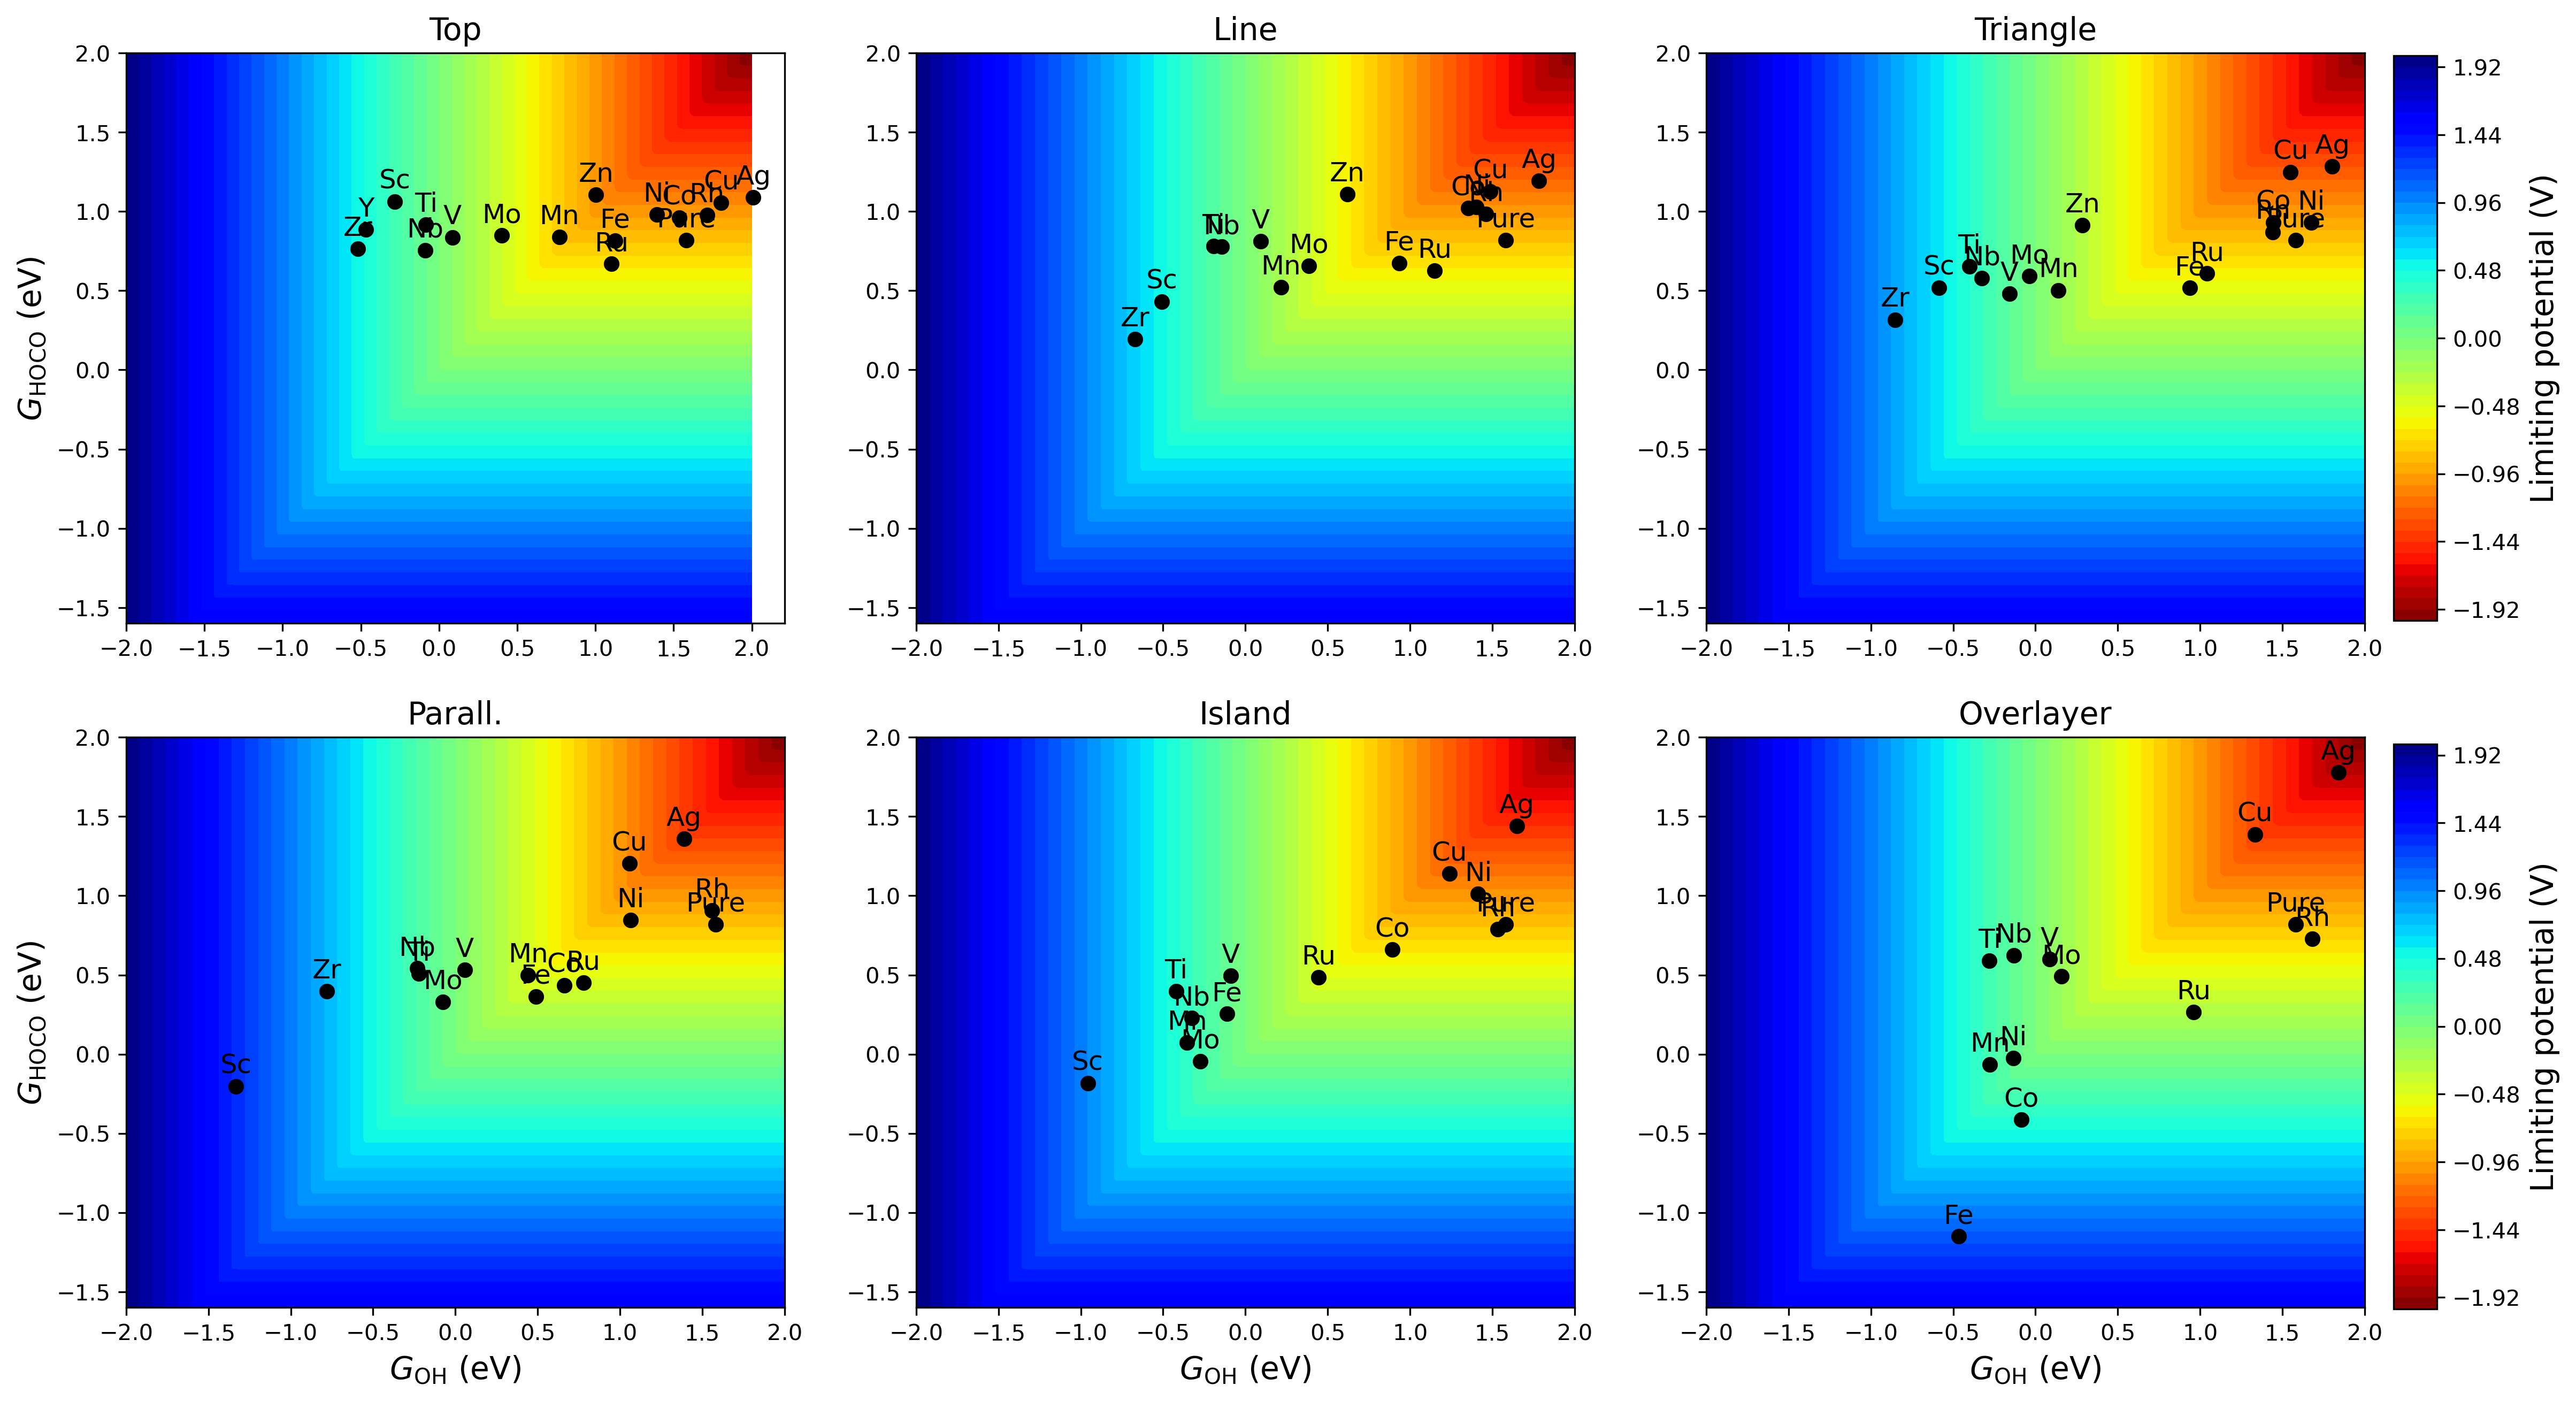

In [14]:
import sys
sys.path.append("../../..")

from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.CO2RR import CO2RRFEDplot
from plotpackage.lib.scalingrelation import ScalingRelationPlot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp
from CO2toCO_acid import CO2toCO
from matplotlib import rc
# rc('font', **{'family':'sans-serif','sans-serif':['Helvetica'], 'size':8})

limiting_potenital = 0
def limiting(GHOCO, GOH, T):

    limiting_potenital = max(GHOCO/(-1), GOH/(-1)) 

    return limiting_potenital

T = 297.15
N = 100
M = N +100
GOHs = np.linspace(-2, 2, N)
GHOCOs = np.linspace(-1.6, 2, M)

limit = np.empty((M,N))
for j, GOH in enumerate(GOHs):   # column
    for i, GHOCO in enumerate(GHOCOs):  # row
        limit[i][j] = limiting(GHOCO, GOH, T)

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 24 #1st column in excel
max_col = 29 #5th column in excel

index = 0
fig = plt.figure(figsize=(18, 16), dpi = 300)
text = ['Top', 'Line', 'Triangle', 'Parall.', 'Island', 'Overlayer']
# col1 = [2, 2, 2, 3, 3, 5] #column in excel
# col2 = [3, 5, 4, 5, 4, 4] #column in excel
col1=2 # column in excel
col2=5 # column in excel
col1 = col1 - 2
col2 = col2 - 2
for types in ['single_b', 'dimer_b', 'triangle_b', 'paral_b', 'island_b', 'overly_b']:
    #change it only for excel
    sheet = types #Sheet1 by defaut
    min_row = 1+1 #1st column in excel
    max_row = 18+1 #9st column in excel
    
    ############ plot free energy diagram ###############
    stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
    #stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data
    
    # # del rows; delete according to element names in excel
    del_ele = []   
    if types == 'single_b':
            del_ele = [] #remove distortion for near
    elif types == 'dimer_b':
        del_ele = ['Y', ] #remove distortion for line
    elif types == 'triangle_b':
        del_ele = ['Y',] #remove distortion for triangle
    elif types == 'paral_b':
        del_ele = ['Zn', 'Y',] #remove distortion for paral
    elif types == 'island_b':
        del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for island
    elif types == 'overly_b':
        del_ele = ['Sc', 'Zn', 'Y', 'Zr'] #remove distortion for line
        
    del_rows = [observationName.index(each)+2 for each in del_ele]
    ### del_rows = [10, 12, 13, 18]  #delete according to rows in excel
    del_list = [x - 2 for x in del_rows]
    observationName = np.delete(observationName, del_list, 0)
    X = np.delete(X, del_list, 0)
#     print(X)
    print(observationName)
    
    ax = plt.subplot(3, 3, index + 1)
    GHOCO_d = (X[:, col1]).astype(float) 
    GOH_d = (X[:, col2]).astype(float) 
#     print(GHOCO_d)
#     print(GOH_d)
    # plot contour images
    contours = np.linspace(np.min(limit), np.max(limit), 51) 
    # print(np.min(limit), np.max(limit))
    cp = ax.contourf(GOHs, GHOCOs, limit, np.round(contours, 2), cmap=plt.cm.jet_r) # X=columns, Y=rows, Z in z direction
    
    # plot scaling relation
    for i,metal in enumerate(observationName):
        plt.plot(GOH_d[i], GHOCO_d[i], 'o', color='black') 
        plt.text(GOH_d[i], GHOCO_d[i]+0.05, metal, fontsize=12, horizontalalignment='center', verticalalignment='bottom')
    m, b = np.polyfit(GHOCO_d, GOH_d, 1)
    

    plt.title(text[index], fontsize=14)
    if index==3 or index==4 or index==5:
        plt.xlabel(r'$G_{\mathrm{OH}}$ (eV)', fontsize=14)
    if index==0 or index==3:
        plt.ylabel(r'$G_{\mathrm{HOCO}}$ (eV)', fontsize=14)
    if index==2:
        cbaxes = fig.add_axes([0.91, 0.659, 0.015, 0.22]) #Add position (left, bottom, width, height)
        bar = fig.colorbar(cp, cax=cbaxes)
        bar.set_label(r'Limiting potential (V)', fontsize=14)
    if index==5:
        cbaxes = fig.add_axes([0.91, 0.391, 0.015, 0.22]) #Add position (left, bottom, width, height)
        bar = fig.colorbar(cp, cax=cbaxes)
        bar.set_label(r'Limiting potential (V)', fontsize=14)
    
    index = index +1
    
# plt.savefig('../data/limiting potential.png', dpi=300)    
plt.show()

In [ ]:
# !pip install -q latextable

In [2]:
%matplotlib inline
import sys
sys.path.append("../../..")

from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.CO2RR import CO2RRFEDplot
from plotpackage.lib.scalingrelation import ScalingRelationPlot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 24 #1st column in excel
max_col = 29 #5th column in excel

text = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']

i = 0
for types in ['single_b', 'dimer_b', 'triangle_b', 'paral_b', 'island_b', 'overly_b']:
    #change it only for excel
    sheet = types #Sheet1 by defaut
    min_row = 2 #1st column in excel
    max_row = 19 #9st column in excel

    ############ plot free energy diagram ###############
    stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
    stepsNames = ["$\Delta G_{HOCO*}$", '$\Delta G_{CO*}$', '$\Delta G_{H*}$', '$\Dleta G_{OH*}$', '$\Dleta G_{HOCO*}-\Dleta G_{H*}$']
    #stepsNames = ['G(HOCO*)', 'G(CO*)', 'G(H*)', 'G(OH*)', 'G(HOCO*)-G(H*)']
    
#     print(X)
    from tabulate import tabulate
    from texttable import Texttable
    import latextable

#     rows = [['Rocket', 'Organisation', 'LEO Payload (Tonnes)', 'Maiden Flight'],
#             ['Saturn V', 'NASA', '140', '1967'],
#             ['Space Shuttle', 'NASA', '24.4', '1981'],
#             ['Falcon 9 FT-Expended', 'SpaceX', '22.8', '2017'],
#             ['Ariane 5 ECA', 'ESA', '21', '2002']]

#     table = Texttable()
#     table.set_cols_align(["c"] * 5)
#     table.set_deco(Texttable.HEADER | Texttable.VLINES)
#     table.add_rows(rows)

#     print('Tabulate Table:')
#     print(tabulate(rows, headers='firstrow'))

#     print('\nTexttable Table:')
#     print(table.draw())

#     print(np.asarray(observationName))
#     print(X)
#     assert False
#    {>{\centering\arraybackslash} m{2.1cm} >{\centering\arraybackslash} m{2.1cm} >{\centering\arraybackslash} m{2.1cm} >{\centering\arraybackslash} m{2.1cm} >{\centering\arraybackslash} m{2.1cm} >{\centering\arraybackslash} m{3.1cm} } 
    rows = np.concatenate((np.asarray(observationName).reshape(-1,1), np.round(X, 3)), axis=1)
    print('\n Table for {}:\\\ '.format(text[i]))
    print("\\begin{center}")
    print(tabulate(rows, headers=stepsNames, tablefmt='latex_raw', colalign=("center")))
    print("\\end{center}")
    
#     print('\nTexttable Latex:')
#     print(latextable.draw_latex(table, caption="A comparison of rocket features."))
    
#     # # del rows; delete according to element names in excel
#     del_ele = []
#     if types == 'top-new':
#         del_ele = [] #remove distortion for near
#     elif types == 'line':
#         del_ele = ['Y', ] #remove distortion for line
#     elif types == 'triangle':
#         del_ele = ['Y',] #remove distortion for triangle
#     elif types == 'paral-new':
#         del_ele = ['Zn', 'Y',] #remove distortion for paral
#     elif types == 'island-new':
#         del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for island
#     elif types == 'overly-new':
#         del_ele = ['Sc', 'Zn', 'Y', 'Zr'] #remove distortion for line
#     # del_ele += ['Ti', 'Sc', 'Nb', 'Zr', 'Y', 'Zn', 'V', 'Mn', 'Mo', 'Pure'] #double bond and pure

#     # dotColor = {'PdH': 'black', 'Pure': 'black', 'Pd': 'black', 'Sc': 'black', 'Ti': 'black', 'V': 'black', 
#     #             'Mn': 'black', 'Fe': 'red', 'Co': 'red', 'Ni': 'red', 'Cu': 'red', 
#     #             'Zn': 'black', 'Y': 'black', 'Zr': 'black', 'Nb': 'black', 'Mo': 'black', 'Ru': 'red',
#     #             'Rh': 'red', 'Ag': 'red'}

#     def delete(observationName, X, del_ele):
#         del_rows = [observationName.index(each)+2 for each in del_ele]
#         del_list = [x - 2 for x in del_rows]
#         observationName = np.delete(observationName, del_list, 0)
#         X = np.delete(X, del_list, 0)     
#         descriper1 = (X[:, col1]).astype(float) 
#         descriper2 = (X[:, col2]).astype(float)
#         return observationName, X, descriper1, descriper2

#     observationName1, X1, descriper11, descriper12 = delete(observationName, X, del_ele)
    i = i +1

print('===============================')


 Table for Single:\\ 
\begin{center}
\begin{tabular}{llllll}
\hline
      &   $\Delta G_{HOCO*}$ &   $\Delta G_{CO*}$ &   $\Delta G_{H*}$ &   $\Dleta G_{OH*}$ &   $\Dleta G_{HOCO*}-\Dleta G_{H*}$ \\
\hline
 Pure & 0.82                 & 0.216              & 0.501             & 1.581              & 0.319                              \\
 Sc   & 1.062                & 0.026              & 0.682             & -0.283             & 0.38                               \\
 Ti   & 0.917                & -0.213             & 0.674             & -0.083             & 0.242                              \\
 V    & 0.837                & -0.443             & 0.47              & 0.087              & 0.368                              \\
 Mn   & 0.839                & -1.029             & -0.054            & 0.77               & 0.893                              \\
 Fe   & 0.817                & -0.881             & -0.036            & 1.126              & 0.852                              \\
 Co   &


 Table for Island:\\ 
\begin{center}
\begin{tabular}{llllll}
\hline
      &   $\Delta G_{HOCO*}$ &   $\Delta G_{CO*}$ &   $\Delta G_{H*}$ &   $\Dleta G_{OH*}$ &   $\Dleta G_{HOCO*}-\Dleta G_{H*}$ \\
\hline
 Pure & 0.82                 & 0.216              & 0.501             & 1.581              & 0.319                              \\
 Sc   & -0.183               & 0.04               & 0.557             & -0.958             & -0.739                             \\
 Ti   & 0.397                & -0.242             & 0.222             & -0.421             & 0.175                              \\
 V    & 0.495                & -0.553             & 0.219             & -0.09              & 0.276                              \\
 Mn   & 0.073                & -1.562             & -0.595            & -0.354             & 0.667                              \\
 Fe   & 0.254                & -1.14              & -0.254            & -0.113             & 0.508                              \\
 Co   &

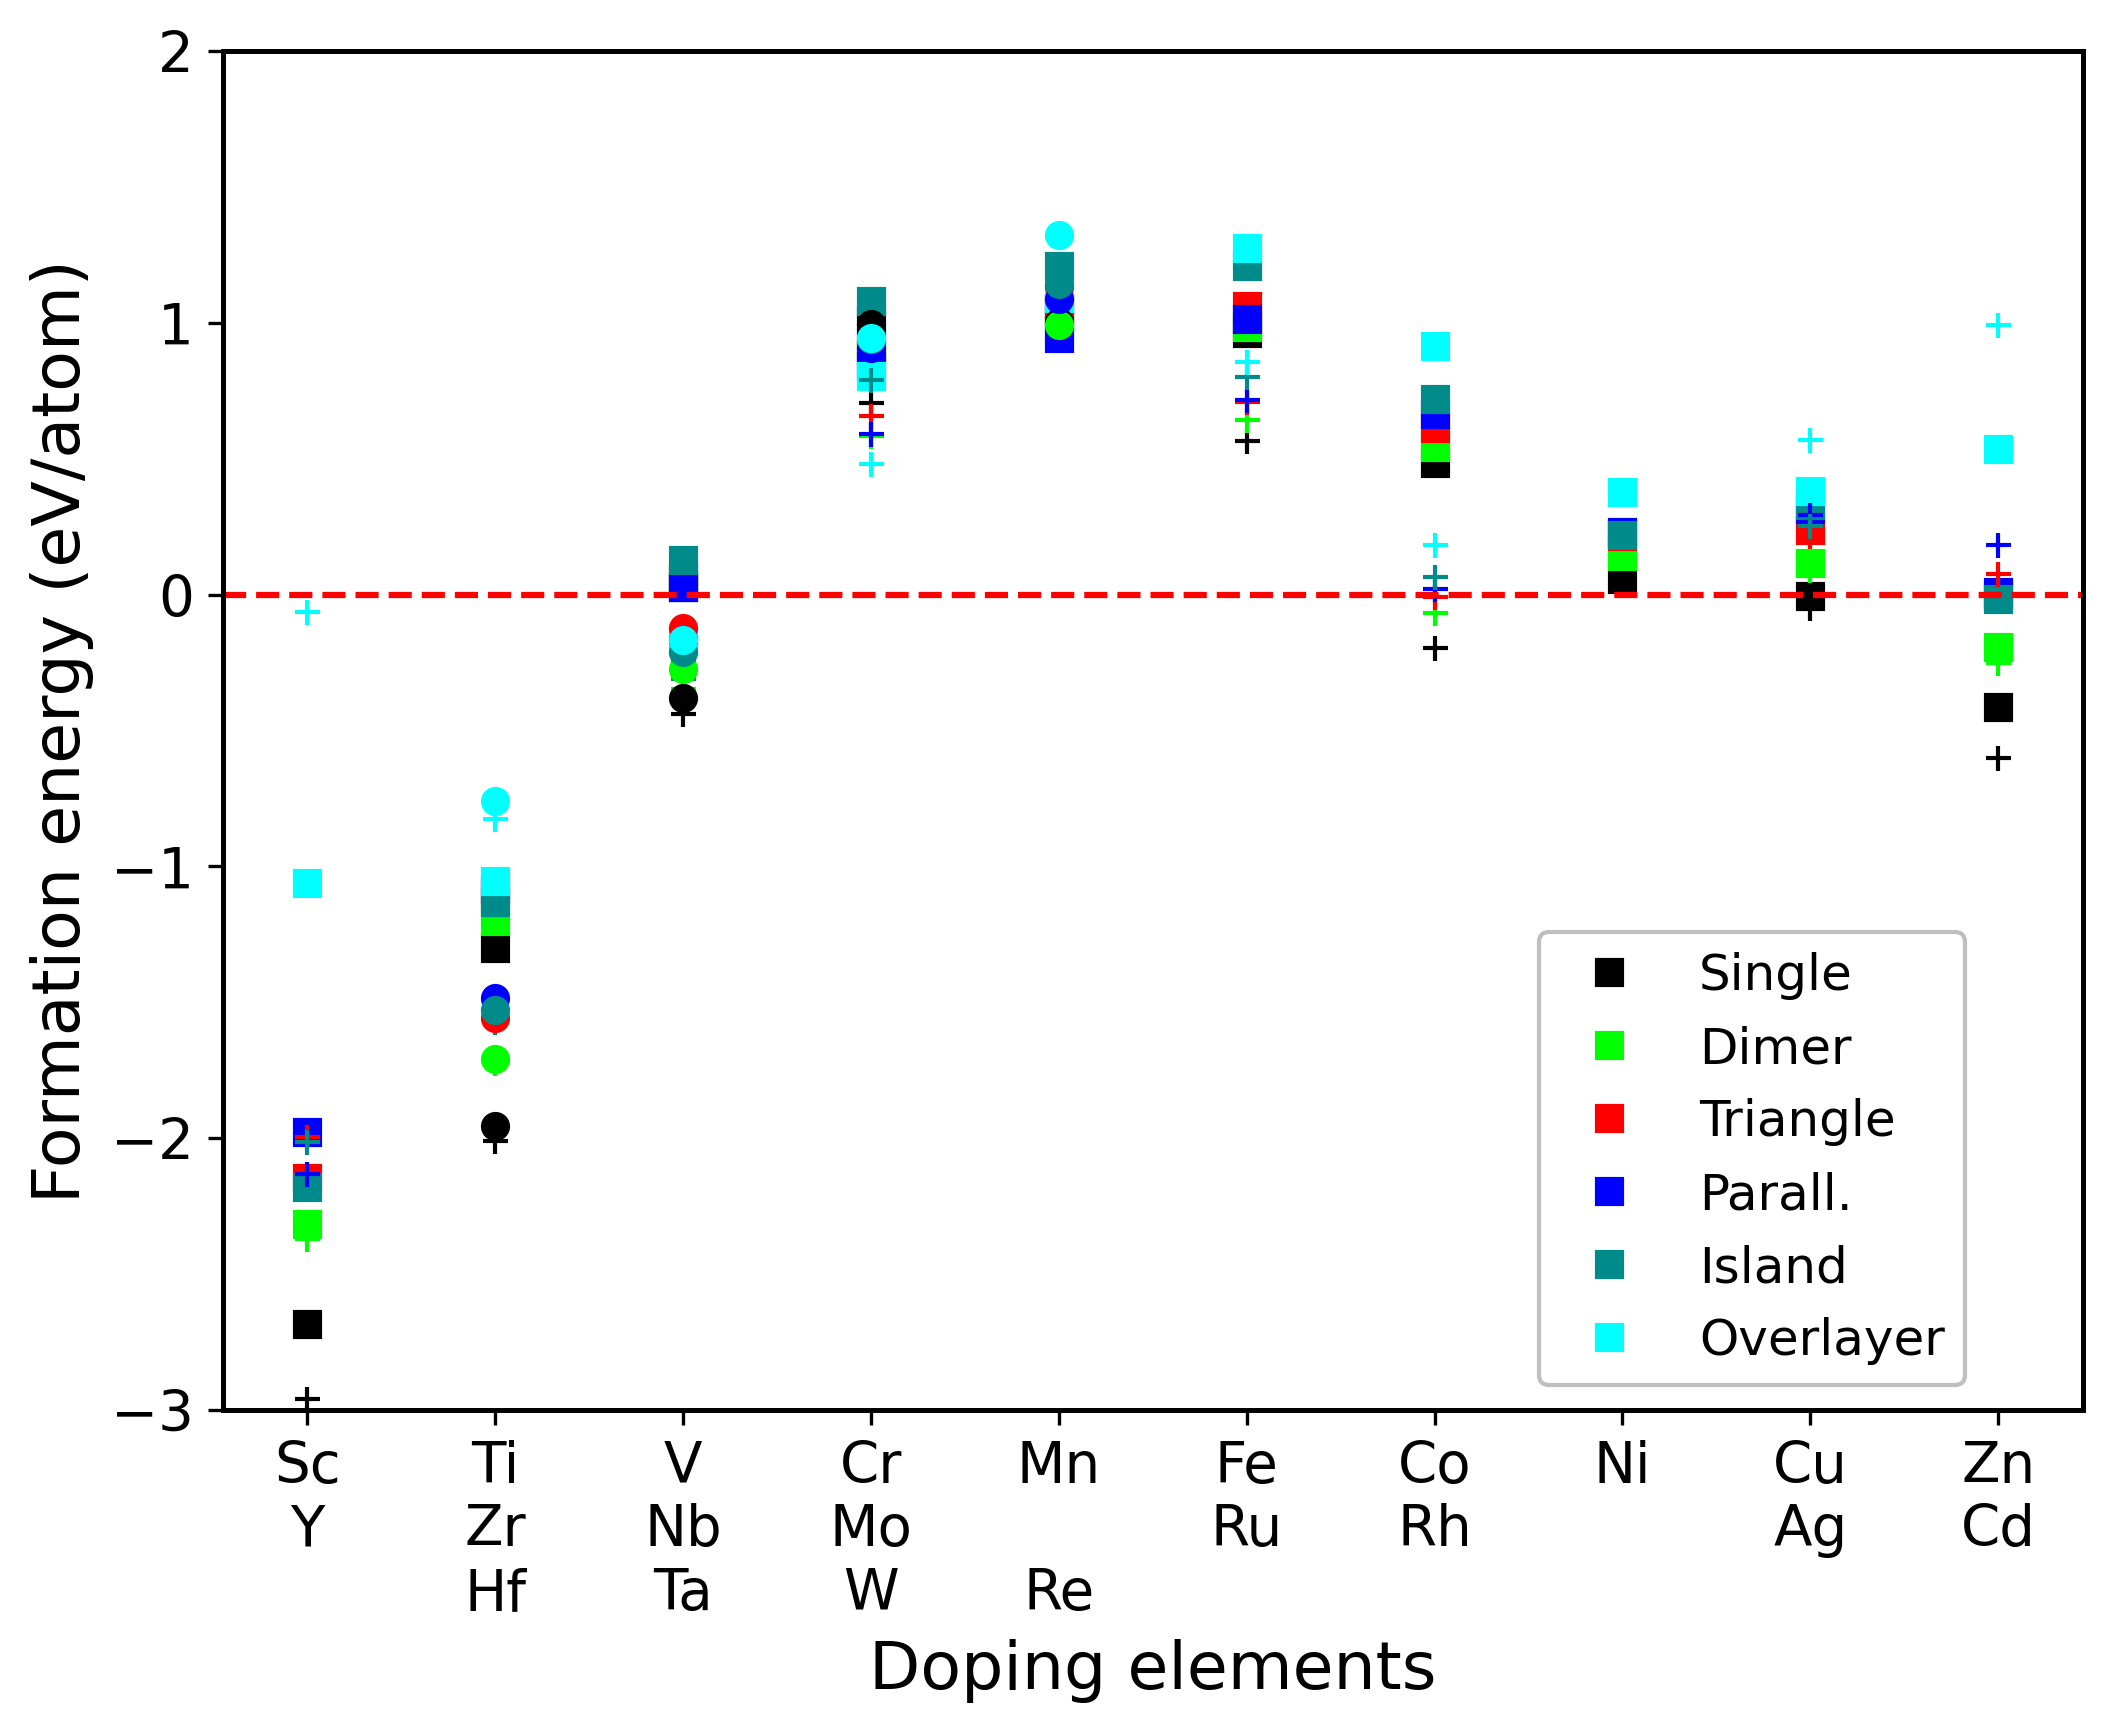

In [62]:
%matplotlib inline
from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1+14 #1st column in excel
max_col = 7+14 #5th column in excel

#change it only for excel
sheet = 'stability' #Sheet1 by defaut
min_row = 2 #1st column in excel
max_row = 24 #9st column in excel

#saved figure name
figName1 = './paper1/Formation_energy.jpg'  #free energy diagram name

############ plot free energy diagram ###############
colorList = ['k', 'lime', 'r', 'b', 'darkcyan', 'cyan', 'olive', 'magenta', 'pink', 'gray', 'orange', 'purple', 'g']
typeNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data

fig = plt.figure(figsize=(8, 6), dpi = 300)
# x = np.arange(0,len(observationName),1)

# marker = ['o', '^', '<', '>', 'v', 's', 'd', '.', ',', 'x', '+']
for i in range(len(typeNames)):    
    plt.plot(np.array([0,1,2,3,4,5,6,7,8,9]), X[:10,i], 's', color=colorList[i])  #plot dots
    # plt.plot(x, X[:,i], marker[i], color=colorList[i])  #plot dots
for i in range(len(typeNames)):    
    plt.plot(np.array([0,1,2,3, 5,6, 8,9]), X[10:18,i], '+', color=colorList[i])  #plot dots   

for i in range(len(typeNames)):    
    plt.plot(np.array([ 1,2,3,4]), X[18:22,i], 'o', color=colorList[i])  #plot dots
    
typeNames = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']    
plt.legend(typeNames, framealpha=0.5, fontsize=12, bbox_to_anchor=(0.15, 0, 0.8, 1.02), edgecolor='grey')
plt.axhline(y=0, color='r', linestyle='--')

# plt.xlim([-0.3, 21.3])
plt.ylim([-3., 2])
plt.xlabel('Doping elements', fontsize=16)
plt.ylabel('Formation energy (eV/atom)', fontsize=16)
ax = fig.gca()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(['Sc\nY', 'Ti\nZr\nHf', 'V\nNb\nTa', 'Cr\nMo\nW', 'Mn\n \nRe', 'Fe\nRu', 'Co\nRh', 'Ni', 'Cu\nAg', 'Zn\nCd'])
# ax.set_xticklabels(observationName)
# [ , 'Y', 'Zr', 'Nb', 'Mo', 'Ru', 'Rh', 'Ag', 'Cd', 'Hf', 'Ta', 'W', 'Re']
ax.tick_params(labelsize=13.5) #tick label font size
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2) #linewith of frame

plt.show()
# fig.savefig(figName1, dpi=300, bbox_inches='tight')